# About this Kernel
This kernel may (or may not) be helpful in your long and often tedious machine learning journey. Sometimes you may find this notebook verbose and overwhelming particularly if you're a beginner. This verbosity tries to explain everything I could possibly know. Once you get through the notebook, you could expect to have a good grasp of the fundamentals. I've also tried to write reusable codes as much as possible using custom functions so that we can avoid writing the same code again and again. Let's get started.

# Outlines

* [1.Problem Description and Objective](#1)
* [2.Importing Packages and Collecting Data](#2)
* [3.Variable Description and Identification](#3)
   * [3.1 Variable Description](#3.1) [3.2 Categorical and Numerical Variables](#3.2) [3.3 Variable Data Types](#3.3)
* [4.Univariate Analysis](#4)
   * [4.1 Categorical Variables](#4.1)
      * [4.1.1 Survived](#4.1.1) [4.1.2 Sex](#4.1.2) [4.1.3 Pclass](#4.1.3) [4.1.4 Embarked](#4.1.4) [4.1.5 Cabin](#4.1.5) [4.1.6 Name](#4.1.6) [4.1.7 Ticket](#4.1.7) [4.1.8 SibSp](#4.1.8) [4.1.9 Parch](#4.1.9)
   * [4.2 Numerical Variables](#4.2)    
      * [4.2.1 Fare](#4.2.1)  [4.2.2 Age](#4.2.2)  [4.2.3 PassengerId](#4.2.3)
* [5.Feature Engineering](#5)
   * [5.1 Process Cabin](#5.1) [5.2 Process Name](#5.2) [5.3 Process SibSp & Parch](#5.3)  [5.4 Process Ticket](#5.4)
* [6.Outliers Detection](#6)
   * [6.1 Outliers Detection of Age](#6.1)  [6.1 Outliers Detection of Fare](#6.2)
* [7.Imputing Missing Variables](#7)
   * [7.1 Impute Embarked & Fare](#7.1)  [7.2 Impute Age](#7.2)
* [8.Bivariate Analysis](#8)
   * [8.1 Numerical & Categorical Variables](#8.1)
      * [8.1.1 Fare & Survived](#8.1.1)   [8.1.2 Age & Survived](#8.1.2)
   * [8.2 Categorical & Categorical Variables](#8.2)
      * [8.2.1 Sex & Survived](#8.2.1) [8.2.2 Pclass & Survived](#8.2.2) [8.2.3 Embarked & Survived](#8.2.3) [8.2.4 SIbSp & Survived](#8.2.4) [8.2.5 Parch & Survived](#8.2.5) [8.2.6 nameProcessed & Survived](#8.2.6) [8.2.7 familySize & Survived](#8.2.7) [8.2.8 cabinProcessed & Survived](#8.2.8) [ 8.2.9 ticketProcessed & Survived](#8.2.9)
* [9.Multivariate Analysis](#9)  
   * [9.1 (Pclass, Sex, cabinProcessed) vs Survived](#9.1) [9.2 (Pclass, Sex, Embarked) vs Survived](#9.2) [9.3 (Pclass, Sex, SibSp) vs Survived](#9.3) [9.4 (Pclass, Sex, Parch) vs Survived](#9.4) [9.5 (Pclass, Sex, nameProcessed) vs Survived](#9.5) [9.6 (Pclass, Sex, familySize) vs Survived](#9.6) [9.7 (Pclass, Sex, ticketProcessed) vs Survived](#9.7) [9.8 (Pclass, nameProcessed, cabinProcessed) vs Survived](#9.8) [9.9 (familySize, Sex, cabinProcessed) vs Survived](#9.9) [9.10 (Sex, nameProcessed, familySize) vs Survived](#9.10) [9.11 (Sex, nameProcessed, cabinProcessed) vs Survived](#9.11) [9.12 (Sex, nameProcessed, Embarked) vs Survived](#9.12) [9.13 (Sex, nameProcessed, ticketProcessed) vs Survived ](#9.13)
* [10.Data Transformation](#10) 
   * [10.1 Binning Continuous Variables](#10.1)
      * [10.1.1 Binning Age](#10.1.1) [10.1.2 Binning Fare](#10.1.2)
   * [10.2 Dropping Features](#10.2) [10.3 Correcting Data Types](#10.3) [10.4 Encoding Categorical Variables](#10.4)
* [11.Model Building and Evaluation](#11)   
   * [11.1 Training Model](#11.1) [11.2 Model Evaluation](#11.2) [11.2.1 Cross Validation](#11.2.1) [11.2.2 Tunning Hyperparameters](#11.2.2) [11.2.3 Model Selection](#11.2.3) [11.3 Retrain & Predict Using Optimized Hyperparameters](#11.3) [11.4 Feature Importance](#11.4) [11.5 Learning Curves](#11.5)
* [12.More Evaluation Metrics](#12)  
   * [12.1 Confusion Matrix](#12.1) [12.2 Precision Score](#12.2) [12.3 Recall (or Sensitivity or True Positive Rate)](#12.3) [12.4 Specificity ( or True Negative Rate)](#12.4) [12.5 F1 Score](#12.5) [12.6 Classification Report](#12.6) [12.7 Precision-Recall vs Threshold Curve](#12.7) [12.8 Precision-Recall Curve](#12.8) [12.9 ROC  Curve & AUC Score ](#12.9)
* [13.Prediction & Submission](#13) 
* [14.Introduction to Ensemble](#14)
   * [14.1 Hard Voting Ensemble](#14.1) [14.2 Introduction to PCA](#14.2) [14.3 Soft Voting Ensemble](#14.3) [14.4 Bagging](#14.4) [14.5 Boosting](#14.5) [14.6 Blending](#14.6) [14.7 Stacking](#14.7) [14.8 Evaluating Different Ensembles](#14.8)
* [15.End Note](#15)

# 1.Problem Description and Objective <a id="1"></a>
The sinking of the RMS Titanic is one of the most notorious shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crews. This harrowing tragedy shocked the international community and led to better safety regulations for ships.

In this problem, we're asked to complete the analysis of what sorts of passengers were likely to survive the tragedy using machine learning. So its our job to predict if a passenger survived from the sinking Titanic or not with the help of machine learning. So its a binary classification problem.

# 2.Importing Packages and Collecting Data <a id="2"></a>
After importing required modules, let's read train and test data from csv files.

In [1]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

[MLENS] backend: threading
/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [2]:
"""Customize visualization."""
plt.style.use("bmh")                    # Use bmh's style for plotting
sns.set_style({"axes.grid":False})      # Remove gridlines

"""Display markdown formatted output like bold, italic bold etc."""
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

In [3]:
"""Read and preview the train data from csv file."""
train = pd.read_csv("../input/train.csv")
bold("Preview of Train Data:")
display(train.head(2))

"""Read and preview the test from csv file."""
test = pd.read_csv("../input/test.csv")
bold("Preview of Test Data:")
display(test.head(2))

**Preview of Train Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Preview of Test Data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


**Note:** We don't have Survived variable for test set. This will be our task to infer Survived for test set by learning from the train set.

# 3.Variable Description and Identification <a id="3"></a>
Let's describe what each of the variable indicates and identify our response and predictor variables. Also seperate the categorical variables from numerical variables and finally identify pandas data types (i.e., object, float64 or int64) for every variable.

## 3.1 Variable Description <a id="3.1"></a>

In [4]:
"""Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis."""
merged = pd.concat([train, test], sort = False).reset_index(drop=True)
bold("Preview of Merged Data:")
display(merged.head(5))

**Preview of Merged Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
"""Shape of the combined data."""
bold("Shape of the Merged Data:")
display(merged.shape)

"""Variables in the combined data."""
bold("Name of the Variables in merged data:")
display(merged.columns)

**Shape of the Merged Data:**

(1309, 12)

**Name of the Variables in merged data:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### So what can we see??
**We can see total 12 variables. And each variable has 1309 observations (excluding Survived).**
### Here comes the description of all variables:
1. **PassengerId** is a unique identifying number assigned to each passenger.
2. **Survived** is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass** is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name** is the name of the passenger.
5. **Sex** indicates the gender of the passenger (i.e., Male or female).
6. **Age** indicates the age of the passenger.
7. **Sibsp**  is the number of siblings/spouses aboard.
8. **Parch** is the number of parents/children aboard.
9. **Ticket** indicates the ticket number issued to the passenger.
10. **Fare** indicates the amount of money spent on their ticket.
11. **Cabin** indicates the cabin category occupied by the passenger.
12. **Embarked** indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).


### Here, Survived is the target variable and rest of the variables are predictor variables.

## 3.2 Categorical and Numerical Variables  <a id="3.2"></a>
**Categorical Variable:** Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp, and Parch.

**Numerical Variable:** Fare, Age, and PassengerId.
## 3.3 Variable Data Types <a id="3.3"></a>

In [6]:
"""Pandas data types for our different variables."""
bold("Data Types of Our Variables:")
display(merged.dtypes)

**Data Types of Our Variables:**

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1. **int data type variables:** Pclass, SibSp, Parch, and PassengerId.
2. **float data type variables:** Fare and Age, *Survived (due to concatenation)*
3. **object (numbers + strings) data type variables:** Name, Sex, Ticket, Cabin, and Embarked.

# 4.Univariate Analysis <a id="4"></a>
Univariate analysis separately explores the distribution of each variable in a data set. It looks at the range of values, as well as the central tendency of the values. Univariate data analysis does not look at relationships between various variables (like bivariate and multivariate analysis) rather it summarises each variable on its own. Methods to perform univariate analysis will depend on whether the variable is categorical or numerical. For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using histogram and density plots. For categorical variables, we would use bar plots to visualize the absolute and proportional frequency distribution. Knowing the distribution of the feature values becomes important when you use machine learning methods that assume a particular type of it, most often Gaussian. **Let's starts off with categorical variables:**

## 4.1 Categorical Variables  <a id="4.1"></a>
To analyse categorical variables, let's create a custom function to display bar chart in absolute and relative scale of a variable in a subplot.

In [7]:
"""Create a function to plot a variable's absolute and relative frequency."""
def plotFrequency(variable):
    """Plots absolute and relative frequency of a avriable."""
    
    # Calculates absolute frequency
    absFreq = variable.value_counts()
    
    # Calculates relative frequency
    relFreq = variable.value_counts(normalize=True).round(4)*100
    
    # Creates a dataframe off absolute and relative frequency
    df = pd.DataFrame({
        "absoluteFrequency":absFreq,
        "relativeFrequency":relFreq
    })
    
    # Create two subplots of bar chart
    fig=make_subplots(
        rows=1, 
        cols=2,
        vertical_spacing=0.3,
        subplot_titles=("Absolute Frequency", "Relative Frequency"),
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for absolute frequency
    fig.add_trace(
        go.Bar(
        y=df.index, 
        x=df.absoluteFrequency,
        orientation="h",
        text=df.absoluteFrequency,
        hoverinfo="x+y",
        textposition="auto", 
        name="Abs Freq",
        textfont=dict(family="sans serif",size=14),
        marker = dict(color=df.absoluteFrequency, colorscale="Rainbow")),
        row=1,
        col=1
        )

    # Add another trace for relative frequency
    fig.add_trace(
        go.Bar(y=df.index,
        x=df.relativeFrequency.round(2),
        orientation="h",
        text=df.relativeFrequency.round(2),
        hoverinfo="x+y",
        textposition="auto", 
        name="Rel Freq(%)",
        textfont=dict(family="sans serif",size=15),
        marker=dict(color=df.relativeFrequency.round(2), colorscale="Rainbow")),
        row=1,
        col=2
        )

    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=970,
        hovermode="closest",
        title_text=f"Absolute and Relative Frequency of {variable.name}",showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis title in bold
    fig.layout.yaxis1.update(title=f"<b>{variable.name}</b>")
    
    # Set x-axes titles in bold
    fig.layout.xaxis1.update(title="<b>Abs Freq</b>")
    fig.layout.xaxis2.update(title="<b>Rel Freq(%)</b>")
    # or, fig["layout"]["xaxis2"].update(title="<b>Rel Freq(%)</b>")
    return fig.show()

###  4.1.1 Survived <a id="4.1.1"></a>

In [8]:
"""Plot number of survivors and victims in absolute and relative scale in the tragedy."""
plotFrequency(merged.Survived)

**Findings:** Variable Survived is imbalanced since the proportion of survivors and victims is not equally represented in its distribution. Out of 891 passengers, only 342 passengers survived and a whopping 549 passengers died. Or put another way, 61.62% passengers died while just 38.38% of passengers were lucky enough to survive.

### 4.1.2 Sex <a id="4.1.2"></a>

In [9]:
"""Plot the absolute and relative frequency of Sex."""
plotFrequency(merged.Sex)

**Findings:** Variable Sex is imbalanced as proportion of male vs female in its distribution are not equally represented. Rather Male(843) has outnumbered female (466) in variable Sex. Or, proportionally, over 64% of Sex variable consists of label male while female contibutes to only over 35.5% of Sex.

### 4.1.3 Pclass  <a id="4.1.3"></a>

In [10]:
"""Absolute and relative frequency of Pclass."""
plotFrequency(merged.Pclass)

**Findings:** Again class distribution of Pclass is imbalanced as three categories of Pclass are not evenly represented in its distribution. 3 (Pclass3) is the most occured (709) levels of Pclass while 2 is the least occured (277). Another way of saying that, over  54% of Pclass variable consists of 3(Pclass3) while 1 and 2 both combinedly contribute to nearly 46% of Pclass.

### 4.1.4 Embarked  <a id="4.1.4"></a>

In [11]:
"""Plot absolute and relative frequency of Embarked."""
plotFrequency(merged.Embarked)

**Findings:** Embarked is also imbalanced since its levels are not equally represented in its distribution. A whopping 914 passengers embarked from Southamton while just 123 embarked from Queenstown. In other words, almost 70% of Embarked consists of S while both C and Q contribute to 30 to Embarked.

### 4.1.5 Cabin <a id="4.1.5"></a>

In [12]:
"""Absolute frequency of Cabin."""
absFreqCabin = merged.Cabin.value_counts(dropna = False)
bold("Categories of Cabin:")
display(absFreqCabin.head())

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
Name: Cabin, dtype: int64

In [13]:

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold("Total Categories in Cabin:")
display(absFreqCabin.count())

**Total Categories in Cabin:**

187

In [14]:
"""Finally preview the variable Cabin to see what is causing the irregularity."""
bold("Preview of Cabin:")
display(merged.Cabin.head(7))

**Preview of Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

**Findings:** Looks like Cabin is an alphanumeric type variable with 1014 missing obsevations. There are 187 kinds of categories in variable Cabin. Since there are too many categories in Cabin, we must process (i.e., reduce the number of categories) Cabin to check if there is any association between Survived and Cabin.

### 4.1.6 Name <a id="4.1.6"></a>

In [15]:
"""Count total categories in Name."""
bold("Total Categories in Name:")
display(merged.Name.value_counts().count())

**Total Categories in Name:**

1307

In [16]:
"""Let's finally check the what's inside the variable Name."""
bold("Preview of Name:")
display(merged.Name.head())

**Preview of Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Findings:** As expected Name contains strings that has 1307 variations. So, like Cabin, we must process Name to get any clue about survival from it.

### 4.1.7 Ticket  <a id="4.1.7"></a>

In [17]:
"""Count total groups in variable Ticket."""
bold("Total Groups in Ticket:")
display(merged.Ticket.value_counts().count())

**Total Groups in Ticket:**

929

In [18]:
"""Lets investigate Ticket."""
bold("Preview of Ticket:")
display(merged.Ticket.head())

**Preview of Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Findings:** It seems Ticket also has too many unique categories (929). Being an alphanumeric type variable, we must process Ticket to get any useful insights about survival.

### 4.1.8 SibSp  <a id="4.1.8"></a>

In [19]:
"""Plot the absolute and relative frequency of SibSp to investigate its distribution."""
plotFrequency(merged.SibSp)

**Findings:** Once again, SibSp is not balanced as levels of SibSp(7) are not equally represented in its distribution. 891 passengers were without siblings or spouses. Put another way, over 68% passengers had no siblings or spouses aboard, followed by over 24% passengers had 1 siblings or spouse.

### 4.1.9 Parch  <a id="4.1.9"></a>

In [20]:
"""Absolute and relative frequency of Parch."""
plotFrequency(merged.Parch)

**Findings:** Parch isn't balanced as levels of Parch(8) are not equally represented in its distribution. Over one thousand passengers were without parents or children, followed by 170 passengers had one parents or children. In other words, over 76.5% passengers were without parents or children while rest of the 23.5% had few parents or children.

## 4.2 Numerical Variables <a id="4.2"></a>
We would like to analyse numerical variables using histogram, density plot, and summary statistics. To analyse numerical variables, we will create 2 custom functions. The 1st one will plot histogram and density plot for each numerical variable. And the 2nd one will calculate summary statistics including skewness.

In [21]:
"""#1.Create a function to plot histogram and density plot."""
def plotHistogram(variable):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {variable.name} with Histogram", f"Distribution of {variable.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            marker = dict(color = "chocolate")
        ),
    row=1,col=1)
    
    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            histnorm = "density",
            marker = dict(color = "darkred")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        hovermode="closest",
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()
    

    
'''#2.Calculate descriptive statistics.'''
def calculateSummaryStats(variable):
    stats = variable.describe()
    skewness = pd.Series(variable.skew(), index = ["skewness"])
    statsDf = pd.DataFrame(pd.concat([skewness, stats], sort = False), columns = [variable.name])
    statsDf = statsDf.reset_index().rename(columns={"index":"summaryStats"})
    return display(statsDf.round(2))

### 4.2.1 Fare <a id="4.2.1"></a>

In [22]:
'''Plot histogram and density plot of Fare.'''
plotHistogram(merged.Fare)

**Reading the histogram, it's clear that Fare's distribution has a high positive skewness. And it seems a number of passengers (653) paid for fare between 5 to 15 (less than 15), followed by 25 to 35 (less than 35).**

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. One advantage of density plot over histogram is that its shape of distribution isn't affected by the number of bins used.

In [23]:
"""Calculate summary statistics of Fare."""
bold("Summary Stats of Fare:")
calculateSummaryStats(merged.Fare)

**Summary Stats of Fare:**

,summaryStats,Fare
0,skewness,4.37
1,count,1308.00
2,mean,33.30
3,std,51.76
4,min,0.00
5,25%,7.90
6,50%,14.45
7,75%,31.28
8,max,512.33


**So what does the  value of skewness suggest?**
1. If skewness is less than −1 or greater than +1, the distribution can be considered as highly skewed.
2. If skewness is between −1 and −½ or between +½ and +1, the distribution can be considered as moderately skewed.
3. And finally if skewness is between −½ and +½, the distribution can be considered as approximately symmetric.    

**Findings:** Density plot shows the mass of the distribution of Fare is heavily concentrated on the left of the figure due to very long tail on the right side. So it can be said that Fare is substantially skewed(positively) that is also supported by the calculated positive value of skewness of 4.37

### 4.2.2 Age <a id="4.2.2"></a>

In [24]:
"""Plot histogram and density plot of Age."""
plotHistogram(merged.Age)

In [25]:
"""Calculate summary stats for Age"""
calculateSummaryStats(merged.Age)

,summaryStats,Age
0,skewness,0.41
1,count,1046.00
2,mean,29.88
3,std,14.41
4,min,0.17
5,25%,21.00
6,50%,28.00
7,75%,39.00
8,max,80.00


**At first glance, Age seems to be positively skewed (slightly). 344 passengers' age is between 20 to 30(less than 30). And passengers between age 70 to 80(including 80) was 8 were the least.**

**Findings:** What we can see from the density plot is that the mass of the distribution of Age is slightly concentrated on the left of the figure due to comparatively long tail on the right side. So it can be said that Age is almost normally distributed since the tail on the both sides are almost equal and it has a small value of positive skewness of 0.41 (in between -0.5 to 0.5). So it can be said that Age is almost normally distributed.

### 4.2.3 PassengerId <a id="4.2.3"></a>

In [26]:
"""What does passengerId contain?"""
display(merged.PassengerId.head())

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

**Findings:** PassengersId is an unique identity number (positive integer) assigned to each passenger.

# 5.Feature Engineering <a id="5"></a>
In this section, we would either modify or create new features from the exsisting features which are otherwise hard to analyse in their raw forms that we saw in Univariate Analysis section. We would engineer features like Cabin, Name, SibSp & Parch, and Ticket that could tell us something about survival or death once they're processed.

## 5.1 Process Cabin <a id="5.1"></a>

In [27]:
"""Let's preview the Cabin again."""
bold("Preview of Cabin:")
display(merged.Cabin.head())

**Preview of Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [28]:
"""It seems Cabin contains some missing values. Let's count them."""
bold("Missing Values in Cabin:")
display(merged.Cabin.isna().sum())

**Missing Values in Cabin:**

1014

In [29]:
"""Total categories in Cabin before processing."""
bold("Total Categories in Cabin before Processing:")
display(merged.Cabin.value_counts(dropna=False).count())

**Total Categories in Cabin before Processing:**

187

Looks like Cabin is alphanumeric type variable with no special characters (like ., /, % etc) between letters and numbers. It has also 1014 missing obsevations. It is reasonable to presume that those NaNs didn't have a cabin, which could tell us something about 'Survived'. We will flag NaN as 'X' and keep only the 1st character where Cabin has alphanumeric values. Since its a categorical variable, we must reduce the number of categories for further analysis. **To avoid mutability, we won't change any variable's state in place, rather we'll create a brand new variable.**

In [30]:
"""Flag all the NaNs of Cabin as 'X'."""
nanReplaced= merged.Cabin.fillna("X")

In [31]:
"""Extract only the 1st character from Cabin, which is only a Letter. And insert it to the dataframe."""
merged["cabinProcessed"] = nanReplaced.str.get(0) 
bold("Cabin Categories after Processing:")
display(merged.cabinProcessed.value_counts())

**Cabin Categories after Processing:**

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabinProcessed, dtype: int64

In [32]:
"""After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable."""
plotFrequency(merged.cabinProcessed)

**Findings:** It seems nearly 77.5% of passengers had X cabin category (formerly NaNs), followed by over 7% had cabin category C and nearly 5% had cabin category B.

## 5.2 Process Name <a id="5.2"></a>

In [33]:
"""Lets see what's inside the Name."""
display(merged.Name.head(8))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

What we can easily understand from this column, it contains strings that further contains titles such as Mr, Mrs, Master etc. These titles give us some useful information about sex(Mr = male, Mrs = married female), age(Miss is usually younger than Mrs), and profession(Master indicates profession and hence social status) etc which in the end could tell us something more about survival. Now we want to extract these titles from Name to check if there is any association between these titles and Survived.

In [34]:
"""Extract those firstName from Name."""
firstName = merged.Name.str.split(".").str.get(0).str.split(",").str.get(-1)

In [35]:
"""Count the extracted categories of firstName from Name."""
display(firstName.value_counts())

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Mlle              2
 Major             2
 Mme               1
 Dona              1
 Sir               1
 Capt              1
 Don               1
 Jonkheer          1
 the Countess      1
 Lady              1
Name: Name, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets. Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket. First name such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats and hence these first name will be put into bucket 'Aristocrat'. We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

In [36]:
"""Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it."""
firstName.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)

"""Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat."""
firstName.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)

"""Finally Replace Mlle and Ms with Miss. And Mme with Mrs."""
firstName.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

"""Replace the Aristocrat with Aristocrat"""
firstName.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

"""Insert a column named 'nameProcessed'."""
merged["nameProcessed"] = firstName

In [37]:
"""let's see how nameProcessed looks now"""
display(merged.nameProcessed.value_counts())

 Mr            757
 Miss          264
 Mrs           198
 Master         61
 Officer        23
 Aristocrat      6
Name: nameProcessed, dtype: int64

In [38]:
"""After processing, visualise and count absolute and relative frequency of transformed Name."""
plotFrequency(merged.nameProcessed)

**Findings:** Nearly 58% passengers had title Mr(male of course), followed almost 20% passengers had titles Miss(unmarried women hence usually younger than Mrs). Just over 15% passengers were married women (Mrs).

## 5.3 Process SibSp & Parch <a id="5.3"></a>
In univariate analysis, we saw some passengers had siblings/spouses and some didn't have. The same is also true for variable Parch. Since these two variables together indicate the size of a family, we would create a new variable 'familySize' from these two variables.

In [39]:
"""Merge SibSp and Parch to create a variable Family_size."""
merged["familySize"] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
bold("Categoiries in Family_size:")
display(merged.familySize.value_counts())

**Categoiries in Family_size:**

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: familySize, dtype: int64

We see there are several family sizes with the very least frequency. So its sensible to put them in a fewer buckets. We will create 4 buckets namely single, small, medium, and large for rest of them.

In [40]:
"""Create buckets of single, small, medium, and large and then put respective values into them."""
merged.familySize.replace(to_replace = [1], value = "single", inplace = True)
merged.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
merged.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
merged.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

In [41]:
"""After processing, visualise and count the absolute and relative frequency of engineered familySize."""
plotFrequency(merged.familySize)

**Findings:** Looks like most of the passengers (over 60%) were single(without family), followed by 30% passengers had a small family. Almost 5% passengers had medium families and just over 4.5% passengers had large families abroad.

## 5.4 Process Ticket <a id="5.4"></a>

In [42]:
"""Let's preview the variable Ticket first."""
display(merged.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Ticket is also an alphanumeric type variable. We will create two groups-one will contain just number and other will only contain character extracted from string. If a row contains both character and number, we will keep only character.

In [43]:
"""Assign 'N' if there is only digits in Ticket. Otherwise just get the 1st character from Ticket."""
otherwise = merged.Ticket.str.split(" ").str.get(0).str.get(0) # This extracts the 1st character
merged["ticketProcessed"] = np.where(merged.Ticket.str.isdigit(), "N", otherwise)

In [44]:
"""Now calculate the categories in the ticketProcessed column."""
bold("Ticket after Processing:")
display(merged.ticketProcessed.value_counts())

**Ticket after Processing:**

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: ticketProcessed, dtype: int64

In [45]:
"""After processing, visualise and count the absolute and relative frequency of updated Ticket."""
plotFrequency(merged.ticketProcessed)

**Findings:** Over 73% passengers had ticket of category N, followed by nearly 7.5% passengers ticket category were S and P. Passengers with W ticket category were as low as 1.45%.

# 6.Outliers Detection <a id="6"></a>
**How outliers affect the distribution:** If a value of a variable is significantly above the expected range, it will drag the distribution to the right, making the graph right-skewed or positive-skewed (like Fare). Alternatively, If a value is significantly below the expected range, it will drag the distribution to the left, making the graph left-skewed or negative-skewed.

Another useful plot for visualizing a continuous variable is box plot. Box plot is particularly helpful to understand the spread of the continus data and whether there are potential unusual observations (outliers) in that variable. It presents information of min, 1st quartile, 2nd quartile(median), 3rd quartile, and max of a variable.**We will use IQR method to detect the outliers for variable Age and Fare though we won't remove them.**

In [46]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered


"""#2.Create another function to plot boxplot with and without outliers."""
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

## 6.1 Outliers Detection for Age <a id="6.1"></a>

In [47]:
"""Plot Age with and without outliers."""
plotBoxPlot(merged.Age,removeOutliers(merged.Age))

**For a box plot, if the longer part of the box is right (or above) to the median, the data is said to be skewed right. If the longer part is  left (or below) to the median, the data is skewed left. In our case, the bigger part of the box is right to the median**

## 6.2 Outliers Detection for Fare <a id="6.2"></a>

In [48]:
"""Plot Fare with and without outliers."""
plotBoxPlot(merged.Fare,removeOutliers(merged.Fare))

# 7.Imputing Missing Variables <a id="7"></a>
The simpliest way to impute missing values of a variable is to impute its missing values with its mean, median or mode depending on its distribution and variable type(categorical or numerical). By now, we should have a good idea about the distribution of the variables and the presence of outliers in those variables. For categorical variables mode-imputation is performed and for numerical variable mean-impuation is performed if its distribution is symmetric(or almost symmetric or normal like Age). On the other hand, for a variable with skewed distribution and outliers (like Fare), meadian-imputation is recommended as median is more immune to outliers than mean. 

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant (like Age). So simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To solve this, we can group our data by some variables that have no missing values and for each subset compute the median age to impute the missing values. Or we can build a linear regression model that will predict missing values of Age using the features that have no missing values. These two methods may result in better accuracy without high bias, unless a missing value is expected to have a very high variance. We will show the former method of imputation.

In [49]:
"""#1.Create a function to calculate missing values"""
def calculateMissingValues(variable):
    """Calculates missing values of a variable."""
    
    return merged.isna().sum()[merged.isna().sum()>0] # Returns only columns with missing values



""""#2.Create a function to plot scatter plot.
This can also be used to plot missing values"""
def plotScatterPlot(x, y, title, yaxis):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = "markers",
    marker = dict(color = y, size = 35, showscale = True, colorscale = "Rainbow"))
    layout = go.Layout(hovermode= "closest",
                       title = title,
                       yaxis = dict(title = yaxis),
                       height=600,
                       width=900,
                       showlegend=False,
                        paper_bgcolor="rgb(243, 243, 243)",
                        plot_bgcolor="rgb(243, 243, 243)"
                      )
    fig = go.Figure(data = [trace], layout = layout)
    return fig.show()      

In [50]:
"""Plot variables with their corresponding missing values."""
plotScatterPlot(calculateMissingValues(merged).index,
               calculateMissingValues(merged),
               "Features with Missing Values",
               "Missing Values")

**The above plot shows the most missing values for Cabin, Survived, followed by Age, Embarked and Fare. Since we created a new variable cabinProcessed off Cabin, we don't need to impute Cabin.**

**Findings:** 
1. Age has 263 missing values.
2. Fare has only 1.
3. Cabin has a whopping 1014 missing values.
4. Embarked has just 2 missing values.
5. **Finally Survived has missing values (due to concatenation of train and test set) that we would predict learning from the train dataset.**

**Remember we have total 1309 observations except variable Survived.**

## 7.1 Impute Embarked & Fare <a id="7.1"></a>

In [51]:
"""Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent."""
merged.Embarked.fillna(value="S", inplace = True)

"""Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median."""
merged.Fare.fillna(value=merged.Fare.median(), inplace = True)

## 7.2 Impute Age <a id="7.2"></a>
To impute Age with grouped median, we need to know which features are highly correlated with Age. Let's find out the variables correlated with Age.

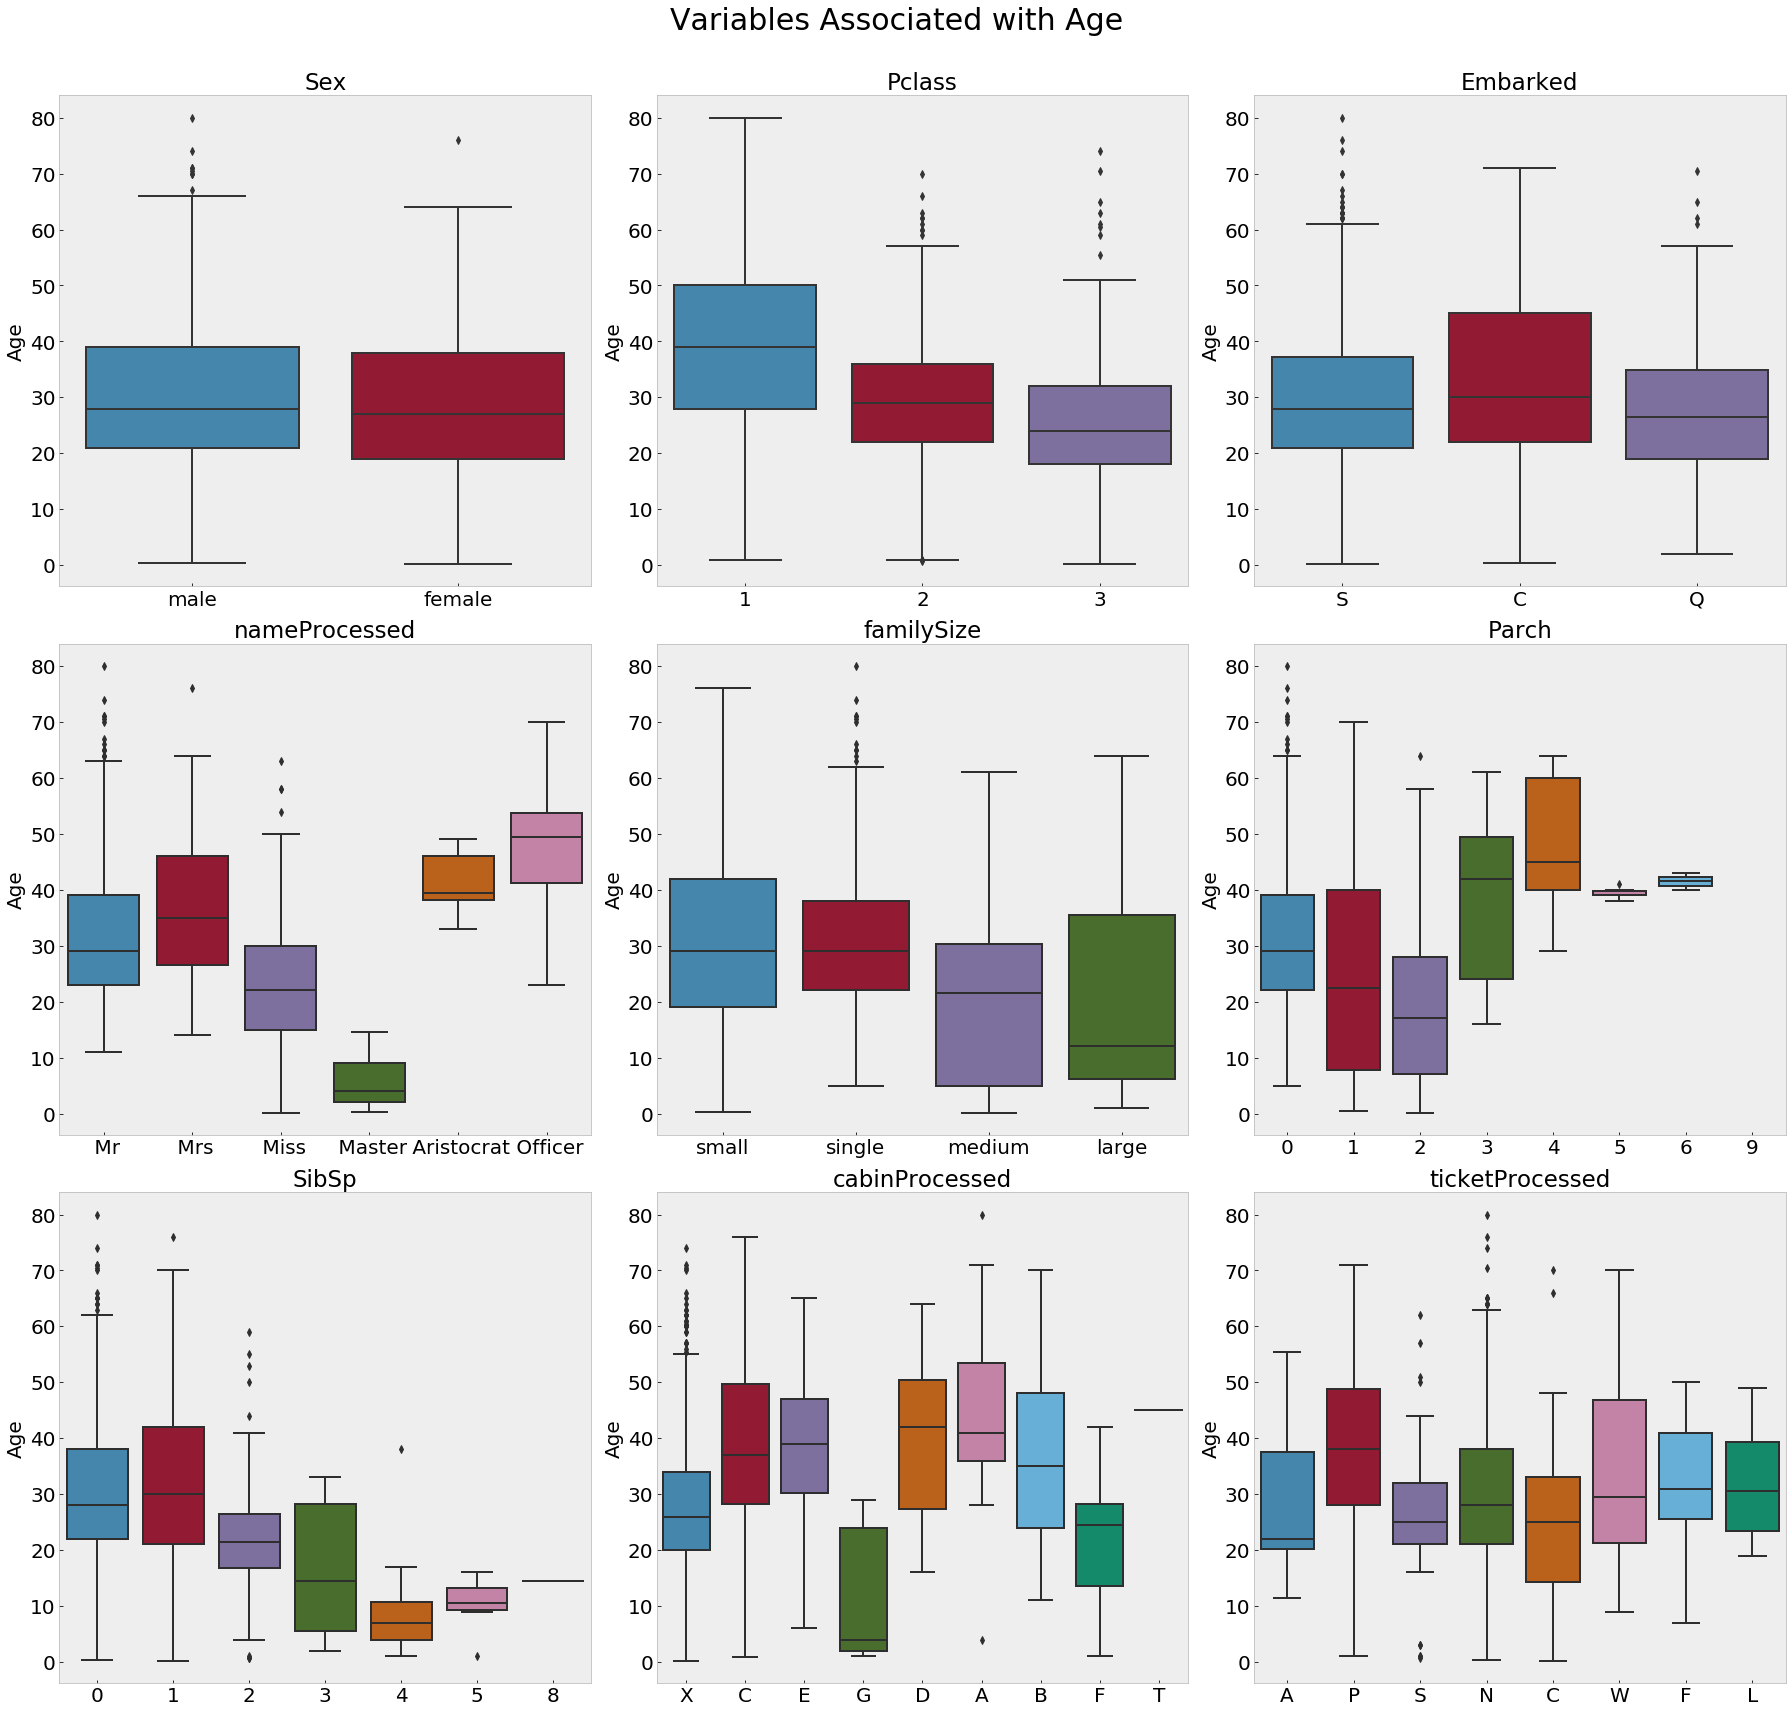

In [52]:
"""Create a boxplot to view the variables correlated with Age. First extract the variables we're interested in."""
toSearch = merged.loc[:, ["Sex", "Pclass", "Embarked", "nameProcessed", "familySize", "Parch", 
                             "SibSp", "cabinProcessed", "ticketProcessed"]]

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
for ax, column in zip(axes.flatten(), toSearch.columns):
    sns.boxplot(x = toSearch[column], y = merged.Age, ax = ax)
    ax.set_title(column, fontsize = 23)
    ax.tick_params(axis = "both", which = "major", labelsize = 20)
    ax.tick_params(axis = "both", which = "minor", labelsize = 20)
    ax.set_ylabel("Age", fontsize = 20)
    ax.set_xlabel("")
fig.suptitle("Variables Associated with Age", fontsize = 30)
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

**Findings:** 
1. Age distribution seems to be the same in male and female subpopulations of Sex and S, C, Q subpopulations of Embarked. So Sex and Embarked aren't good predictors for Age.
2. On the other hand, Age distribution seems to be distinct in Pclass's 1, 2 and 3 subpopulations, so Pclass is informative to predict Age.
3. Finally, Age distribution seems to be distinct in different categories for nameProcessed, familySize, SibSp, Parch, and cabinProcessed. So they might be good predictors for Age as well.

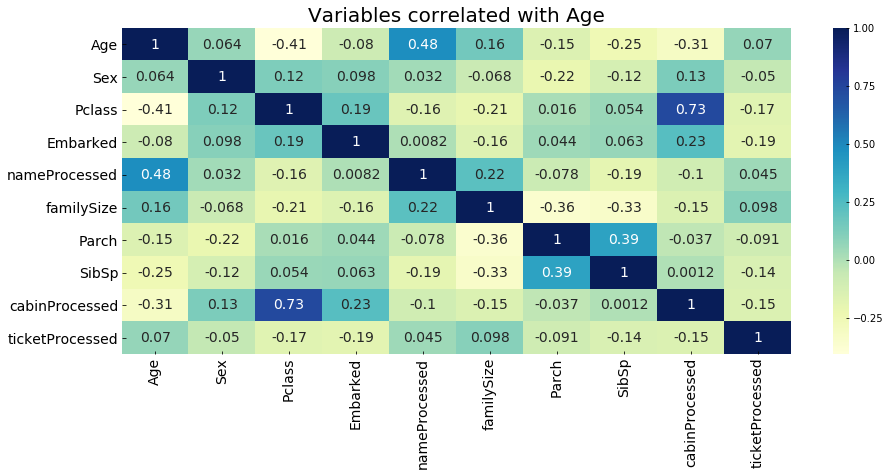

In [53]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our 
boxplot interpretation holds true. We need to convert categorical variable into numerical to plot 
correlation heatmap. So convert categorical variables into numerical."""
from sklearn.preprocessing import LabelEncoder
toSearch = toSearch.agg(LabelEncoder().fit_transform)
toSearch["Age"] = merged.Age # Inserting Age in dataframe "toSearch".
toSearch = toSearch.set_index("Age").reset_index() # Move Age column at index 0.

# Now create the correlation heatmap
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(toSearch.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Variables correlated with Age", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()

**Findings:** As expected Sex, Embarked, and ticketProcessed have the weakest correlation with Age what we could guess beforehand from boxplot. Parch and familySize are moderately correlated with Age. nameProcessed, Pclass, Cabin, and SibSp have the highest correlation with Age. But we are gonna use nameProcessed and Pclass only in order to impute Age since they have the strongest correlation with Age. So the tactic is to impute missing values of Age with the median age of similar rows according to nameProcessed and Pclass.

In [54]:
"""Impute Age with median of respective columns (i.e., nameProcessed and Pclass)."""
merged.Age = merged.groupby(["nameProcessed", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))

"""So by now we should have variables with no missing values."""
bold("Missing Values after Imputation:")
display(merged.isnull().sum())

**Missing Values after Imputation:**

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
cabinProcessed        0
nameProcessed         0
familySize            0
ticketProcessed       0
dtype: int64

# 8.Bivariate Analysis <a id="8"></a>
Being the most important part, bivariate analysis tries to find the relationship between two variables. We will look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combination of categorical and numerical variables. The combination can be: Numerical & Numerical, Numerical & Categorical and Categorical & Categorical. Different methods are used to tackle these combinations during analysis process. The methods are:
1. Numerical & Numerical: Pearson's correlation, or Spearman correlation (the later doesn't require normal distribution).
2. Numerical & Categorical: Point biserial correlation (only  if categorical variable is binary type), or ANOVA test. For this problem, you can use either biserial correlation or ANOVA. But I will perform both test just to learn because ANOVA will come in handy if categorical variable has more than two classes.
3. Categorical & Categorical: We would use Chi-square test for bivariate analysis between categorical variables.

## 8.1 Numerical & Categorical Variables <a id="8.1"></a>
First we create a boxplot between our numerical and categorical variables to check if the distribution of numerical variable is distinct in different classes of nominal variables. Then we find the mean of numerical variable for every class of categorical variable. Again we plot a histogram of numerical variable for every class of categorical variable. Finally anova or point biserial correlation (in case of two class categorical variable) is calculated to find association between nominal and numerical variables.   

In [55]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]
df_test = df_test.drop(columns = ["Survived"], axis = 1)

"""#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation."""
def boxplotAndCorrelation(numVariable,catVariable=df_train.Survived):
    """Return boxplot between a categorical and numerical variable. Also calculates biserial correlation.
    numVariable = a numerical variable of interest."""
    
    # Calculate point biserial correlation and p value
    biserialCorr = stats.pointbiserialr(numVariable,catVariable)[0].round(2)
    pValue = stats.pointbiserialr(numVariable,catVariable)[1].round(5)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots boxplot of categorical variable vs numerical variable
    fig.add_trace(
        go.Box(
            x = catVariable,
            y = numVariable,
            marker_color="lightseagreen",
            ))
    
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Association between {catVariable.name} and {numVariable.name} (corr: {biserialCorr}, p: {pValue})",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>{numVariable.name}</b>")
    return fig.show()


"""#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean."""
def numGroupedByCat(numVariable,catVariable=df_train.Survived):
    """Returns a barplot showing mean of numerical variable across the class of categorical variable."""
    
    # Calculates mean across different classes of categorical variable
    numGroupedByCat = numVariable.groupby(catVariable).mean().round(2)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots barplot
    fig.add_trace(
        go.Bar(
            x = numGroupedByCat.index,
            y = numGroupedByCat,
            text=numGroupedByCat,
            hoverinfo="x+y",
            textposition="auto",
            textfont=dict(family="sans serif",size=15)
        ))
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Mean {numVariable.name} across {catVariable.name}",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>Mean {numVariable.name}</b>")
    return fig.show()

    
"""#3.This function plots histogram of numerical variable for every class of categorical variable."""
def numHistByCat(numVariable,catVariable=df_train.Survived):
    """Returns numerical variable distribution across classes of categorical variable."""
    fig,ax = plt.subplots(1,1,figsize = (18,7))
    font_size = 15
    title_size = 18
    numVariable[catVariable==1].hist(bins=50,color="green", label = "survived", grid = False, alpha=0.5)
    numVariable[catVariable==0].hist(bins=50,color="red", label = "died", grid = False, alpha=0.5)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=font_size)
    ax.set_xlabel(f"{numVariable.name}", fontsize = font_size)
    ax.set_title(f"{numVariable.name} Distribution of Survivors vs Victims", fontsize = title_size)
    plt.legend()
    return plt.show()

   
"""#4.Create a function to calculate anova between numerical and categorical variable."""
def calculateAnova(numVariable, catVariable=df_train.Survived):
    """Returns f statistics and p value after anova calculation."""
    
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    groupNumVariableByCatVariable0 = numVariable[catVariable==0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    # Calculate one way anova
    fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) # Calculate f statistics and p value
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

### 8.1.1 Fare & Survived <a id="8.1.1"></a>

In [56]:
"""Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.Fare)

**Findings:** The distribution of Fare between different categories of Survived (0 and 1) are distinct (very least overlap) that makes it comparatively strong predictor for Survived what is kind of true from the correlation value of  0.257307 and the p value (less than 0.01) that suggests we're 99% confident that this correlation is statistically significant. Also survival is positively correlated to Fare, so the more you pay for fare, the more your chances are to survive that is quite evident from the box plot.

In [57]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.Fare)

**Looks like, on average, if you pay more for your ticket, you are more likely to survive. Let's plot histogram of survivors and victims fare together to validate our intuition:**

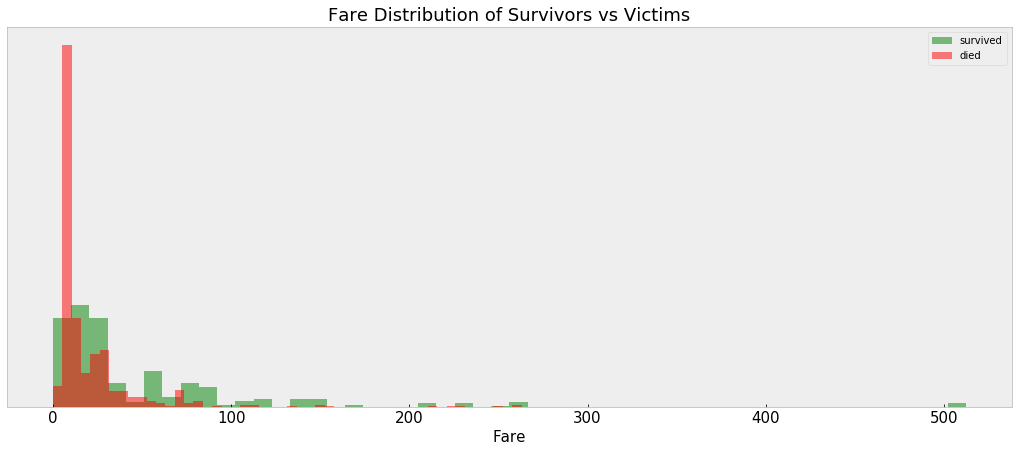

In [58]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.Fare)

**That's true. Passengers who paid more for their fair, mostly survived.**

**ANOVA:** 
The ANOVA(ANalysis Of VAriance) test lets us check whether a numeric response variable varies according to the levels (or class) of a categorical variable. When we simply refer to 'ANOVA', we usually mean the 'one way' ANOVA which is a test for exploring the impact of one single factor on three or more groups (but two groups would also do, as we explain below).

Though one should use either point biserial correlation (if categorical variable is of binary type) or ANOVA method for this problem to find any association between a categorical and a numerical variable, I would perform ANOVA too to have an intuition of how ANOVA works. Though ANOVA is usually prefered if the categorical variable having more than two groups, it is also possible to perform ANOVA for a categorical variable with two groups.

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? The null hypothesis is all of the group means are equal. And the alternate hypothesis is any of the group means differ from one another.

In [59]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.Fare)

'Anova Result between Fare & Survived: f=> 63.03076422804448, p=> 6.120189341921873e-15'

**Interpretation of ANOVA result:**
As p < 0.05 we state that we have a main interaction effect. This simply means that amongst the groups at least any of the group(or groups) means statistically significantly  differ from one another (true for only more than two groups). However, this result does not identify the sample pair (or pairs) which cause this significance (again true for more than two groups of categorical variable but we have just two groups..i.e., 0 and 1).
So, when ANOVA reports 'interaction effect' we need to further identify the group pairs by applying pair-wise controls(required for more than two groups of categorical variable). Although these controls could be done by implementing ordinary t-test but this is not the right approach. So a post hoc-test ( usually Tukey's test) is performed to find the pair or pairs that cause the difference. Though Tukey's test is not required with a categorical variable less than three groups.

***Note:*** Tukey's test is not required if ANOVA gives a p value greater than 0.05 and nominal variable has less than three groups. 


### 8.1.2 Age & Survived <a id="8.1.2"></a>

In [60]:
"""Let's create a box plot between Age and Survived to have an idea by how much Age is associated with Survived. Also find point biserial correlation between them."""
boxplotAndCorrelation(df_train.Age)

**Findings:** Box plot shows the distribution of Age between categories of Survived (1 and 0) has significant overlap which is also kind of true from a small correlation value of -0.05939. And a p value greater than 0.05 indicates that there is no evidence that the correlation is statistically significant. As we can see that Survived is inversly correlated to Age, so if you are younger, you are just likely to survive.

In [61]:
"""So the mean age of survivors should be just less than those who died (small negative correlation and reading boxplot). Calculate the mean age of survivors and victims."""
numGroupedByCat(df_train.Age)

**Analysing box and above bar plot, we have a feeling that younger people, on average, were just more likely to survive. Let's plot one histogram of survivors' age and another of victims' age to validate our intuition.**

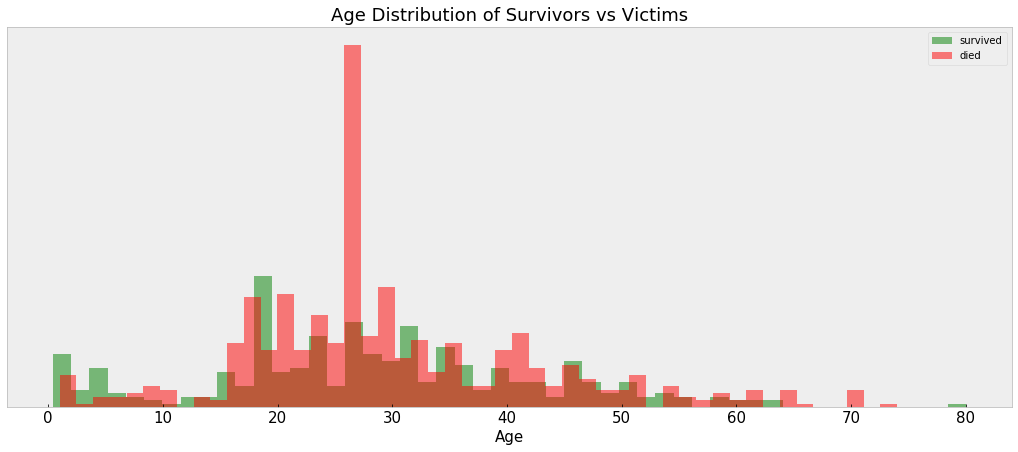

In [62]:
"""Histogram of survivors vs victims age."""
numHistByCat(df_train.Age)

**We see infants and children had high survival rate. The oldest passengers (Age = 80) also survived. A large number of passengers aged from 16 to 30 died.**

In [63]:
"""Perform ANOVA between all the levels of Survived (i.e., 0 and 1) and Age."""
calculateAnova(df_train.Age)

'Anova Result between Age & Survived: f=> 3.162396652163441, p=> 0.07569419096180038'

**Note:** Choose either biserial correlation (if categorical variable has two groups) or Anova. If anova states main interaction effect(i.e.,p<0.05) and categorical variable has more than two categories ( like good, better, best), then perform tukey test to find out the pair or pairs that cause the difference(i.e., main interaction effect).

**Interpretation of ANOVA result:**
Since p>0.05, we can say that survival chance is not statistically associated with Age.

## 8.2 Categorical & Categorical Variables <a id="8.2"></a>
We will calculate and plot absolute and relative frequency of output categorical variable by predictor nominal variables. We would calculate the chi square test between target nominal and predictor nominal variables. Finally we will calculate Bonferroni-adjusted P value if the contingency table has dimension more than 2x2.

In [64]:
"""#1.Create a function that calculates absolute and relative frequency of Survived variable by a categorical variable. And then plots the absolute and relative frequency of Survived by a categorical variable."""
def calculateCrosstabulation(catVariable, targetCatVariable=df_train.Survived):
    """ Plots cross tabulation in absolute and relative scale.
    catVariable = input categorical variable, 
    targetCatVariable = our target categorical variable."""
    
    # Calculate cross tabulation in abs and relative scale
    absCount = pd.crosstab(index = catVariable, columns = targetCatVariable)\
    .rename(columns={0:"Victims",1:"Survivors"})
    relCount = pd.crosstab(index = catVariable, columns = targetCatVariable, normalize="index")\
    .rename(columns={0:"Victims",1:"Survivors"})*100
    relCount = relCount.round(1)
    
    # Create two subplots of bar chart
    fig=make_subplots(
        rows=2, 
        cols=1,
        vertical_spacing=0.3,
        subplot_titles=(f"Absolute Count of Survival and Death by {catVariable.name}", 
                        f"Percentage Count of Survival and Death by {catVariable.name}"),
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for absolute frequency
    for col in absCount.columns:
        fig.add_trace(go.Bar(x=absCount.index,
                             y=absCount[col],
                             text=absCount[col],
                             hoverinfo="x+y",
                             textposition="auto",
                             name=f"{col}",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )


    # Add another trace for relative frequency
    for col in relCount.columns:
        fig.add_trace(go.Bar(x=relCount.index,
                             y=relCount[col],
                             text=relCount[col],
                             hoverinfo="x+y",
                             textposition="auto",
                             name=f"{col}",
                             textfont=dict(family="sans serif",size=14),
                            ),
                     row=2,
                     col=1
                     )
        
    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=1000,
        hovermode="closest",
        barmode = "group",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axes titles in bold
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Rel Frequency(%)</b>")
    
    # Set x-axis title in bold
    fig.layout.xaxis2.update(title=f"<b>{catVariable.name}</b>")
    return fig.show()

    
"""#2.Create a function to calculate chi square test between a categorical and target categorical variable."""
def calculateChiSquare(catVariable, targetCatVariable=df_train.Survived):
    """Returns chi square test restult between independent and dependent target variables."""
    
    catGroupedByCatTarget = pd.crosstab(index = catVariable, columns = targetCatVariable)
    testResult = stats.chi2_contingency(catGroupedByCatTarget)
    print(f"Chi Square Test Result between {targetCatVariable.name} & {catVariable.name}:")
    return print(testResult)


"""#3.Finally create another function to calculate Bonferroni-adjusted pvalue for a categorical and target categorical variable."""
def calculateBonferroniAdjusted(catVariable, targetCatVariable=df_train.Survived):
    """Returns bonferroni-adjusted pvalue between independent and dependent target variables."""
    
    # Create one hot encoding for the independent categorical variable
    catEncoded = pd.get_dummies(catVariable)
    for column in catEncoded.columns:
        catGroupedByCatTarget = pd.crosstab(index = catEncoded[column], columns = targetCatVariable)
        testResult = stats.chi2_contingency(catGroupedByCatTarget)
        print(f"Bonferroni-adjusted pvalue between {catVariable.name}({column}) and {targetCatVariable.name}:")
        print(f"{testResult}\n")

### 8.2.1 Sex & Survived <a id="8.2.1"></a>

In [65]:
"""Plot the no of passergers who survived and died due to their sex in absolute and relative scale."""
calculateCrosstabulation(df_train.Sex)

**Findings:** Out of 342 survivors, 233 passergers were female while only 109 passengers were male. So female survivors were more than double the male survivors. Proportion tells a female has over 74% chance of survival while male has almost 19% chance of survival. So female has the best chance of survival.

***Chi-square Test***: The Chi-square test of independence tests if there is a significant relationship between two categorical variables.The data is usually displayed in a cross-tabulation format with each row representing a category for one variable and each column representing a category for another variable. Chi-square test of independence is an omnibus test.That is it tests the data as a whole. This means that one will not be able to tell which levels (categories) of the variables are responsible for the relationship **if the Chi-square table is larger than 2×2. If the test is larger than 2×2, it requires post hoc testing.**

**The H0 (Null Hypothesis): There is no relationship between variable 1 and variable 2.**

**The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.**

If the p-value is significant (less than 0.05), you can reject the null hypothesis and claim that the findings support the alternate hypothesis. While we check the results of the chi2 test, we need also to check that the expected cell frequencies are greater than or equal to 5. If a cell has an expected frequency less that 5, then the Fisher’s Exact test should be use to overcome this problem.

The chi2_contingency() method conducts the Chi-square test on a contingency table (crosstab).

In [66]:
"""Perform chi-square test of independence between Survived and Sex."""
calculateChiSquare(df_train.Sex)

Chi Square Test Result between Survived & Sex:
(260.71702016732104, 1.1973570627755645e-58, 1, array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))


***Interpretation of chi-square test outcome***: The first value (260.717) is the Chi-square value, followed by the p-value (1.197e-58), then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is almost 0).  Thus, the results indicate that there is a statistically significant relationship between Sex and Survived.

### 8.2.2 Pclass & Survived <a id="8.2.2"></a>

In [67]:
"""Plot the number of passengers who survived and died due to their pclass in absolute and relative scale."""
calculateCrosstabulation(df_train.Pclass)

**Findings:** Out of 342 survivors, pclass1(136) has the most number of survivors followed by pclass3(119) and pclass2(87). But the percentage tells different story. If you're in class1, your survival chance is nearly 63% while pclass2 has just over 47% survival chance. But if you are in class3, your chance of survival is very bleak, i.e.,just over 24%.

In [68]:
"""Perform chi-square test of independence between Survived and Pclass."""
calculateChiSquare(df_train.Pclass)

Chi Square Test Result between Survived & Pclass:
(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))


**Interpretation of chi-square test outcome:** The overall 3x2 table has a chi-square value of 102.889, pvalue  of 4.549e-23, degrees of freedom of 2 and the rest are the expected frequencies of array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is almost 0). Thus, the results indicate that there is a statistically significant relationship between Pclass and titanic's survivors. 


**Post Hoc Test**: Although our Chi-square test was signficant, since our analysis is 3x2 we don't know which levels of Pclass(1, 2 or 3) have the strongest association with variable Survived. Hence we need to perform a post hoc test to verify if and which combinations are actually significantly associated with Survived. In order to do this, we need to conduct multiple 2×2 Chi-square tests using the *Bonferroni-adjusted p-value.*

To conduct multiple 2×2 Chi-square tests, one needs to regroup the variables for each test to where it is one category against the rest. For us, it will be:

1. 1 vs 2
2. 1 vs 3
3. And finally 2 vs 3

**Because there are 3 comparisons, the Bonferroni-adjusted P value needed for significance is 0.05/3, or 0.017. So for our any planned pairwise comparisons to be significant, the p-value must be less than 0.017.**

In [69]:
"""Calculate Bonferroni-adjusted pvalue for Pclass (1,2,3) and Survived."""
calculateBonferroniAdjusted(df_train.Pclass)

Bonferroni-adjusted pvalue between Pclass(1) and Survived:
(71.46583854616047, 2.821002116713357e-17, 1, array([[415.90909091, 259.09090909],
       [133.09090909,  82.90909091]]))

Bonferroni-adjusted pvalue between Pclass(2) and Survived:
(7.2971925540056475, 0.006906243870048795, 1, array([[435.62626263, 271.37373737],
       [113.37373737,  70.62626263]]))

Bonferroni-adjusted pvalue between Pclass(3) and Survived:
(91.23179223158795, 1.277904920294387e-21, 1, array([[246.46464646, 153.53535354],
       [302.53535354, 188.46464646]]))



**Interpretation of the outcome of  Bonferroni-adjusted p-value test:** Using the Bonferroni-adjusted p-value of 0.017, 3 out of 3 planned pairwise comparisons are significant. Though p value suggests Pclass2 has the weakest association with Survived compared to Pclass1 and Pclass3.

###  8.2.3 Embarked & Survived <a id="8.2.3"></a>

In [70]:
"""Count and plot the survivors and victims by place of embarkation in absolute and relative scale."""
calculateCrosstabulation(df_train.Embarked)

**Findings:** Though people embarked from Southampton have the most survivors count (219) but proportion-wise it has only nearly 34% chance of survival. Because 427 passengers embarked from Southampton died. On the contrary, if you would embark from Cherbourg, you have a very decent chance of survival of over 55%.  Finally, people embarked from  Queenstown have a chance of survival more than 5% from those who embarked from Southampton.

In [71]:
"""Now perform chi-square test to find the association between Embarked and Survived."""
calculateChiSquare(df_train.Embarked)

Chi Square Test Result between Survived & Embarked:
(25.964452881874784, 2.3008626481449577e-06, 2, array([[103.51515152,  64.48484848],
       [ 47.44444444,  29.55555556],
       [398.04040404, 247.95959596]]))


**Interpretation of chi-square test result:** The  3x2 table has a chi-square value of 25.96, pvalue of 2.3e-06, degrees of freedom of 2 and the rest are the expected frequencies of array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is less than 0.01). Thus, the results indicate that there is a statistically significant relationship between the variables Embarked and Survived.

**Because there are three comparisons, the Bonferroni-adjusted P value needed for significance is 0.05/3, or 0.017. So for our any planned pairwise comparisons to be significant, the p-value must be less than 0.017.**

In [72]:
"""Calculate Bonferroni-adjusted pvalue  between Embarked (C,Q,S one by one) and Survived."""
calculateBonferroniAdjusted(df_train.Embarked)

Bonferroni-adjusted pvalue between Embarked(C) and Survived:
(24.34294028991685, 8.062166851376562e-07, 1, array([[445.48484848, 277.51515152],
       [103.51515152,  64.48484848]]))

Bonferroni-adjusted pvalue between Embarked(Q) and Survived:
(0.00018551307377882246, 0.9891328942213099, 1, array([[501.55555556, 312.44444444],
       [ 47.44444444,  29.55555556]]))

Bonferroni-adjusted pvalue between Embarked(S) and Survived:
(19.279400244953347, 1.1291808110540787e-05, 1, array([[150.95959596,  94.04040404],
       [398.04040404, 247.95959596]]))



**Interpreting the result of pair-wise Bonferroni-adjusted pvalue:** Using the Bonferroni-adjusted p-value of 0.017, 2 of the 3 planned pairwise comparisons are significant. Bonferroni-adjusted p-value for Q and Survived is 0.989 which is way greater than 0.017. So it can be said that level Q of variable Embarked is not statistically associated with variable Survived.

### 8.2.4 SibSp & Survived <a id="8.2.4"></a>

In [73]:
"""Count and plot absolute and relative number of survivors and victims due to SibSp."""
calculateCrosstabulation(df_train.SibSp)

**Findings:** A large number of passengers (210) who survived were without (0) any siblings or spouse, followed by 112 passengers with 1 spouse or siblings. Percentage-wise, passengers with 1 spouse or siblings had over 53.5% chance of survival, followed by passengers with 2 siblings or spouse had over 46% chance of survival. Passengers with 5 or 8 siblings or spouse had all died.

In [74]:
"""Chi-square test between SibSp and Survived."""
calculateChiSquare(df_train.SibSp)

Chi Square Test Result between Survived & SibSp:
(37.2717929152043, 1.5585810465902147e-06, 6, array([[374.62626263, 233.37373737],
       [128.77777778,  80.22222222],
       [ 17.25252525,  10.74747475],
       [  9.85858586,   6.14141414],
       [ 11.09090909,   6.90909091],
       [  3.08080808,   1.91919192],
       [  4.31313131,   2.68686869]]))


**Interpretation of Chi-square Test:**  Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

### 8.2.5 Parch & Survived  <a id="8.2.5"></a>

In [75]:
"""Visualize absolute and relative number of survivors and victims by Parch."""
calculateCrosstabulation(df_train.Parch)

**Findings:** Passengers with 3 children/parent had 60% survival rate, followed by passengers with 2 children/parent has a 50% survival rate. No passengers survived with 4 or 6 children/parent.

In [76]:
"""Perform Chi-square test of independence between Parch and Survived."""
calculateChiSquare(df_train.Parch)

Chi Square Test Result between Survived & Parch:
(27.925784060236168, 9.703526421039997e-05, 6, array([[4.17757576e+02, 2.60242424e+02],
       [7.27070707e+01, 4.52929293e+01],
       [4.92929293e+01, 3.07070707e+01],
       [3.08080808e+00, 1.91919192e+00],
       [2.46464646e+00, 1.53535354e+00],
       [3.08080808e+00, 1.91919192e+00],
       [6.16161616e-01, 3.83838384e-01]]))


**Interpretation of Chi-square Test Outcome:**  Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

### 8.2.6 nameProcessed & Survived <a id="8.2.6"></a>

In [77]:
"""Visualize absolute and relative number of survivors and victims by nameProcessed."""
calculateCrosstabulation(df_train.nameProcessed)

**Findings:** Women had the best survival rate, i.e., Mrs(over 79%) and Miss(over 70%) that reminds us the variable Sex where we have seen female were more likely to survive in. Mr is the worst title to have when it comes to survival situation since just over 15% of passengers with title Mr survived that again indicates the importance of Sex as a deal breaker for survival.

In [78]:
"""Perform Chi-square test of independence between nameProcessed and Survived."""
calculateChiSquare(df_train.nameProcessed)

Chi Square Test Result between Survived & nameProcessed:
(289.8360961873925, 1.5325912223703196e-60, 5, array([[  3.08080808,   1.91919192],
       [ 24.64646465,  15.35353535],
       [113.98989899,  71.01010101],
       [318.55555556, 198.44444444],
       [ 77.63636364,  48.36363636],
       [ 11.09090909,   6.90909091]]))


**Interpretation of chi-square test result**: Since all the expected frequencies aren't greater than 5, chi-square test result can't be trusted.

### 8.2.7 familySize & Survived <a id="8.2.7"></a>

In [79]:
"""Plot the Survived's absolute and percentage count by familySize."""
calculateCrosstabulation(df_train.familySize)

**Findings:** Passengers with small and medium familiy size had good survival rate. Single passengers had survival chance of just over 30%. And passengers with large families has a survival rate below 15%.

In [80]:
"""Perform Chi-square test of independence between familySize and Survived."""
calculateChiSquare(df_train.familySize)

Chi Square Test Result between Survived & familySize:
(66.05581680279249, 2.981870009647575e-14, 3, array([[ 28.95959596,  18.04040404],
       [ 27.11111111,  16.88888889],
       [330.87878788, 206.12121212],
       [162.05050505, 100.94949495]]))


**Interpretation of chi-square test result**:Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05(infact p value is almost 0). Thus, the results indicate that there is a statistically significant relationship between variable Family_size and Survived.

**Because there are 8 comparisons, the Bonferroni-adjusted P value needed for significance is 0.05/8, or 0.0063. So for our any planned pairwise comparisons to be significant, the p-value must be less than 0.0063.**

In [81]:
"""Calculate Bonferroni-adjusted pvalue  between familySize and Survived."""
calculateBonferroniAdjusted(df_train.familySize)

Bonferroni-adjusted pvalue between familySize(large) and Survived:
(10.55137053799774, 0.0011610196650239893, 1, array([[520.04040404, 323.95959596],
       [ 28.95959596,  18.04040404]]))

Bonferroni-adjusted pvalue between familySize(medium) and Survived:
(4.418221527178599, 0.03555707818485421, 1, array([[521.88888889, 325.11111111],
       [ 27.11111111,  16.88888889]]))

Bonferroni-adjusted pvalue between familySize(single) and Survived:
(36.00051446773865, 1.9726543846517113e-09, 1, array([[218.12121212, 135.87878788],
       [330.87878788, 206.12121212]]))

Bonferroni-adjusted pvalue between familySize(small) and Survived:
(49.42743388214718, 2.058468013374345e-12, 1, array([[386.94949495, 241.05050505],
       [162.05050505, 100.94949495]]))



**Interpretation of Bonferroni-adjusted Post-hoc test result:** Using the Bonferroni-adjusted p-value of 0.0063, 3 of the 4 planned pairwise comparisons are significant. Bonferroni-adjusted p-value for medium and Survived is 0.03555 which is way greater than 0.0063. So it can be said that level medium of variable familySize is not statistically associated with variable Survived.

### 8.2.8 cabinProcessed & Survived <a id="8.2.8"></a>

In [82]:
"""Count and plot absolute and relative number of survivors and victims due to cabin possession."""
calculateCrosstabulation(df_train.cabinProcessed)

**Findings:** Most of the passengers survived and died were from cabin X. But percentage-wise, its category B, D, and E that had impressive chance of survival. People from cabin category X had just 30% chance of survival.

In [83]:
"""Perform Chi-square test of independence between Cabin and Survived."""
calculateChiSquare(df_train.cabinProcessed)

Chi Square Test Result between Survived & cabinProcessed:
(99.16416061888009, 6.326020042314704e-18, 8, array([[9.24242424e+00, 5.75757576e+00],
       [2.89595960e+01, 1.80404040e+01],
       [3.63535354e+01, 2.26464646e+01],
       [2.03333333e+01, 1.26666667e+01],
       [1.97171717e+01, 1.22828283e+01],
       [8.01010101e+00, 4.98989899e+00],
       [2.46464646e+00, 1.53535354e+00],
       [6.16161616e-01, 3.83838384e-01],
       [4.23303030e+02, 2.63696970e+02]]))


**Interpretation of chi-square test result**: Since all of the expected frequencies aren't greater than 5, the chi2 test results can't be trusted.

### 8.2.9 ticketProcessed & Survived <a id="8.2.9"></a>

In [84]:
"""Count and plot absolute and relative number of survivors and victims due to ticketProcessed category."""
calculateCrosstabulation(df_train.ticketProcessed)

**Findings:** 93% passengers died with ticket category A, over 64% survived from category P. Over 57% survived from F and just over 15% passengers survived from ticket category W.

In [85]:
"""Perform Chi-square test of independence between ticketProcessed and Survived."""
calculateChiSquare(df_train.ticketProcessed)

Chi Square Test Result between Survived & ticketProcessed:
(36.7098892616397, 5.323006335674428e-06, 7, array([[ 17.86868687,  11.13131313],
       [ 28.95959596,  18.04040404],
       [  4.31313131,   2.68686869],
       [  2.46464646,   1.53535354],
       [407.28282828, 253.71717172],
       [ 40.05050505,  24.94949495],
       [ 40.05050505,  24.94949495],
       [  8.01010101,   4.98989899]]))


**Interpretation of chi-square test result**: Since all of the expected frequencies aren't greater than 5, the chi2 test results can't be trusted.

# 9.Multivariate Analysis <a id="9"></a>
In multivariate analysis, we try to find the relationship among more than two variables. Number of predictor variable in bivariate analysis was one. On the contrary, number of predictor variables for multivariate analysis are more than one. More specifically, we will try to associate more than one predictor variable with the response variable. We will just visualize the impact of different predictor variables (3 variables) at a time on variable Survived.

In [86]:
"""Create a function that plots the impact of 3 predictor variables at a time on a target variable."""
def doMultivariateAnalysis(catVar1, catVar2, catVar3, targetCatVariable=df_train.Survived):
    """Plots the impact of 3 variables on Survived variable at the same time.
    catVar1 = independent categorical variable 1,
    catVar2 = independent categorical variable 2,
    catVar3 = independent categorical variable 3.
    targetCatVariable = our dependent categorical variable."""
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    fontSize = 15
    catGroupedByCatTarget = pd.crosstab(index = [catVar1, catVar2, catVar3],
                                        columns = targetCatVariable, normalize = "index")*100
    catGroupedByCatTarget.rename({0:"%Died", 1:"%Survived"}, axis = 1, inplace = True)
    catGroupedByCatTarget.plot.bar(color = ["red", "green"],ax=ax)
    ax.set_xlabel(f"{catVar1.name},{catVar2.name},{catVar3.name}", fontsize = fontSize)
    ax.set_ylabel("Relative Frequency(%)", fontsize = fontSize)
    ax.tick_params(axis="x", labelsize=fontSize)
    ax.tick_params(axis="x", labelsize=fontSize)
    plt.legend(loc = "best")
    return plt.show()

## 9.1 (Pclass, Sex, cabinProcessed) vs Survived <a id="9.1"></a>

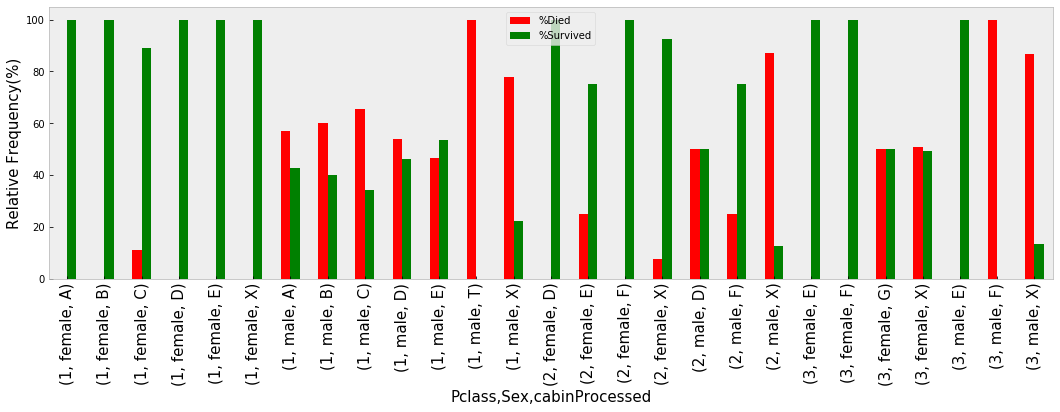

**Findings: Sex male seems to be deciding factor for death.**

In [87]:
"""Proportion of survivors and victims due to pclass, sex, and cabinProcessed."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.cabinProcessed)
bold("Findings: Sex male seems to be deciding factor for death.")

## 9.2 (Pclass, Sex, Embarked) vs Survived <a id="9.2"></a>

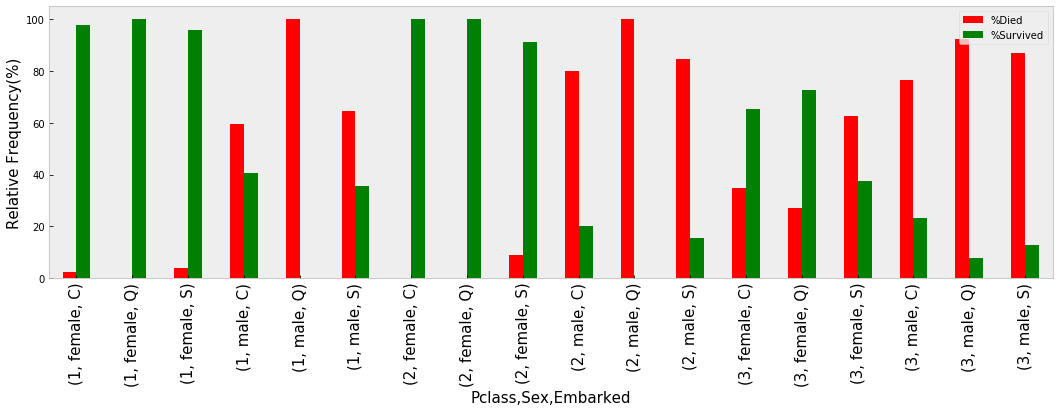

**Findings: Again Sex male seems to be deciding factor for death and female for survival.**

In [88]:
"""Proportion of survivors and victims due to pclass, sex, and embarked."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.Embarked)
bold("Findings: Again Sex male seems to be deciding factor for death and female for survival.")

## 9.3 (Pclass, Sex, SibSp) vs Survived <a id="9.3"></a>

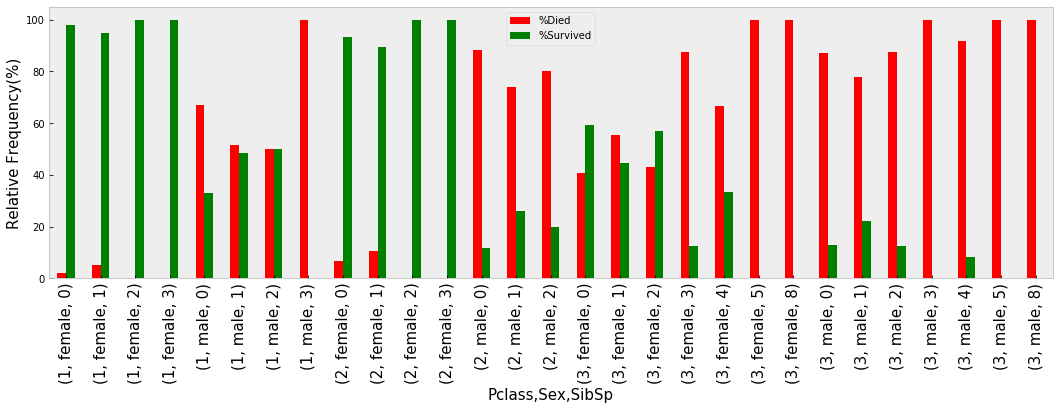

**Findings: Bigger SibSp and male Sex is responsible more for death.**

In [89]:
"""Proportion of survivors and victims due to pclass, sex, and SibSp."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.SibSp)
bold("Findings: Bigger SibSp and male Sex is responsible more for death.")

## 9.4 (Pclass, Sex, Parch) vs Survived <a id="9.4"></a>

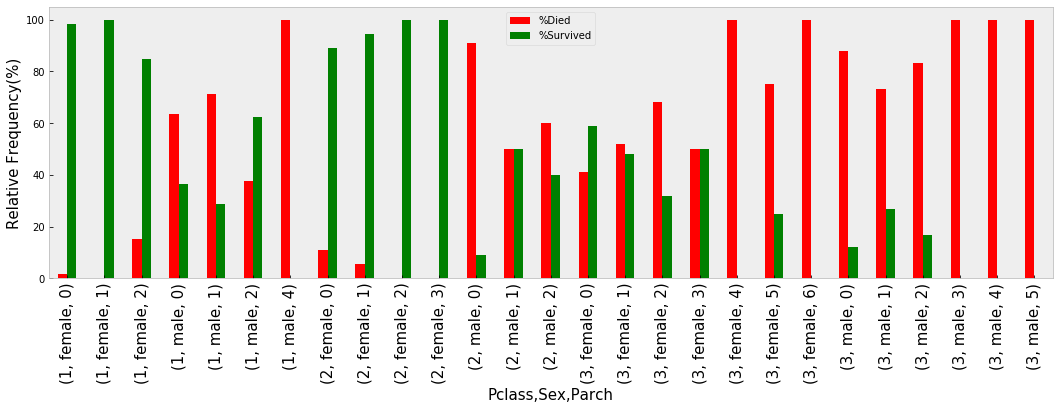

**indings: Bigger Parch and Sex male is responsible more for death.**

In [90]:
"""Proportion of survivors and victims due to pclass, sex, and Parch."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.Parch)
bold("indings: Bigger Parch and Sex male is responsible more for death.")

## 9.5 (Pclass, Sex, nameProcessed) vs Survived <a id="9.5"></a>

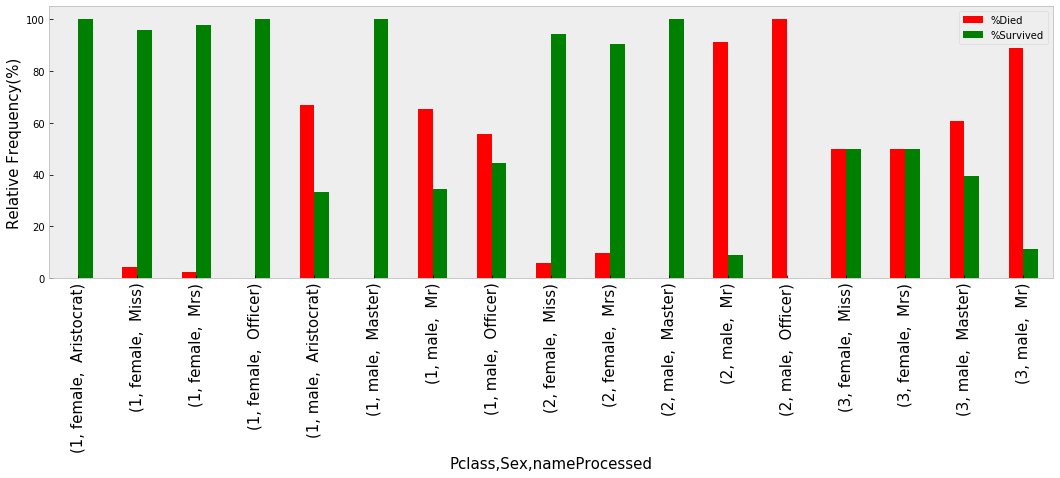

**Findings: Findings: Passengers with sex male and title mr mostly died.**

In [91]:
"""Proportion of survivors and victims due to pclass, sex, and nameProcessed."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.nameProcessed)
bold("Findings: Findings: Passengers with sex male and title mr mostly died.")

## 9.6 (Pclass, Sex, familySize) vs Survived <a id="9.6"></a>

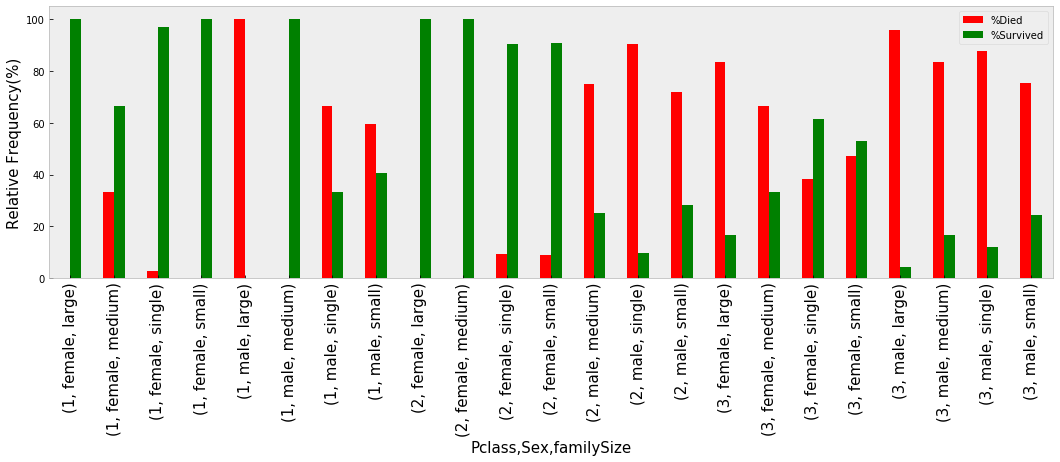

**Findings: Sex male, family size single and large greatly influence the death ratio.**

In [92]:
"""Proportion of survivors and victims due to pclass, sex, and familySize."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.familySize)
bold("Findings: Sex male, family size single and large greatly influence the death ratio.")

## 9.7 (Pclass, Sex, ticketProcessed) vs Survived <a id="9.7"></a>

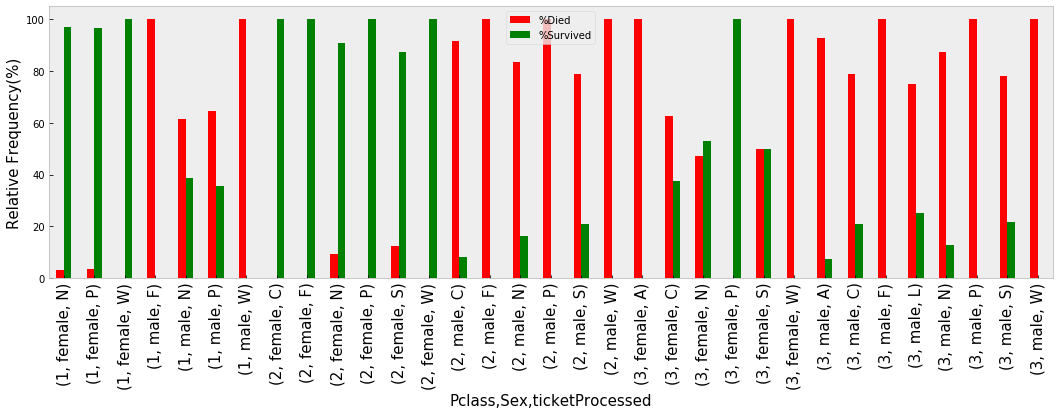

**Findings: Sex female, ticketProcessed p and w mostly survived.**

In [93]:
"""Proportion of survivors and victims due to pclass, sex, and ticketProcessed category."""
doMultivariateAnalysis(df_train.Pclass, df_train.Sex, df_train.ticketProcessed)
bold("Findings: Sex female, ticketProcessed p and w mostly survived.")

## 9.8 (Pclass, nameProcessed, cabinProcessed) vs Survived <a id="9.8"></a>

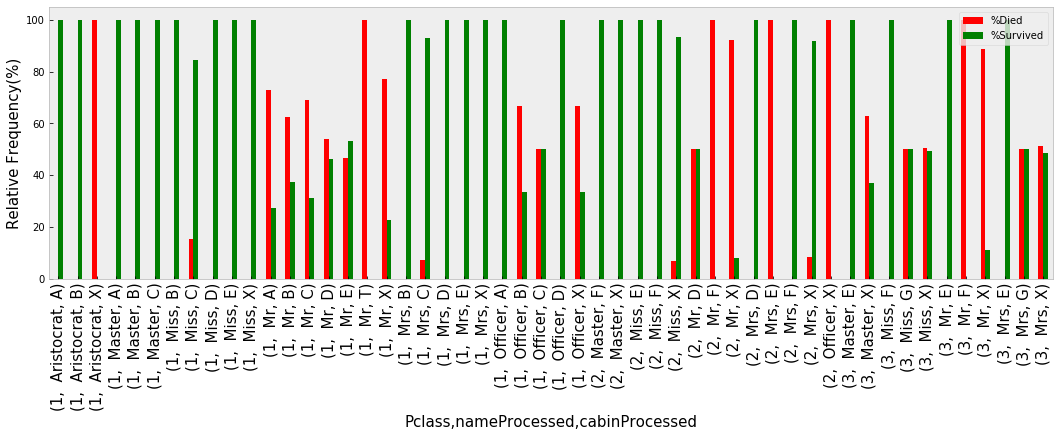

**Findings: Title mrs, master and cabin x had best survival ratio.**

In [94]:
"""Proportion of survivors and victims due to pclass, nameProcessed, and cabinProcessed."""
doMultivariateAnalysis(df_train.Pclass, df_train.nameProcessed, df_train.cabinProcessed)
bold("Findings: Title mrs, master and cabin x had best survival ratio.")

## 9.9 (familySize, Sex, cabinProcessed) vs Survived <a id="9.9"></a>

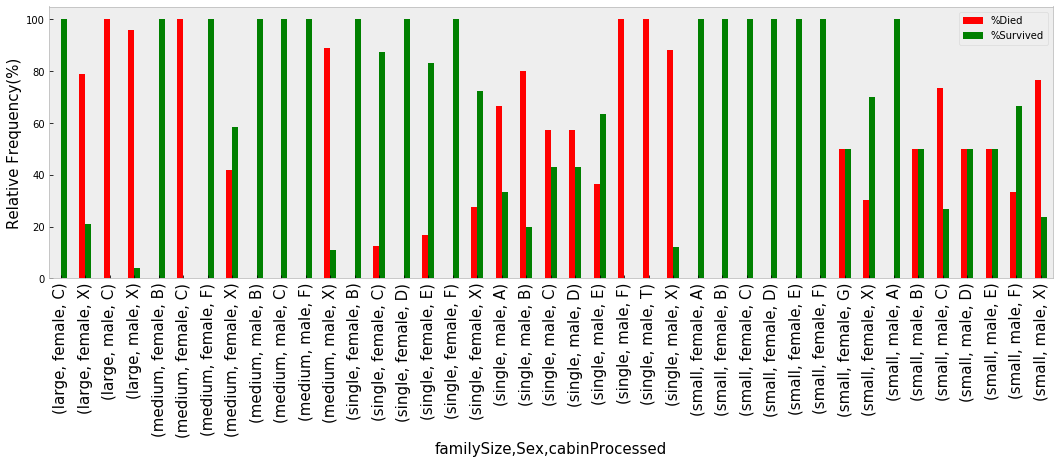

**Findings: family size small, medium and sex female had best survival chance.**

In [95]:
"""Proportion of survivors and victims due to familSize, sex, and cabinProcessed."""
doMultivariateAnalysis(df_train.familySize, df_train.Sex, df_train.cabinProcessed)
bold("Findings: family size small, medium and sex female had best survival chance.")

## 9.10 (Sex, nameProcessed, familySize) vs Survived <a id="9.10"></a>

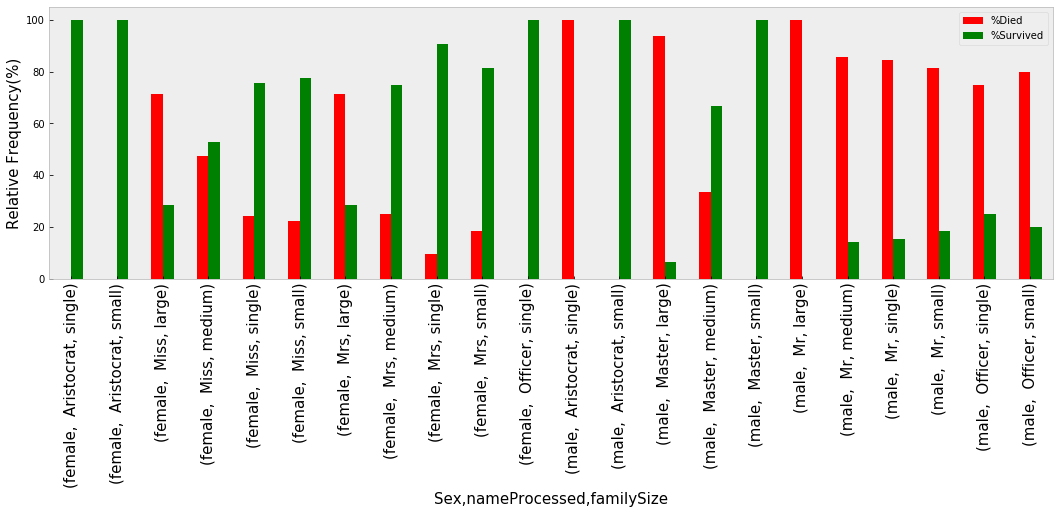

**Findings: Title aristocrat, sex female and familySize small mostly survived.**

In [96]:
"""Proportion of survivors and victims due to sex, nameProcessed, and familySize."""
doMultivariateAnalysis(df_train.Sex, df_train.nameProcessed, df_train.familySize)
bold("Findings: Title aristocrat, sex female and familySize small mostly survived.")

## 9.11 (Sex, nameProcessed, cabinProcessed) vs Survived <a id="9.11"></a>

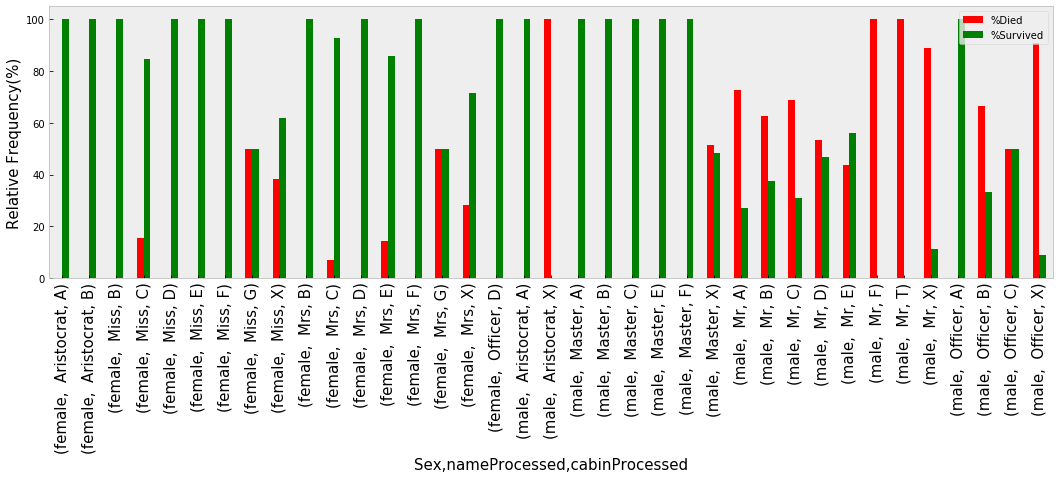

**Findings: Title aristocrat, miss, mrs and sex female mostly survived.**

In [97]:
"""Proportion of survivors and victims due to sex, nameProcessed, and cabinProcessed."""
doMultivariateAnalysis(df_train.Sex, df_train.nameProcessed, df_train.cabinProcessed)
bold("Findings: Title aristocrat, miss, mrs and sex female mostly survived.")

## 9.12 (Sex, nameProcessed, Embarked) vs Survived <a id="9.12"></a>

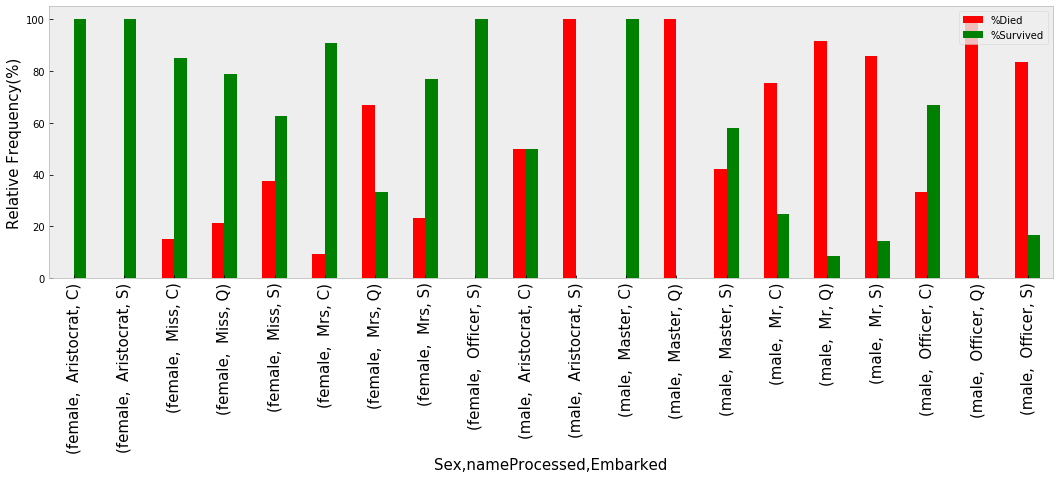

**Findings: Embarked c, sex female and title master and aristocrat had best survival rate.**

In [98]:
"""Proportion of survivors and victims due to sex, nameProcessed, and embarked."""
doMultivariateAnalysis(df_train.Sex, df_train.nameProcessed, df_train.Embarked)
bold("Findings: Embarked c, sex female and title master and aristocrat had best survival rate.")

## 9.13 (Sex, nameProcessed, ticketProcessed) vs Survived <a id="9.13"></a>

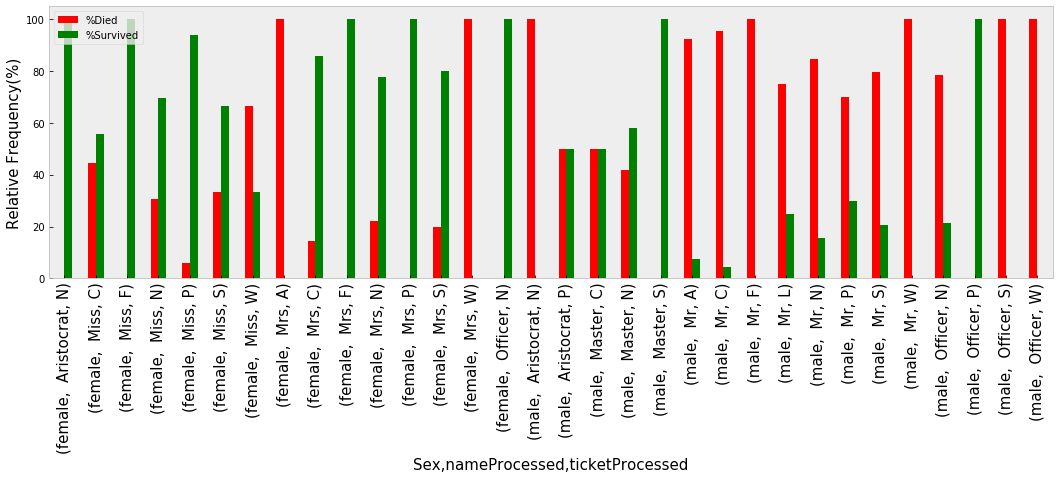

**Findings: ticketProcessed n, w and sex male and title mr mostly died.**

In [99]:
"""Proportion of survivors and victims due to sex, nameProcessed, and ticketProcessed."""
doMultivariateAnalysis(df_train.Sex, df_train.nameProcessed, df_train.ticketProcessed)
bold("Findings: ticketProcessed n, w and sex male and title mr mostly died.")

# 10.Data Transformation <a id="10"></a>
In this section, we will categorize our continuous variables. After that, redundant and useless features will be dropped. And finally categorical variables will be encoded into numerical variables to feed our machine learning models.

## 10.1 Binning Continuous Variables <a id="10.1"></a>
We saw Age is inversely correlated with survival and infants were more likely to survive. We will create some categories of age to check which categories of age  are more likely to survive. We would do the same for Fare except Fair is posivively correlated with Survived.

**Note:** Binning continuous variables prevents overfitting which is a common problem for tree based models like decision trees and random forest etc.

### 10.1.1 Binning Age <a id="10.1.1"></a>

In [100]:
"""Create bin categories for Age."""
ageGroups = ["infant","child","teenager","youngAdult","adult","aged"]

"""Create range for each bin categories of Age."""
groupRanges = [0,5,12,18,35,60,81]

"""Create and view categorized Age with original Age."""
merged["ageBinned"] = pd.cut(merged.Age, groupRanges, labels = ageGroups)
bold('**Age with Categorized Age:**')
display(merged[['Age', 'ageBinned']].head(2))

****Age with Categorized Age:****

,Age,ageBinned
0,22.0,youngAdult
1,38.0,adult


### 10.1.2 Binning Fare <a id="10.1.2"></a>

In [101]:
"""Create bin categories for Fare."""
fareGroups = ["low","medium","high","veryHigh"]

"""Create range for each bin categories of Fare."""
fareGroupRanges = [-1, 130, 260, 390, 520]

"""Create and view categorized Fare with original Fare."""
merged["fareBinned"] = pd.cut(merged.Fare, fareGroupRanges, labels = fareGroups)
bold("Fare with Categorized Fare:")
display(merged[["Fare", "fareBinned"]].head(2))

**Fare with Categorized Fare:**

,Fare,fareBinned
0,7.2500,low
1,71.2833,low


##  10.2 Dropping Features <a id="10.2"></a>
Now we have both transformed and the original variables transformation have been made from. So we should safely drop the variables that we think would not be useful anymore for our survival analysis since they are very unlikely to be analyzed in their raw forms.

In [102]:
display(merged.head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabinProcessed,nameProcessed,familySize,ticketProcessed,ageBinned,fareBinned
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,X,Mr,small,A,youngAdult,low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,small,P,adult,low


In [103]:
"""Let's see all the variables we currently have with their category."""
display(merged.head(2))

"""Drop the features that would not be useful anymore."""
merged.drop(columns = ["Name", "Age", "Fare", "Ticket", "Cabin"], inplace = True, axis = 1)

"""Features after dropping."""
bold("Features Remaining after Dropping:")
display(merged.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabinProcessed,nameProcessed,familySize,ticketProcessed,ageBinned,fareBinned
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,X,Mr,small,A,youngAdult,low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,small,P,adult,low


**Features Remaining after Dropping:**

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'cabinProcessed', 'nameProcessed', 'familySize',
       'ticketProcessed', 'ageBinned', 'fareBinned'],
      dtype='object')

## 10.3 Correcting Data Types <a id="10.3"></a>

In [104]:
"""Checking current data types."""
bold("Current Variable Data Types:")
display(merged.dtypes)

**Current Variable Data Types:**

PassengerId           int64
Survived            float64
Pclass                int64
Sex                  object
SibSp                 int64
Parch                 int64
Embarked             object
cabinProcessed       object
nameProcessed        object
familySize           object
ticketProcessed      object
ageBinned          category
fareBinned         category
dtype: object

1. PassengerId, SibSp, and Parch data types will be kept same (integer).
2. Survived data type will be converted into integer and rest of the variables' data types will be converted into categorical data types.

In [105]:
"""Correcting data types, converting into categorical variables."""
merged.loc[:, ["Pclass", "Sex", "Embarked", "cabinProcessed", "nameProcessed", "familySize", "ticketProcessed"]]\
= merged.loc[:, ["Pclass", "Sex", "Embarked", "cabinProcessed", "nameProcessed", "familySize", "ticketProcessed"]]\
.astype('category')

In [106]:
"""Check if data types have been corrected."""
bold("Data Types after Correction:")
display(merged.dtypes)

**Data Types after Correction:**

PassengerId           int64
Survived            float64
Pclass             category
Sex                category
SibSp                 int64
Parch                 int64
Embarked           category
cabinProcessed     category
nameProcessed      category
familySize         category
ticketProcessed    category
ageBinned          category
fareBinned         category
dtype: object

## 10.4 Encoding Categorical Variables <a id="10.4"></a>
We would like to use one hot encoding instead of label encoding because algorithm might give weights to higher values if label encoding is used to encode numeric variables.

In [107]:
"""Convert categorical data into numeric to feed our machine learning model."""
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset that would be fed to our machine learning algorithms."""
bold("Preview of Processed Data:")
display(merged.head(2))

**Preview of Processed Data:**

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabinProcessed_A,cabinProcessed_B,cabinProcessed_C,cabinProcessed_D,cabinProcessed_E,cabinProcessed_F,cabinProcessed_G,cabinProcessed_T,cabinProcessed_X,nameProcessed_ Aristocrat,nameProcessed_ Master,nameProcessed_ Miss,nameProcessed_ Mr,nameProcessed_ Mrs,nameProcessed_ Officer,familySize_large,familySize_medium,familySize_single,familySize_small,ticketProcessed_A,ticketProcessed_C,ticketProcessed_F,ticketProcessed_L,ticketProcessed_N,ticketProcessed_P,ticketProcessed_S,ticketProcessed_W,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged,fareBinned_low,fareBinned_medium,fareBinned_high,fareBinned_veryHigh
0,1,0.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2,1.0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


# 11.Model Building and Evaluation <a id="11"></a>
With all the preprocessings done and dusted, we're ready to train classifiers with the processed data. First extract train and test data from variable merged. Then feed the training data to the classifiers we're interested in for this problem.

In [108]:
"""Set a seed for reproducibility"""
seed = 43

"""Let's split the train and test set to feed machine learning algorithm."""
train = merged.iloc[:891, :]
test  = merged.iloc[891:, :]

In [109]:
"""Drop passengerid from train set and Survived from test set."""
train = train.drop(columns = ["PassengerId"], axis = 1)
train.Survived = train.Survived.astype(int) # Converts Survived to int requored for submission, otherwise
test = test.drop(columns = ["Survived"], axis = 1) # you will scored 0 on submission.

In [110]:
"""Extract data sets as input and output for machine learning models."""
xTrain = train.drop(columns = ["Survived"], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
yTrain = train['Survived'] # Output vector as pandas series (dim:891*1)

"""Extract test set"""
xTest  = test.drop("PassengerId", axis = 1).copy()

In [111]:
"""See the dimensions of input and output data set."""
print(f"Input Matrix Dimension: {xTrain.shape}")
print(f"Output Vector Dimension: {yTrain.shape}")
print(f"Test Data Dimension: {xTest.shape}")

Input Matrix Dimension: (891, 47)
Output Vector Dimension: (891,)
Test Data Dimension: (418, 47)


## 11.1 Training Model <a id="11.1"></a>
We would train 10 different classifiers for this binary classification problem.

In [112]:
"""Building machine learning models: 
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

"""Now initialize all the classifiers object."""
"""#1.Logistic Regression"""
lr = LogisticRegression()

"""#2.Support Vector Machines"""
svc = SVC(gamma = "auto")

"""#3.Random Forest Classifier"""
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

"""#4.KNN"""
knn = KNeighborsClassifier()

"""#5.Gaussian Naive Bayes"""
gnb = GaussianNB()

"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed)

"""#7.Gradient Boosting Classifier"""
gbc = GradientBoostingClassifier(random_state = seed)

"""#8.Adaboost Classifier"""
abc = AdaBoostClassifier(random_state = seed)

"""#9.ExtraTrees Classifier"""
etc = ExtraTreesClassifier(random_state = seed)

"""#10.Extreme Gradient Boosting"""
xgbc = XGBClassifier(random_state = seed)


"""List of all the models with their indices."""
modelNames = ["LR", "SVC", "RF", "KNN", "GNB", "DT", "GBC", "ABC", "ETC", "XGBC"]
models = [lr, svc, rf, knn, gnb, dt, gbc, abc, etc, xgbc]

In [113]:
"""Create a function that returns train accuracy of different models."""
def calculateTrainAccuracy(model):
    """Returns training accuracy of a model."""
    
    model.fit(xTrain, yTrain)
    trainAccuracy = model.score(xTrain, yTrain)
    trainAccuracy = round(trainAccuracy*100, 2)
    return trainAccuracy

# Calculate train accuracy of all the models and store them in a dataframe
modelScores = list(map(calculateTrainAccuracy, models))
trainAccuracy = pd.DataFrame(modelScores, columns = ["trainAccuracy"], index=modelNames)
trainAccuracySorted = trainAccuracy.sort_values(by="trainAccuracy", ascending=False)
bold("Training Accuracy of the Classifiers:")
display(trainAccuracySorted)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



**Training Accuracy of the Classifiers:**

,trainAccuracy
RF,90.91
DT,90.91
ETC,90.91
GBC,86.64
XGBC,86.31
KNN,85.30
LR,84.06
ABC,84.06
SVC,83.05
GNB,80.02


**Looks like all the tree based models have highest train accuracy followed KNN, LR, ABC and SVC. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.**

## 11.2 Model Evaluation <a id="11.2"></a>
So basically, to evaluate a model's performance, we need some data (input) for which we know the ground truth(label). For this problem, we don't know the ground truth for the test set but we do know for the train set. So the idea is to train and evaluate the model performance on different data. One thing we can do is to split the train set in two groups, usually in 80:20 ratio. That means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. Then we can compare our model prediction with this ground truth (for 20% data). That's how we can tell how our model would perform on unseen data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that.

Train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're  reducing the train data size. To overcome this we can use a technique called cross validation where all the data is used for training and testing periodically. Thus we may reduce the bias introduced by train_test_split. From different cross validation methods, we would use k-fold cross validation. In sklearn we have a method cross_val_score for calculating k-fold cross validation score.

However,  as the train set gets larger, train_test_split has its advantage over k-fold cross validation. Train_test_split is k-times faster than k-fold cross validation. If the training set is very large, both train_test_split and k-fold cross validation perform identically. So for a large training data, train_test_split is prefered over k-fold cross validation to accelerate the training process.

### 11.2.1 K-Fold Cross Validation <a id="11.2.1"></a>
Let's say we will use 10-fold cross validation. So k = 10 and we have total 891 observations. Each fold would have 891/10 = 89.1 observations. So basically k-fold cross validation uses fold-1 (89.1 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.

In [114]:
"""Create a function that returns mean cross validation score for different models."""
def calculateXValScore(model):
    """Returns models' cross validation scores."""
    
    xValScore = cross_val_score(model, xTrain, yTrain, cv = 10, scoring="accuracy").mean()
    xValScore = round(xValScore*100, 2)
    return xValScore

# Calculate cross validation scores of all the models and store them in a dataframe
modelScores = list(map(calculateXValScore, models))
xValScores = pd.DataFrame(modelScores, columns = ["xValScore"], index=modelNames)
xValScoresSorted = xValScores.sort_values(by="xValScore", ascending=False)
bold("Models 10-fold Cross Validation Score:")
display(xValScoresSorted)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

**Models 10-fold Cross Validation Score:**

,xValScore
LR,82.72
GBC,82.72
SVC,82.71
XGBC,82.27
KNN,81.61
ABC,81.48
RF,81.15
DT,80.26
ETC,80.03
GNB,77.69


**I've always found that trying out multiple algorithms on the same problem reveals very interesting differences in the patterns the algorithms pick up well. Algorithms disagree on predictions because they've different ways of viewing the data.**

**Findings:** Looks like LR and SVC have the highest cross validation accuracy among the classifiers, followed by GBC, XGBC, KNN, ABC, RF, and ETC.

## 11.2.2 Tuning Hyperparameters  <a id="11.2.2"></a>
**Now let's add Grid Search to all the classifiers with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.**

**Note:** Hyperparameters should be tuned for all the models you try because only then you will be able to tell what is the best you can get out of that particular model.

In [115]:
"""Define all the models" hyperparameters one by one first::"""

"""Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned."""
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}

"""For GBC, the following hyperparameters are usually tunned."""
gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.01],
              "max_depth": [4, 6, 8],
              "max_features": [1.0, 0.3, 0.1], 
              "min_samples_split": [ 2, 3, 4],
              "random_state":[seed]}

"""For SVC, the following hyperparameters are usually tunned."""
svcParams = {"C": np.arange(6,13), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1, 0.001, 0.0001]}

"""For DT, the following hyperparameters are usually tunned."""
dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[seed]}

"""For RF, the following hyperparameters are usually tunned."""
rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25, 30],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "random_state":[44]}

"""For KNN, the following hyperparameters are usually tunned."""
knnParams = {"n_neighbors":np.arange(3,9),
              "leaf_size":[1, 2, 3, 5],
              "weights":["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"]}

"""For ABC, the following hyperparameters are usually tunned."""
abcParams = {"n_estimators":[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              "random_state":[seed]}

"""For ETC, the following hyperparameters are usually tunned."""
etcParams = {"max_depth":[None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf":[1, 3, 10],
              "bootstrap":[False],
              "n_estimators":[100, 300],
              "criterion":["gini"], 
              "random_state":[seed]}

"""For XGBC, the following hyperparameters are usually tunned."""
xgbcParams = {"n_estimators": (150, 250, 350, 450, 550, 650, 700, 800, 850, 1000),
              "learning_rate": (0.01, 0.6),
              "subsample": (0.3, 0.9),
              "max_depth": np.arange(3,10),
              "colsample_bytree": (0.5, 0.9),
              "min_child_weight": [1, 2, 3, 4],
              "random_state":[seed]}

In [116]:
"""Create a function to tune hyperparameters of the selected models."""
def tuneHyperparameters(model, params):
    """Returns best score of a model and its corresponding hyperparameters.
    model = model to be optimized.
    params = hyperparameters the models will be optimized with."""
    
    # Construct grid search object with 10 fold cross validation.
    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="accuracy", n_jobs = -1)
    # Fit using grid search.
    gridSearch.fit(xTrain, yTrain)
    bestParams, bestScore = gridSearch.best_params_, round(gridSearch.best_score_*100, 2)
    return bestScore, bestParams

**Note:** GridSearchCV will only consider the values for each hyperparameter that you explicitly define here. If you don't 
define it in the parameter dictionary object, it will not be included in the grid search.This process of finding the best 
parameters is called exhaustive grid-search because its trying every combination.

In [117]:
"""Due to computational restrictions, I won't optimise xgbc's hyperparameters."""
modelNamesToTune = [x for x in modelNames if x not in ["GNB","XGBC"]]
modelsToTune = [lr, svc, rf, knn, dt, gbc, abc, etc]
parametersLists = [lrParams, svcParams, rfParams, knnParams, dtParams, gbcParams, abcParams, etcParams]
bestScoreAndHyperparameters = list(map(tuneHyperparameters, modelsToTune, parametersLists))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [118]:
"""Let's create a dataframe to store best score and best params."""
bestScoreAndHyperparameters = pd.DataFrame(bestScoreAndHyperparameters,
                                             index=modelNamesToTune,
                                             columns=["tunedAccuracy", "bestHyperparameters"])
bestScoreAndHyperparametersSorted = bestScoreAndHyperparameters.sort_values(by="tunedAccuracy",
                                                                                ascending=False)
bold("Model's Accuracy after Tuning Hyperparameters:")
display(bestScoreAndHyperparametersSorted.iloc[:,0].to_frame())

**Model's Accuracy after Tuning Hyperparameters:**

,tunedAccuracy
RF,84.40
GBC,83.95
ETC,83.50
ABC,83.39
SVC,83.28
LR,82.94
KNN,82.94
DT,81.37


In [119]:
"""Let's check out LR separately."""
print(f"LR Best Score: {bestScoreAndHyperparametersSorted.loc['LR'][0]}")
print(f"And Best Parameters: {bestScoreAndHyperparametersSorted.loc['LR'][1]}")

LR Best Score: 82.94
And Best Parameters: {'C': 2.7825594022071245, 'max_iter': 5000, 'penalty': 'l1'}


**Since accuracy increases, it can be said that the most accurate logistic regression model uses C = 2.7825594022071245 and penalty = l2 as hyperparameters.**

## 11.2.3  Model Selection <a id="11.2.3"></a>
Let's compare our models according to their accuracy score after tunning hyperparameters with cross validation scores to select the best models for further study on this classification problem.

In [120]:
"""Create a function that compares cross validation scores with tunned scores for different models by
plotting them."""
def compareModelsAccuracy():
    """Returns a stack bar chart of tuned and x validation scores of models."""
    
    # Sort by index and converting to series object to plot.
    xValScore = xValScoresSorted[~xValScoresSorted.index.isin(["XGBC","GNB"])].sort_index().T.squeeze()
    tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0].sort_index().T.squeeze()
    
    # Create two subplots of stack bar chart
    fig=make_subplots(
        rows=1, 
        cols=1,
        vertical_spacing=0.3,
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for stack bar
    fig.add_trace(go.Bar(x=xValScore.index,
                             y=xValScore,
                             text=xValScore,
                             hoverinfo="x+y",
                             textposition="auto",
                             name="xValScore",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )

    # Add another trace for stack bar
    fig.add_trace(go.Bar(x=tunedScore.index,
                             y=tunedScore,
                             text=tunedScore,
                             hoverinfo="x+y",
                             textposition="auto",
                             name="tunedScores",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )
        
    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=950,
        hovermode="closest",
        barmode = "stack",
        title_text = "Cross Vaidation Scores vs Optimized Scores",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis titles in bold
    fig.layout.yaxis1.update(title="<b>%Accuracy</b>")
    
    # Set x-axis title in bold
    fig.layout.xaxis1.update(title="<b>Models</b>")
    return fig.show()

"""Call the function to plot the scores."""
compareModelsAccuracy()

**Findings:** Among the classifiers, RF and GBC have the highest accuracy after  tunning hyperparameters. So RF and GBC are perhaps worthy of further study on this classification problem. Hence we choose RF and GBC.

**Note:** Please note that if we chose our classifier based on cross validation scores, we would not get RF and GBC as our best classifiers instead we would end up choosing LR and SVC. So it is recommended to select best classifiers based on accuracy after tunning hyperparameters though it is computationally intensive.

## 11.3 Retrain and Predict Using Optimized Hyperparameters <a id="11.3"></a>
So we have our best classifiers with their best hyperparameters that produces best accuracy out of a model. That means if we retrain the classifiers using their best hyperparameters, we will be able to get the very same score that we got after tunning hyperparameters (see part 14.4). Let's retrain our classifiers and then use cross validation to calculate the accuracy of the trained model. That's how we will have the same accuracy score as after tunning hyperparameters. Let's retrain models with optimized hyperparameters.

In [121]:
"""Instantiate the models with optimized hyperparameters."""
# Sort the dataframe by index and select bestHyperparameters column
tunedParams = bestScoreAndHyperparametersSorted.sort_index().loc[:,"bestHyperparameters"]
abc = AdaBoostClassifier(**tunedParams["ABC"])
dt  = DecisionTreeClassifier(**tunedParams["DT"])
etc = ExtraTreesClassifier(**tunedParams["ETC"])
gbc = GradientBoostingClassifier(**tunedParams["GBC"])
knn = KNeighborsClassifier(**tunedParams["KNN"])
lr  = LogisticRegression(**tunedParams["LR"])
rf  = RandomForestClassifier(**tunedParams["RF"])
svc = SVC(**tunedParams["SVC"])



"""Train all the models with optimised hyperparameters."""
models = [abc, dt, etc, gbc, knn, lr, rf, svc]
modelNames = tunedParams.index.values
keyValue = dict(zip(modelNames, models))
bold("10-fold Cross Validation after Optimization:")
xValScore = []
for key, value in keyValue.items():
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    value.fit(xTrain, yTrain)
    scores = cross_val_score(value, xTrain, yTrain, cv = 10, scoring="accuracy")*100
    xValScore.append(scores.mean())
    print("Mean Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), key))

**10-fold Cross Validation after Optimization:**

Mean Accuracy: 83.3929 (+/- 2.6246) [ABC]
Mean Accuracy: 81.3741 (+/- 3.2704) [DT]
Mean Accuracy: 83.5103 (+/- 4.1688) [ETC]
Mean Accuracy: 83.9535 (+/- 3.1242) [GBC]
Mean Accuracy: 82.9484 (+/- 2.6408) [KNN]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

Mean Accuracy: 82.9434 (+/- 2.9448) [LR]
Mean Accuracy: 84.4067 (+/- 3.9454) [RF]
Mean Accuracy: 83.2830 (+/- 3.7460) [SVC]


**See! We've successfully managed to reproduce the same score that we achived only after tunning hyperparameters. Now if we predict using these trained models, we should have the best test accuracy possible out of those model. So let's predict using those trained models:**

In [122]:
"""Make prediction using all the trained models."""
modelPrediction = pd.DataFrame({"RF":rf.predict(xTest),
                                 "GBC":gbc.predict(xTest),
                                 "ABC":abc.predict(xTest),
                                 "ETC":etc.predict(xTest), 
                                 "DT":dt.predict(xTest),
                                 "SVC":svc.predict(xTest), 
                                 "KNN":knn.predict(xTest), 
                                 "LR":lr.predict(xTest)
                                })

"""Let"s see how each model classifies a prticular class."""
bold("All the Models Prediction:")
display(modelPrediction.head())

**All the Models Prediction:**

,RF,GBC,ABC,ETC,DT,SVC,KNN,LR
0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1


## 11.4 Feature Importance <a id="11.4"></a>
Do the classifiers give the same priority to every feature? Let's visualize the features importance given by our classifiers.

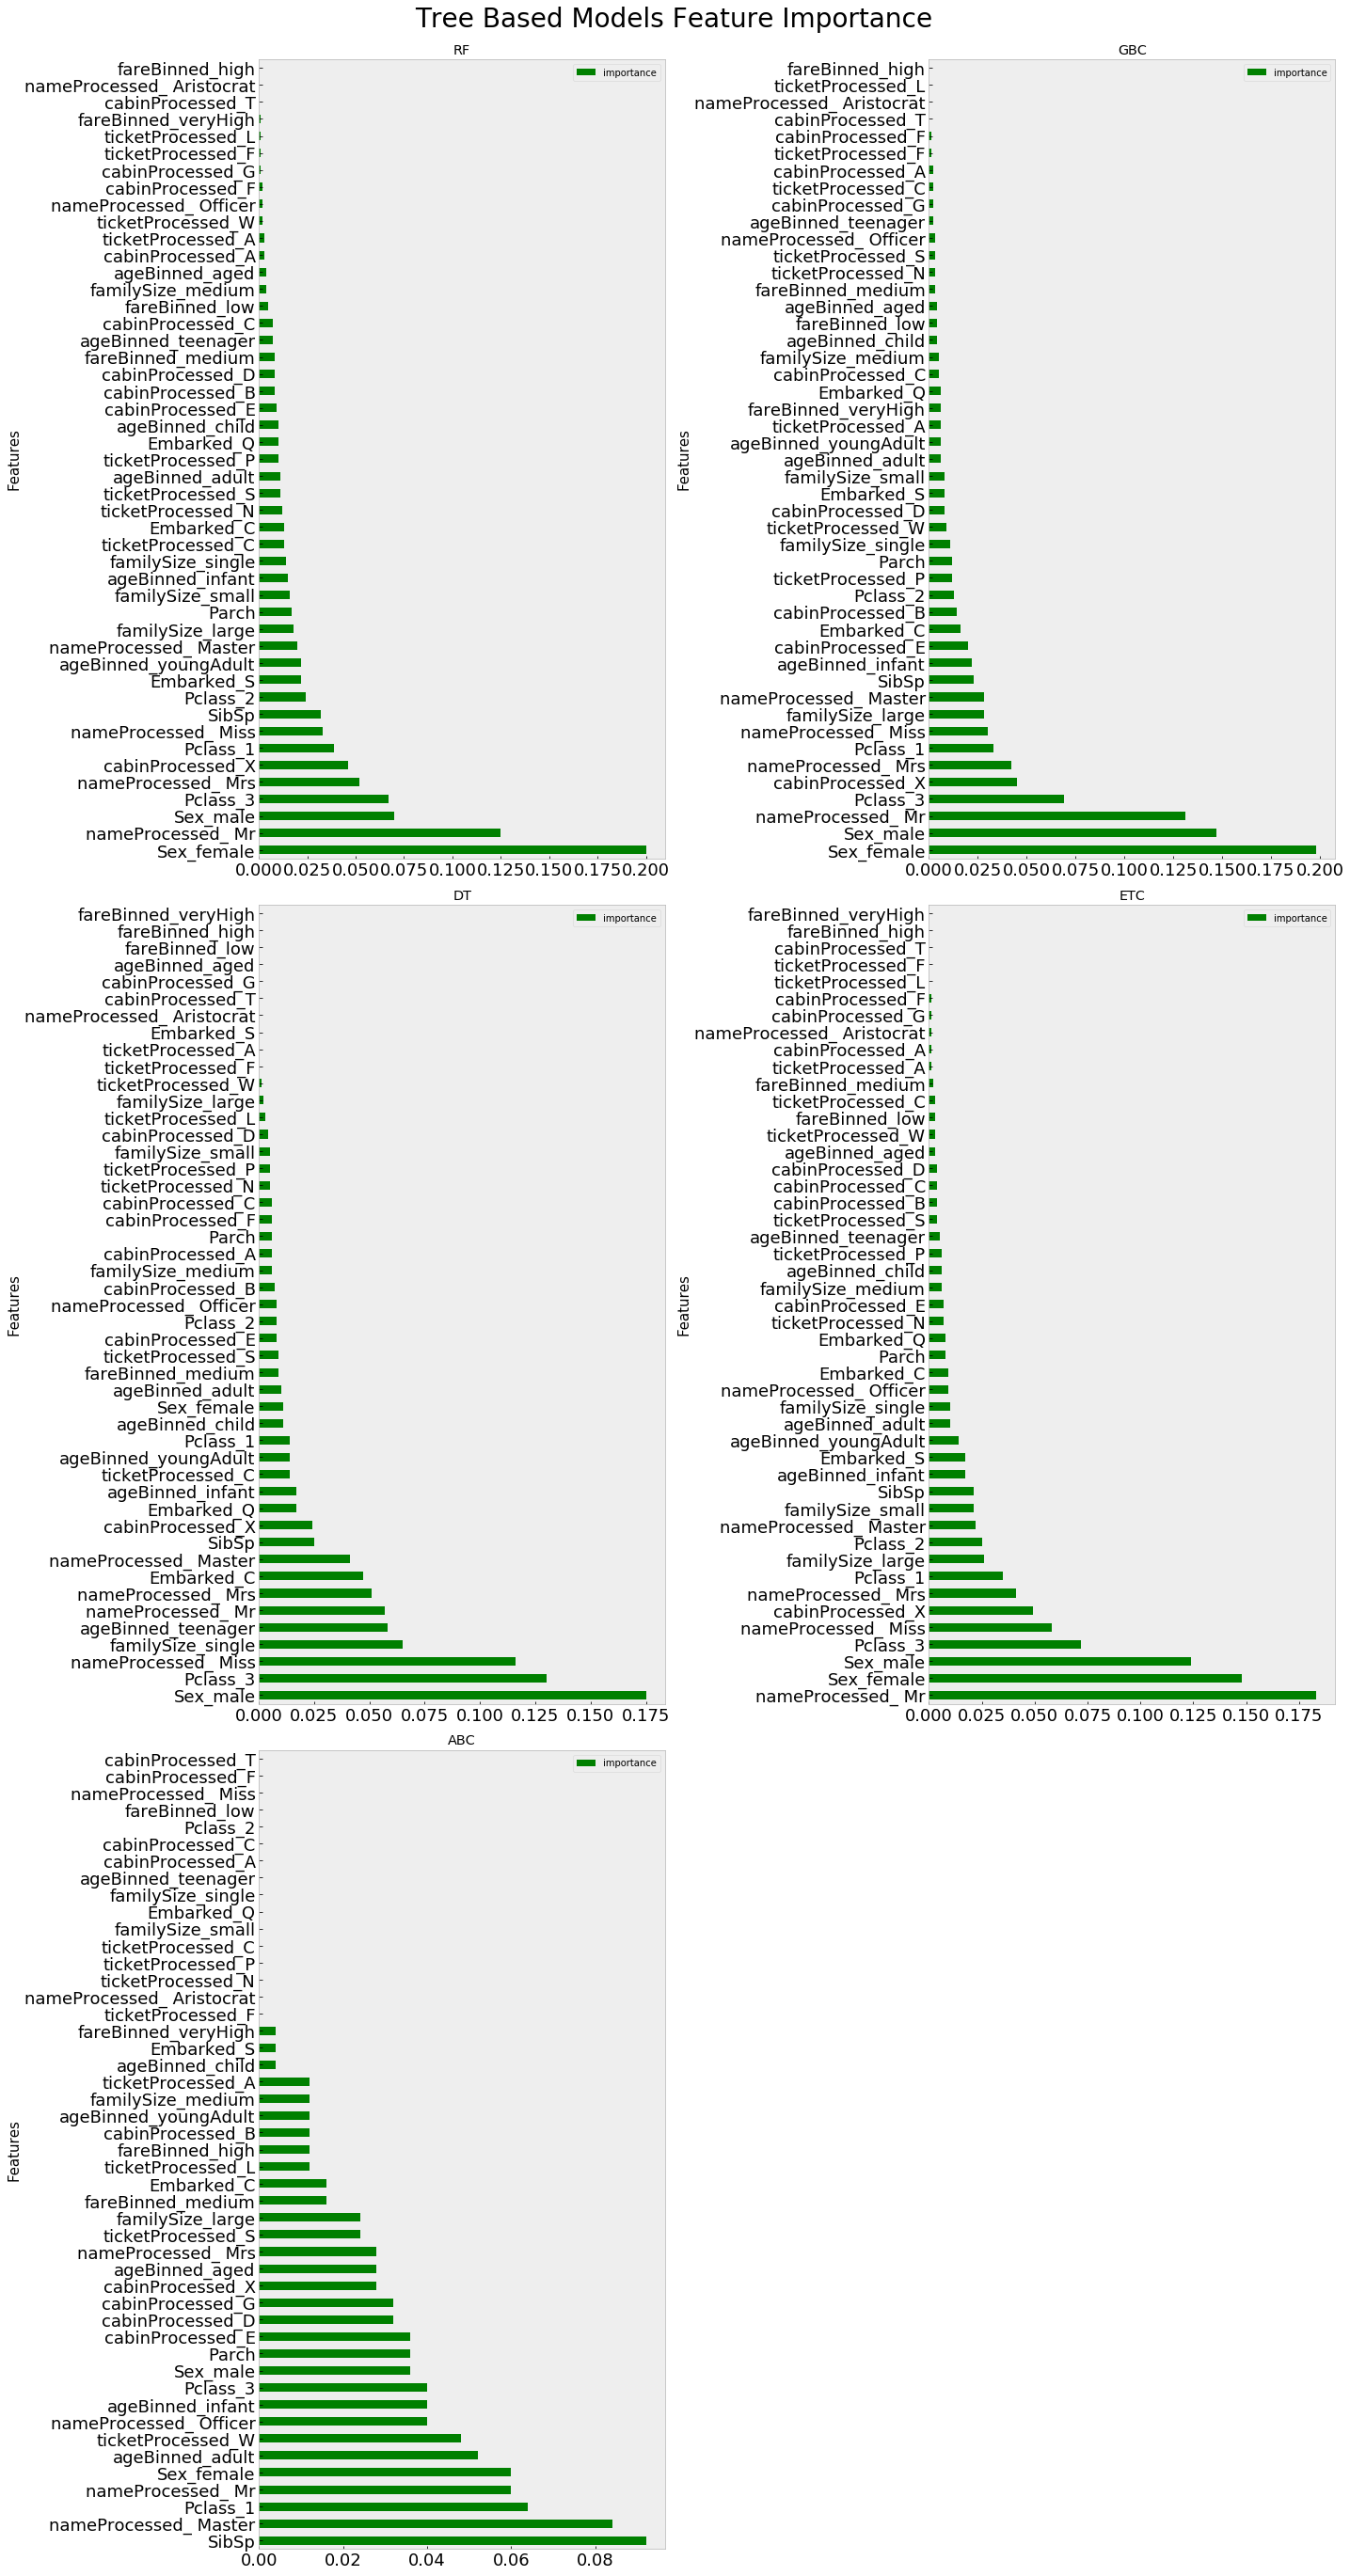

In [123]:
"""Create a function that plot feature importance by the selected tree based models."""
def plotFeatureImportance(model):
    """Return a plot of feature importance by model."""
    
    importance = pd.DataFrame({"feature": xTrain.columns,
                              "importance": np.round(model.feature_importances_,3)})
    importanceSorted = importance.sort_values(by = "importance", ascending = False).set_index("feature")
    return importanceSorted

"""Create subplots of feature impotance of rf, gbc, dt, etc, and abc."""
fig, axes = plt.subplots(3,2, figsize = (20,40))
fig.suptitle("Tree Based Models Feature Importance", fontsize = 28)
treeModels = [rf, gbc, dt, etc, abc]
treeModelNames = ["RF", "GBC", "DT", "ETC", "ABC"]
for ax, model, name in zip(axes.flatten(), treeModels, treeModelNames):
    plotFeatureImportance(model).plot.barh(ax=ax, title=name, fontsize=18, color="green")
    ax.set_ylabel("Features", fontsize = 15)
fig.delaxes(ax = axes[2,1]) # We don"t need the last subplot.
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

**Findings:** RF, DT, ETC, and ABC (in particular) give some features no importance (zero importance). On the other hand, GBC give all the features more or less importance but it doesn't give zero importance to any features. These are the tree based models that have 'feature_importances_' method by default. LR, KNN and SVC don't have this method. In this problem, SVC uses rbf kernel (only possible for linear kernel to plot feature importance), so its not possible to view feature importance given by SVC. Though its trickier, we would try to get the feature importance given by LR.

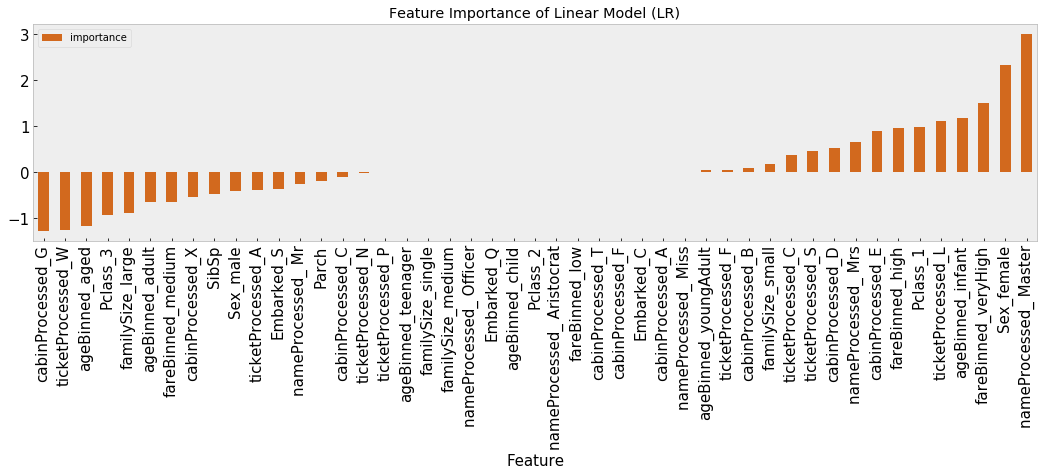

In [124]:
"""Let's plot feature importance of LR."""
fig, ax = plt.subplots(figsize=(18,4))
coeff = pd.DataFrame({"feature":xTrain.columns,
                      "importance":np.transpose(lr.coef_[0])})

coeff.sort_values(by = "importance").set_index("feature")\
.plot.bar(title = "Feature Importance of Linear Model (LR)", color="chocolate", ax=ax)
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.tick_params(axis = "both", which = "minor", labelsize = 15)
ax.set_xlabel("Feature", fontsize = 15)
plt.show()

**Findings:** We can see some negative values that means that higher value of the corresponding feature pushes the classification more towards the negative class (in our case 0) that is, of course, something we're already aware of. Some features like Family_size_single, Embarked_Q, Embarked_C, and Cabin_F were given zero importance by lr.

## 11.5 Learning Curves  <a id="11.5"></a>
Let's plot the learning curves for the optimized classifiers to see their bias-variance tradeoff.

In [125]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = xTrain, yTrain
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

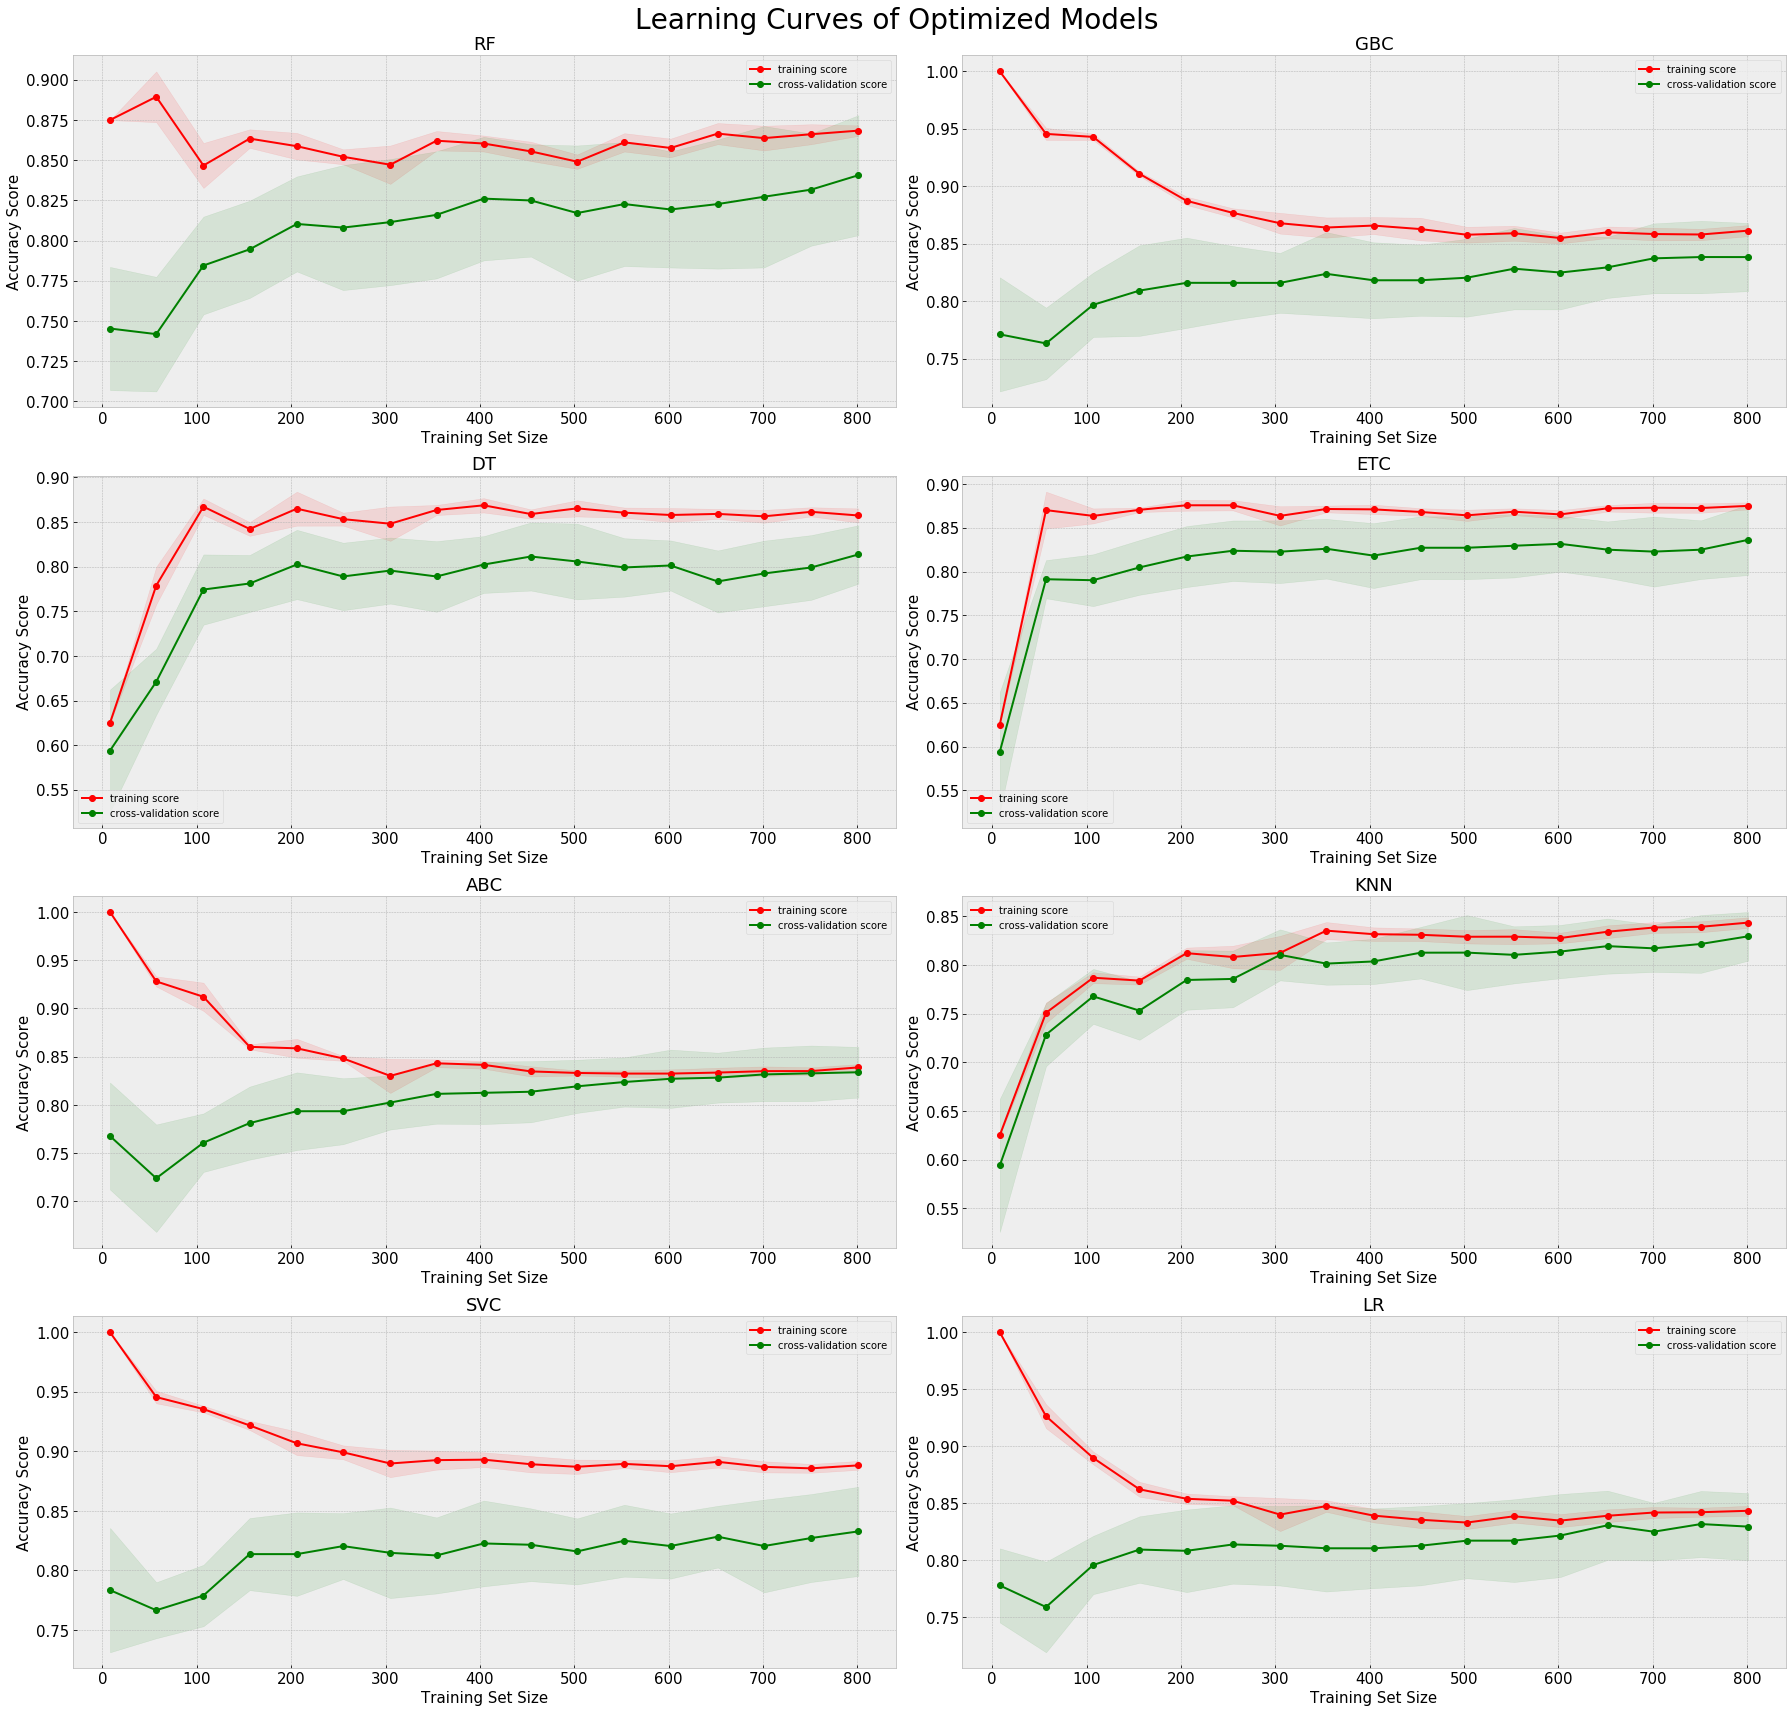

In [126]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [rf, gbc, dt, etc, abc, knn, svc, lr]
lcLabels = ["RF", "GBC", "DT", "ETC", "ABC", "KNN", "SVC", "LR"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

**Findings:**
1. RF, DT, SVC and ETC are just doing okay. Among them, SVC is doing the best in terms of bias-variance tradeoff since svc's train accuracy and cross validation accuracy are almost equal. Since training and validation curves haven't yet converged for these classifiers, adding more instances (rows) might help.

2. On the other hand, learning curve of GBC, ABC, KNN and LR indicates a little bit high bias or low variance (underfitting) and as the curves have already converged, adding more training data just might not help. Rather adding more features (columns) and increasing model's complexity might help.

# 12.More Evaluation Metrics  <a id="12"></a>
We've so far used accuracy score to evaluate our classifiers. But sometimes accuracy score isn't all enough to evaluate a classifier properly as accuracy score doesn't tell exactly which class (positive or negative) is being wrongly classified by our classifier in case of low accuracy score. **Again for imbalanced classification problem, accuracy score isn't the best metric to choose between different classifiers. To clarify this, in this section, we will calculate confusion matrix, precision score, recall score, specificity, f1 score, classification report for both random forest and gradient boosting classifier. And then we will compare our two best classifiers (rf and gbc) using these calculated metrics to see exactly where one classifier excels the other.**

## 12.1 Confusion Matrix  <a id="12.1"></a>
The confusion matrix shows the number of correct classifications along with misclassifications when a classifier make predictions for each class (positive or negative). The diagonal elements are correct classification while the off diagonal elements are misscalssifications. Some basic terms associated with confusion matrix:
1. True positives (TP): These are cases in which we predicted 1(yes), and the actual is also 1(yes).
2. True negatives (TN): We predicted 0(no), and the actual is also 0(no).
3. False positives (FP): We predicted 1(yes), but the actual is 0(no). (Also known as a "Type I error.")
4. False negatives (FN): We predicted 0(no), but the actual is 1(yes). (Also known as a "Type II error.")

In [127]:
"""Return prediction to use it in another function."""
def xValPredict(model):
    """Returns prediction by which we can calculate different classification metrices."""
    
    predicted = cross_val_predict(model, xTrain, yTrain, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

"""Function to return confusion matrix."""
def calculateConfusionMatrix(model):
    """returns a models confusion matrix"""
    
    predicted = xValPredict(model)
    confusionMatrix = pd.crosstab(yTrain, predicted, rownames = ["Actual"],
                                   colnames = ["Predicted/Classified"], margins = True)
    return display(confusionMatrix)

"""Now calculate confusion matrix of rf and gbc."""
bold("RF Confusion Matrix:")
calculateConfusionMatrix(rf)
bold("GBC Confusion Matrix:")
calculateConfusionMatrix(gbc)

**RF Confusion Matrix:**

Predicted/Classified,0,1,All
Actual,,,
0,510,39,549
1,100,242,342
All,610,281,891


**GBC Confusion Matrix:**

Predicted/Classified,0,1,All
Actual,,,
0,489,60,549
1,83,259,342
All,572,319,891


The 1st row of our confusion matrix( or sometimes called error matrix) is about the negative class (because of 0 and hence non-survived) and The 2nd row of our confusion matrix( or sometimes called error matrix) is about the positive class (because of 1 and hence survived).

For rf, passengers correctly classified as survived are 243 (true positives) and passengers correctly classified as non-survived (died) are 506(true negatives). While 43 passengers (false positives) from class 0 (non-survived) were misclassified as survived and 99 (false negatives) passengers who actually survived were classified as non-survived.

And for gbc, passengers correctly classified as survived are 248(true positives) and passengers correctly classified as non-survived (died) are 501(true negatives). While 48 (false positives) passengers from class 0 (non-survived) were misclassified as survived and 94 (false negatives) passengers who actually survived were misclassified as non-survived.

**RF (749) makes exactly same correct predictions (true positives+true negatives) as gbc (749), hence rf and gbc have exactly same accuracy score that we saw when we calculated both model's accuracy score.**

## 12.2 Precision Score  <a id="12.2"></a>
Precision is the ratio of true positive to total predicted positive(true positive + false positive). So precision score tells how many true positives our model can capture out of total predicted positives.

In [128]:
"""Function to calculate precision score."""
def calculatePrecisionScore(model):
    """Calculates a model's precision score."""
    
    predicted = xValPredict(model)
    precisionScore = precision_score(yTrain, predicted)
    return round(precisionScore*100, 2)

"""Compute precision score for rf and gbc."""
print(f"RF  Precision Score: {calculatePrecisionScore(rf)}")
print(f"GBC Precision Score: {calculatePrecisionScore(gbc)}")

RF  Precision Score: 86.12
GBC Precision Score: 81.19


**RF's precision score tells when it predicts a passenger as a survivor (=class1), it is correct nearly 85% of the time. And gbc's precision score tells when gbc predicts a passenger as a survivor, it is correct nearly 84% of the time. So rf has a better precision score than gbc.**

## 12.3 Recall (or Sensitivity or True Positive Rate)  <a id="12.3"></a>
Recall is the ratio of true positive to total actual positive(true positive + false negative). So recall score basically calculates true positives from total actual positives.

In [129]:
"""Function to calculate recall score."""
def calculateRecallScore(model):
    """Calculate a model's recall score."""
    
    predicted = xValPredict(model)
    recallScore = recall_score(yTrain, predicted)
    return round(recallScore*100, 2)

"""Compute recall score for rf and gbc."""
print(f"RF  Recall Score: {calculateRecallScore(rf)}")
print(f"GBC Recall Score: {calculateRecallScore(gbc)}")

RF  Recall Score: 70.76
GBC Recall Score: 75.73


**RF's recall score tells it correctly identifies over 71% of all the survivors. Or put another way, it predicts over 71.5% of the survivors as a survivor. On the other hand, gbc predicts just over 72.5% of the survivors as survivor. So gbc is more capable of capturing true positives than rf that we also observed from confusion matrix.**

## 12.4 Specificity ( or True Negative Rate)  <a id="12.4"></a>
Specificity is the ratio of true negative to total actual negative(true negative + false positive). Specificity  is exactly the opposite of recall. So specificity score basically calculates true negatives from total actual negatives.

In [130]:
"""Function for specificity score."""
def calculateSpecificityScore(model):
    """Returns a model's specificity score."""
    
    predicted = xValPredict(model)
    tn, fp, fn, tp = confusion_matrix(yTrain, predicted).ravel()
    specificityScore = tn / (tn + fp)
    return round(specificityScore*100, 2)

"""Calculate specificity score for rf and gbc."""
print(f"RF  Specificity Score: {calculateSpecificityScore(rf)}")
print(f"GBC Specificity Score: {calculateSpecificityScore(gbc)}")

RF  Specificity Score: 92.9
GBC Specificity Score: 89.07


**RF's specificity score indicates it correctly predicts over 92% of the victims as a victim. Comparing recall score with specificity, it looks like our rf model is more accurate on predicting negative class (victims = 0) than predicting positive class (survivors = 1).**

**While  gbc's specificity score indicates it correctly predicts over 91% of the victims as a victim. Comparing recall score with specificity, it looks like our gbc also is more accurate on predicting negative class (victims = 0) than predicting positive class (survivors = 1).**

**Interesting! RF is better than capturing true negatives than gbc. So if we were to choose a model between rf and gbc where our priority is the negative class (0), we would choose rf. And if our priority is positive class(1), we would choose gbc.**

## 12.5 F1 Score  <a id="12.5"></a>
We can't choose classifiers solely depending on their precision or recall score. Rather we need to consider both to find out the best classifiers. Here comes the f1 score which is  the balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the f1 score is, the better.

In [131]:
"""Function for F1 score."""
def calculateF1Score(model):
    """Returns a model's f1 score."""
    
    predicted = xValPredict(model)
    f1Score = f1_score(yTrain, predicted)
    return round(f1Score*100, 2)

"""Calculate f1 score for rf and gbc."""
print(f"RF  F1 Score: {calculateF1Score(rf)}")
print(f"GBC F1 Score: {calculateF1Score(gbc)}")

RF  F1 Score: 77.69
GBC F1 Score: 78.37


**Looks like gbc is better than rf in terms of f1 score.**
## 12.6 Classification Report  <a id="12.6"></a>
Precision, recall, and f1 score is only associated with true positives. But what if we want to measure true negatives? We can measure them with true positives and count of each class (0 and 1) in  a classification report. It provides precision, recall, f1 score and class count altogether for both classs (0 and 1) but at the cost of less hassle.

In [132]:
"""Function to compute classification report."""
def calculateClassificationReport(model):
    """Returns a model"s classification report."""
    
    predicted = xValPredict(model)
    classificationReport = classification_report(yTrain, predicted)
    return print(classificationReport)

"""Now calculate classification report for rf and gbc."""
bold("RF Classification Report:")
calculateClassificationReport(rf)
bold("GBC Classification Report:")
calculateClassificationReport(gbc)

**RF Classification Report:**

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       549
           1       0.86      0.71      0.78       342

    accuracy                           0.84       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.84      0.84       891



**GBC Classification Report:**

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.81      0.76      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



**We can see precision, recall, f1 score and class count for both class (0 and 1) of our two models.**
## 12.7 Precision-Recall vs Threshold Curve  <a id="12.7"></a>
Sometimes we want a high precision and sometimes a high recall depending on our classification problem. The thing is that an increasing precision results in a decreasing recall and vice versa. This is called the precision-recall tradeoff that can be illustrated using precision-recall curve as a function of the decision threshold.

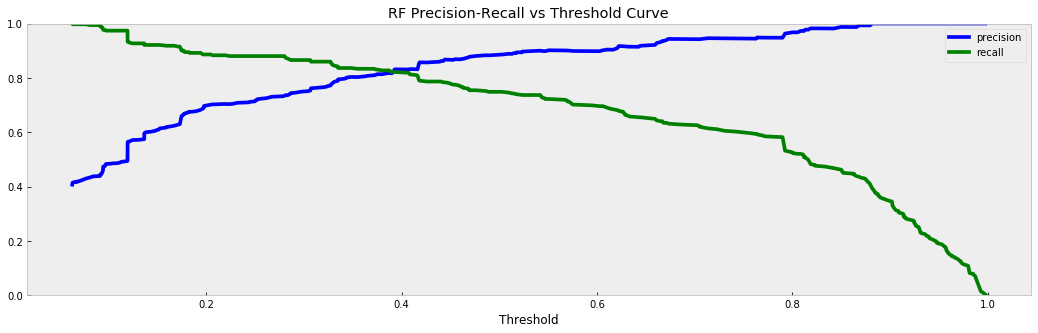

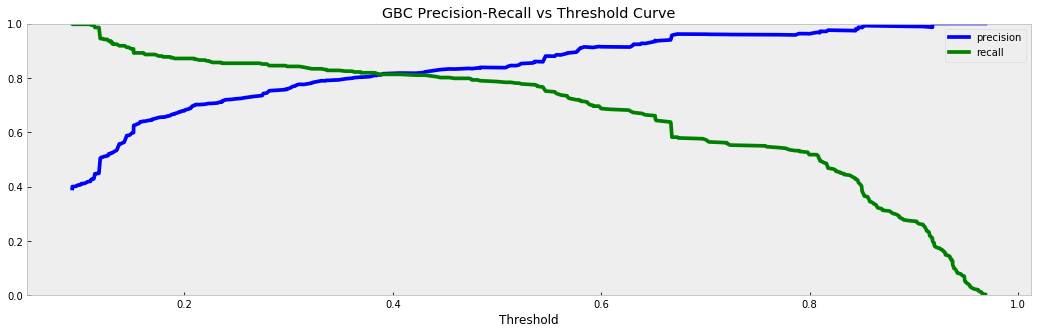

In [133]:
"""Function for plotting precision-recall vs threshold curve."""
def plotPrecisionRecallVsThresholdCurve(model, title):
    """Plots precision-recall vs threshold curve for a model."""

    probablity = model.predict_proba(xTrain)[:, 1]
    plt.figure(figsize = (18, 5))
    precision, recall, threshold = precision_recall_curve(yTrain, probablity)
    plt.plot(threshold, precision[:-1], "b-", label = "precision", lw = 3.7)
    plt.plot(threshold, recall[:-1], "g", label = "recall", lw = 3.7)
    plt.xlabel("Threshold")
    plt.legend(loc = "best")
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()

"""Now plot precision-recall vs threshold curve for rf and gbc."""
plotPrecisionRecallVsThresholdCurve(rf, title = "RF Precision-Recall vs Threshold Curve" )
plotPrecisionRecallVsThresholdCurve(gbc, title = "GBC Precision-Recall vs Threshold Curve")

**We can see for RF, the recall falls quickly at a precision of around 84%. So therefore, we need to select the precision-recall tradeoff before 84% of precision which could be at around 82%. Now, for example, if we want a precision of 80% off RF we would need a threshold of around 0.4**

**On the other hand, for GBC, the recall falls fast at a precision of around 84% and hence we would select precision-recall tradeoff at around 80% of precision. If we want a precision of around 81% off GBC, we would need a threshold of around 0.38**

## 12.8 Precision-Recall Curve  <a id="12.8"></a>
We can also plot precision against recall to get an idea of precision-recall tradeoff where y-axis represents precision and x-axis represents recall. In my plot, I plot recall on y-axis and precision on x-axis.

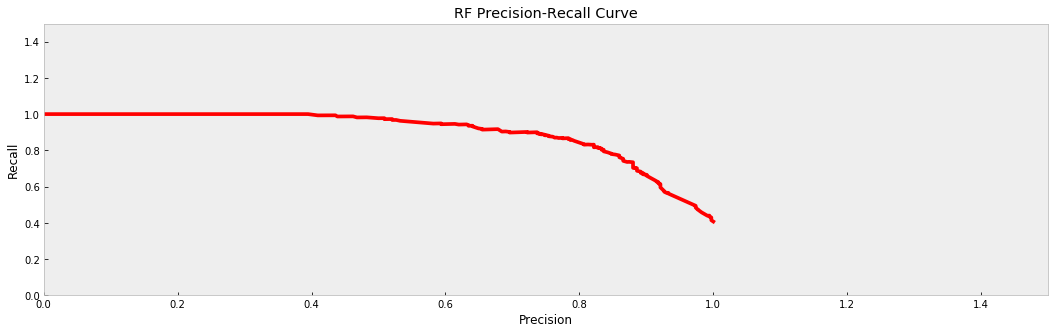

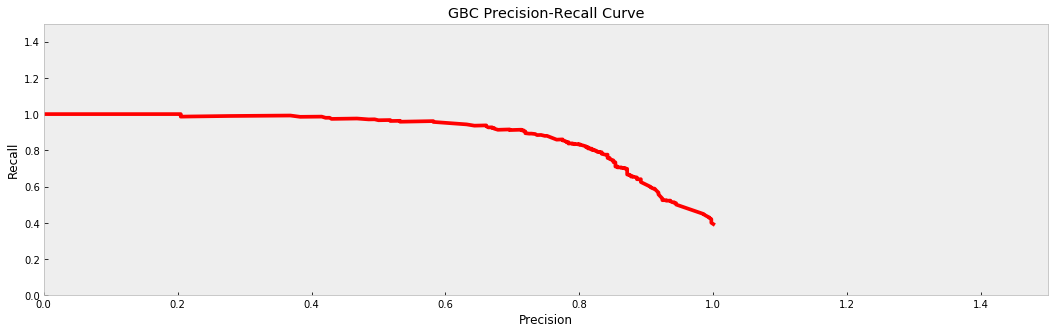

In [134]:
"""Function to plot recall vs precision curve."""
def plotPrecisionVsRecallCurve(model, title):
    """Return amodel's recall vs precision curve."""
    
    probablity = model.predict_proba(xTrain)[:, 1]
    plt.figure(figsize = (18, 5))
    precision, recall, threshold = precision_recall_curve(yTrain, probablity)
    plt.plot(recall, precision, "r-", lw = 3.7)
    plt.ylabel("Recall")
    plt.xlabel("Precision")
    plt.axis([0, 1.5, 0, 1.5])
    plt.title(title)
    plt.show()

"""Now plot recall vs precision curve of rf and gbc."""
plotPrecisionVsRecallCurve(rf, title = "RF Precision-Recall Curve")
plotPrecisionVsRecallCurve(gbc, title = "GBC Precision-Recall Curve")

**We can see recall falls rapidly at around a precision of 0.84 for both RF and 0.82 for GBC that we've observed in the previous section.**

## 12.9 ROC  Curve & AUC Score  <a id="12.9"></a>
ROC (Reicever Operating Characteristic Curve) is a plot of the true positive rate against the false positive rate of a classifier. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). AUC (Area under the ROC Curve) score is the corresponding score to the AUC Curve. It is simply computed by measuring the area under the ROC curve, which is called AUC. We will plot ROC curve and AUC score together for our two classifiers.

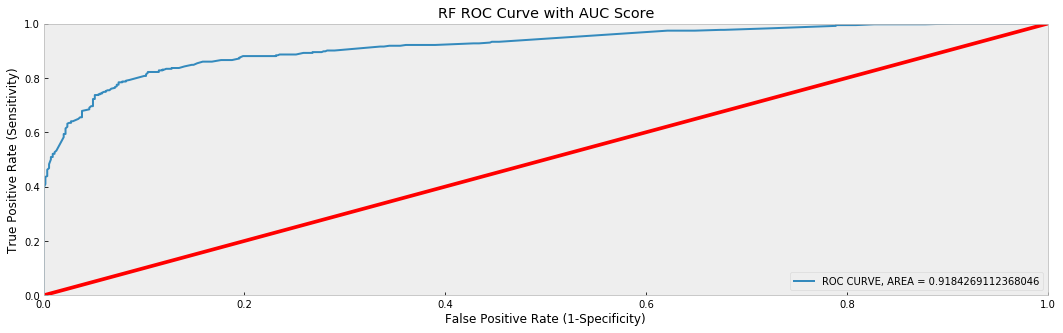

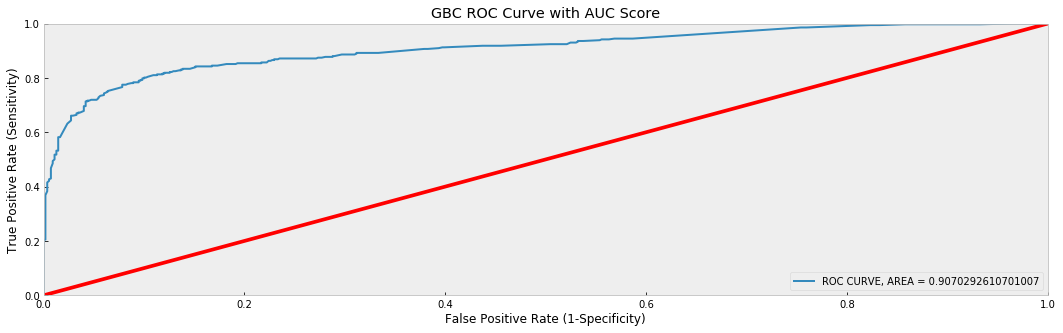

In [135]:
"""Function to plot ROC curve with AUC score."""
def plotRocAndAucScore(model, title):
    """Returns roc and auc score of a model."""
    
    probablity = model.predict_proba(xTrain)[:, 1]
    plt.figure(figsize = (18, 5))
    false_positive_rate, true_positive_rate, threshold = roc_curve(yTrain, probablity)
    auc_score = roc_auc_score(yTrain, probablity)
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], "red", lw = 3.7)
    plt.xlabel("False Positive Rate (1-Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

"""Plot roc curve and auc score for rf and gbc."""
plotRocAndAucScore(rf, title = "RF ROC Curve with AUC Score")
plotRocAndAucScore(gbc, title = "GBC ROC Curve with AUC Score")

This two plots tells few different things:

1. A model that predicts at chance will have an ROC curve that looks like the diagonal red line. That is not a discriminating model.

2. The further the curve is off the diagonal red line, the better the model is at discriminating between positives and negatives in general.

3. There are useful statistics that can be calculated from this curve, like the Area Under the Curve (AUC). This tells you how well the model predicts and the optimal cut point for any given model (under specific circumstances).

**Comparing the two ROC curves, we can see the distance between blue and red line of RF is greater than the distance between blue and red line of GBC. Hence it can safely be said that RF, in general, is better at discriminating between positives and negatives than GBC. Also RF(92.11%) auc score (which is the area under the roc curve) is greater than gbc(91.94%). It seems the higher the area, the further the classifier is off the red diagonal line and vice versa and hence more accurate. Since RF has more area under the ROC curve than GBC, RF is more accurate.**

# 13.Prediction & Submission  <a id="13"></a>
First we will predict using both rf and gbc. Then we will create two prediction files in csv format for kaggle submission.

In [136]:
"""Submission with the most accurate random forest classifier."""
submissionRF = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": rf.predict(xTest)})
submissionRF.to_csv("rfSubmission.csv", index = False)


"""Submission with the most accurate gradient boosting classifier."""
submissionGBC = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": gbc.predict(xTest)})
submissionGBC.to_csv("gbcSubmission.csv", index = False)

**Though both RF and GBC have the identical validation accuracy (in our case optimized accuracy ~0.8406), RF scored 0.79425 while GBC scored 0.78468 on kaggle leaderboard. The fact that gbc's accuracy on the holdout data is 0.78468 compared with the 0.8406 accuracy we got with cross-validation indicates that GBC underfits the training data that we obsetved from the learning curve (see part 11.7). Hence it performs poorly on kaggle hold out set compared to RF.**

### Can we further improve our classifiers' accuracy? May be we can! In the next few section, we will try to improve our models' accuracy with the help of ensemble method.

# 14.Introduction to Ensemble <a id="14"></a>
Can we further boost the accuracy of our best models? That's what we will try to do using ensemble method. Ensembles combine predictions from different models to generate a final prediction, and the more models we include the better it performs. Better still, because ensembles combine baseline predictions, they perform at least as well as the best baseline model. Most of the errors from a model’s learning are from three main factors: variance, noise, and bias. By using ensemble methods, we’re able to increase the stability of the final model and reduce the errors caused by bias, variance, and noise. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source. **The main principle behind ensemble modelling is to group weak learners together to form one strong learner. The most basic ensemble is majority voting rule (where the prediction or vote given by the majority of the models used as final prediction).But there are many other ways to combine predictions, and more generally we can use a model to learn how to best combine predictions.**

**To implement an ensemble we need three basic things:**
1. A group of base learners that generate predictions.
2. A meta learner that learns how to best combine these predictions outputed by base learners.
3. And finally a method for splitting the training data between the base learners and the meta learner.

**An ensemble works best if:**
1. There is a less correlation in the base models' predictions.
2. We increase the number of base learners though it might slow the process down.


## 14.1 Different Ensemble Methods
We would first categorize ensemble methods into two subcategories like 1.Simple Ensemble Methods and 2.Advanced Ensemble Methods

### 14.1.1 Simple Ensemble Methods
They're the simpliest yet so useful form of enselbles. They can be further categorised into 
1. Voting, 
2. Averaging and 
3. Weighted Average. 

First one is usually used for classification while the later two are used for regression problems.

#### 14.1.1.1 Voting Ensemble  
Voting ensemble is further classified into 
1. Hard voting and 
2. Soft voting.

##### 14.1.1.1.1 Hard Voting (or Majority Voting or Max Voting) <a id="14.1"></a>
This hard voting method is usually used for classification problems. The idea is to train multiple models to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction. Say rf and lr predict a class as 1 while knn predicts the same class as 0. Since the majority of the vots is casted in favour of class 1, the voting classifier would predict the very same class as 1. See the table below to understand how hard voting ensemble works.

In [137]:
bold("How hard voting works:")
data = [[1, 1, 1, 0, 1], 
        [0, 0, 0, 1, 0]]
display(pd.DataFrame(data, columns= ["Class","RF", "LR", "KNN", "Hard_voting"]).set_index("Class"))

**How hard voting works:**

,RF,LR,KNN,Hard_voting
Class,,,,
1,1,1,0,1
0,0,0,1,0


**Correlation among Base Models Predictions:** How base models' predictions are correlated? If base models' predictions are weakly correlated with each other, the ensemble will likely to perform better. On the other hand, for a strong correlation of predictions among the base models, the ensemble will unlikely to perform better. To sumarize, diversity of predictions among the base models is inversely proportional to the ensemble accuracy. Let's make prediction for the test set.

**All the Base Models Prediction:**

,RF,GBC,ABC,ETC,DT,SVC,KNN,LR
0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1


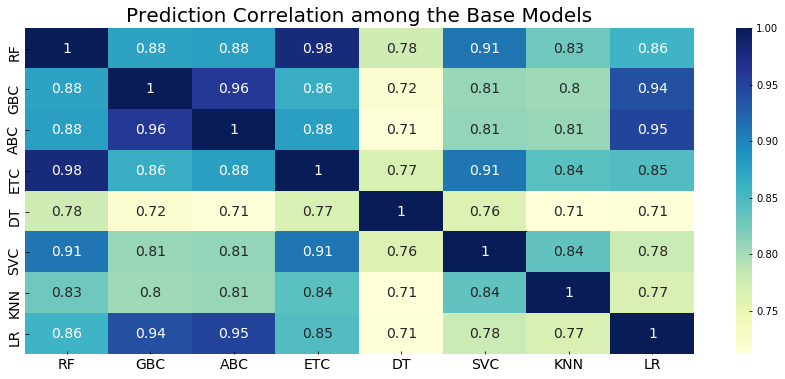

In [138]:
"""Create a data frame to store base models prediction.
First 5 in the dataframe are tree based models. Then two are kernel based. 
And the last is a linear model."""
basePrediction = modelPrediction # We"ve a df of all the models prediction.

"""Let"s see how each model classifies a prticular class."""
bold("All the Base Models Prediction:")
display(basePrediction.head())

"""Let"s visualize the correlations among the predictions of base models."""
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(basePrediction.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Prediction Correlation among the Base Models", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()

**Findings:** The prediction looks quite similar for the 8 classifiers except when DT is compared to the others classifiers. Now we will create an ensemble with the base models RF, GBC, DT, KNN and LR. This ensemble can be called heterogeneous ensemble since we have three tree based, one kernel based and one linear models. We would use **EnsembleVotingClassifier method from mlxtend module** for both hard and soft voting ensembles. The advantage is it requires lesser codes to plot decision regions and I find it a bit faster than sklearn's voting classifier.

In [139]:
"""We will use mlxtend library to train, predict and plot decision regions of hard voting ensemble classifier."""
"""Define base models for hard voting ensemble."""
baseModels = [rf, gbc, dt, knn, lr]

"""Initialize hard voting ensemble."""
hardVct = EnsembleVoteClassifier(clfs = baseModels, voting="hard")
print("Training Hard Voting Ensemble Classifier...")
display(hardVct.fit(xTrain, yTrain))
print("Done.")

"""Predict with hard voting ensemble."""
yPredHardVct = pd.DataFrame(hardVct.predict(xTest), columns = ["hardVct"])

"""Hard voting cross validation score."""
print("\nComputing Hard Voting Cross Val Score...")
hardXValScore = cross_val_score(hardVct, xTrain, yTrain, cv = 10, scoring = "accuracy")
hardXValScore = round(hardXValScore.mean()*100, 2)
print("Done.")

"""Our tunned scores"""
tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0]

"""Compare hard voting score with best base models scores."""
hardVctVsBaseScore = pd.DataFrame({"hardVsBaseScore(%)": [hardXValScore,
                                                          tunedScore["RF"],
                                                          tunedScore["GBC"], 
                                                          tunedScore["DT"],
                                                          tunedScore["KNN"], 
                                                          tunedScore["LR"]]
                                  })

"""So basically we"re comparing hard voting x_val_score with base models"s tunned score."""
hardVctVsBaseScore.index = ["hardVct", "RF", "GBC", "DT", "KNN", "LR"]
bold("Hard Voting vs Base Models Scores:")
display(hardVctVsBaseScore)

Training Hard Voting Ensemble Classifier...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



EnsembleVoteClassifier(clfs=[RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=6,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=15,
                                                    n_jobs=None,
                                                    oob_s

Done.

Computing Hard Voting Cross Val Score...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

Done.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



**Hard Voting vs Base Models Scores:**

,hardVsBaseScore(%)
hardVct,84.63
RF,84.40
GBC,83.95
DT,81.37
KNN,82.94
LR,82.94


**Findings:** We can see Hard voting classifier uses RF as meta learner for this problem that beats the best base learners (rf and gbc) by some margin. So we may want to further investigate how hard voting is using its decision boundary to excel our best base learners. Let's visualize the decision regions of hard voting classifier with base classifiers.

**Now we have a new challenge. In machine learning, visualizing 2 or 3 dimensional data is not that challenging. But we have 47 dimensions (47 input features). That's way too much to visualize. So we need to reduce the dimensionality- may be into 2 or 3 dimensionality. That's where PCA comes into play.**

### **Introduction to Principal Component Analysis (PCA) <a id="14.2"></a>
The main goal of a PCA analysis is to identify patterns in data. PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information. PCA is very useful in the following two cases:
1. When the training process takes too long due to large input dimension of training data.
2. Reducing dimensions, it make data visualization a breeze.

PCA is often effected if your input features have different ranges. So to make PCA work better we shoud scale the input features. We would use sklearn's StandardScaler to standarize our input features. The idea behind StandardScaler is that it will transform our data such that its distribution will have a mean value 0 and standard deviation of 1. **If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.**

**Now let's perform standarization and then PCA to plot decision regions of different trained classifiers.**

In [140]:
"""Perform Standarization:
Variables have very different ranges (diffenence between max and  min).
The purpose of standarization is to reduce the dispersion of these variables."""

"""Initialize standard scaler object."""
stdScaler = StandardScaler()
"""Fit standard scaler object to train data."""
stdScaler.fit(xTrain)
"""Apply the standard scaler to training set."""
xTrainScaled = stdScaler.transform(xTrain)


"""Perform PCA:"""
"""Initialize pca object with two components. i.e., converting into 2d from 47d."""
pca = PCA(n_components = 2) # Projection to 2d from 47d
"""Fit pca to scaled data."""
pca.fit(xTrainScaled)
"""Apply pca to scaled data."""
pcaTrain = pca.transform(xTrainScaled)
"""Create a data frame consisting of two pca."""
trainPca = pd.DataFrame(data = pcaTrain, columns = ["pca-1", "pca-2"])
bold("Projection to 2D from 47D:")
display(trainPca.head())

"""let"s merge our two pca components with our target feature."""
finalDf = pd.concat([trainPca, yTrain], axis = 1)
bold("Target with 2-PCA Components:")
display(finalDf.head())

**Projection to 2D from 47D:**

,pca-1,pca-2
0,-1.864392,0.350562
1,5.210965,-2.822320
2,-0.351195,1.056633
3,3.273593,-0.823716
4,-2.557838,-0.168374


**Target with 2-PCA Components:**

,pca-1,pca-2,Survived
0,-1.864392,0.350562,0
1,5.210965,-2.822320,1
2,-0.351195,1.056633,1
3,3.273593,-0.823716,1
4,-2.557838,-0.168374,0


**So there we have it! We're down to 2 features only from 47 features. Now we want to calculate how much variance we're able to extract off these 2 components.**

In [141]:
"""Now calculate how much variance we get off these two components."""
bold("Total Variance Explained by 2 PCA Components:")
display(round((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100, 2))

**Total Variance Explained by 2 PCA Components:**

19.9

**Not so much! But considering the number of features we have, its not either too less. Let's visualize our two components (transformed features) in a scatter plot.**

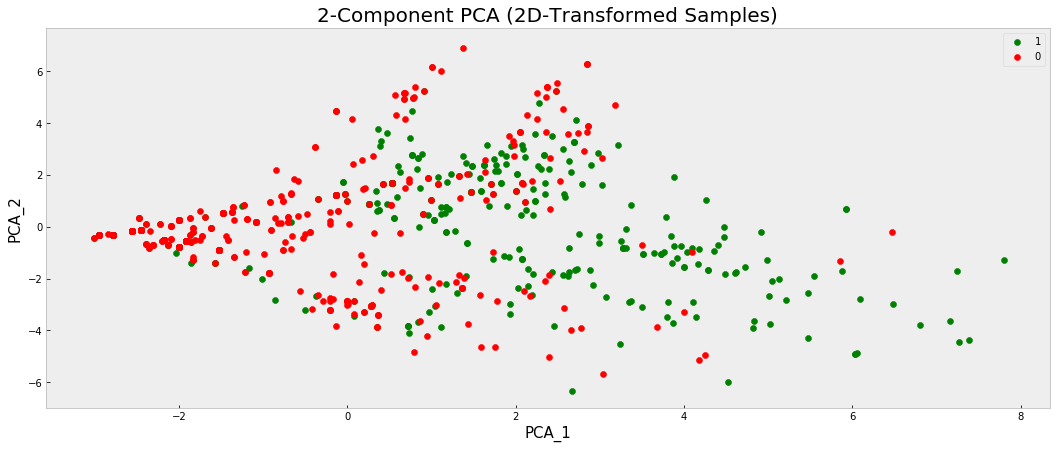

In [142]:
"""Visualize our newly transformed samples with class labels."""
fig,ax = plt.subplots(1,1, figsize = (18,7))
ax.set_xlabel("PCA_1", fontsize = 15)
ax.set_ylabel("PCA_2", fontsize = 15)
ax.set_title("2-Component PCA (2D-Transformed Samples)", fontsize = 20)
targets = [1, 0]
colors = ["g", "r"]
for target, color in zip(targets,colors):
    indices = finalDf["Survived"] == target
    ax.scatter(finalDf.loc[indices, "pca-1"],
               finalDf.loc[indices, "pca-2"],
               c = color, s = 37)
plt.legend(targets)
plt.show()

**Looking at this plot, one thing we can say that a linear decision boundary will not be a good choice to separate these two classes. Now we would train our models on this 2d transformed samples to visualize decision regions created by them.**

**Note:** PCA gives you an intuition if a linear or non-linear algorithms would be suitable for a problem. For example, if we look at the scatter plot, we see a non-linear trend between the two class that is, of course better seperable by a non-linear decision boundary. So a non-linear model would be a better bet than a linear one. That's why rf(non-linear) performs better than lr(linear model) for this problem.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



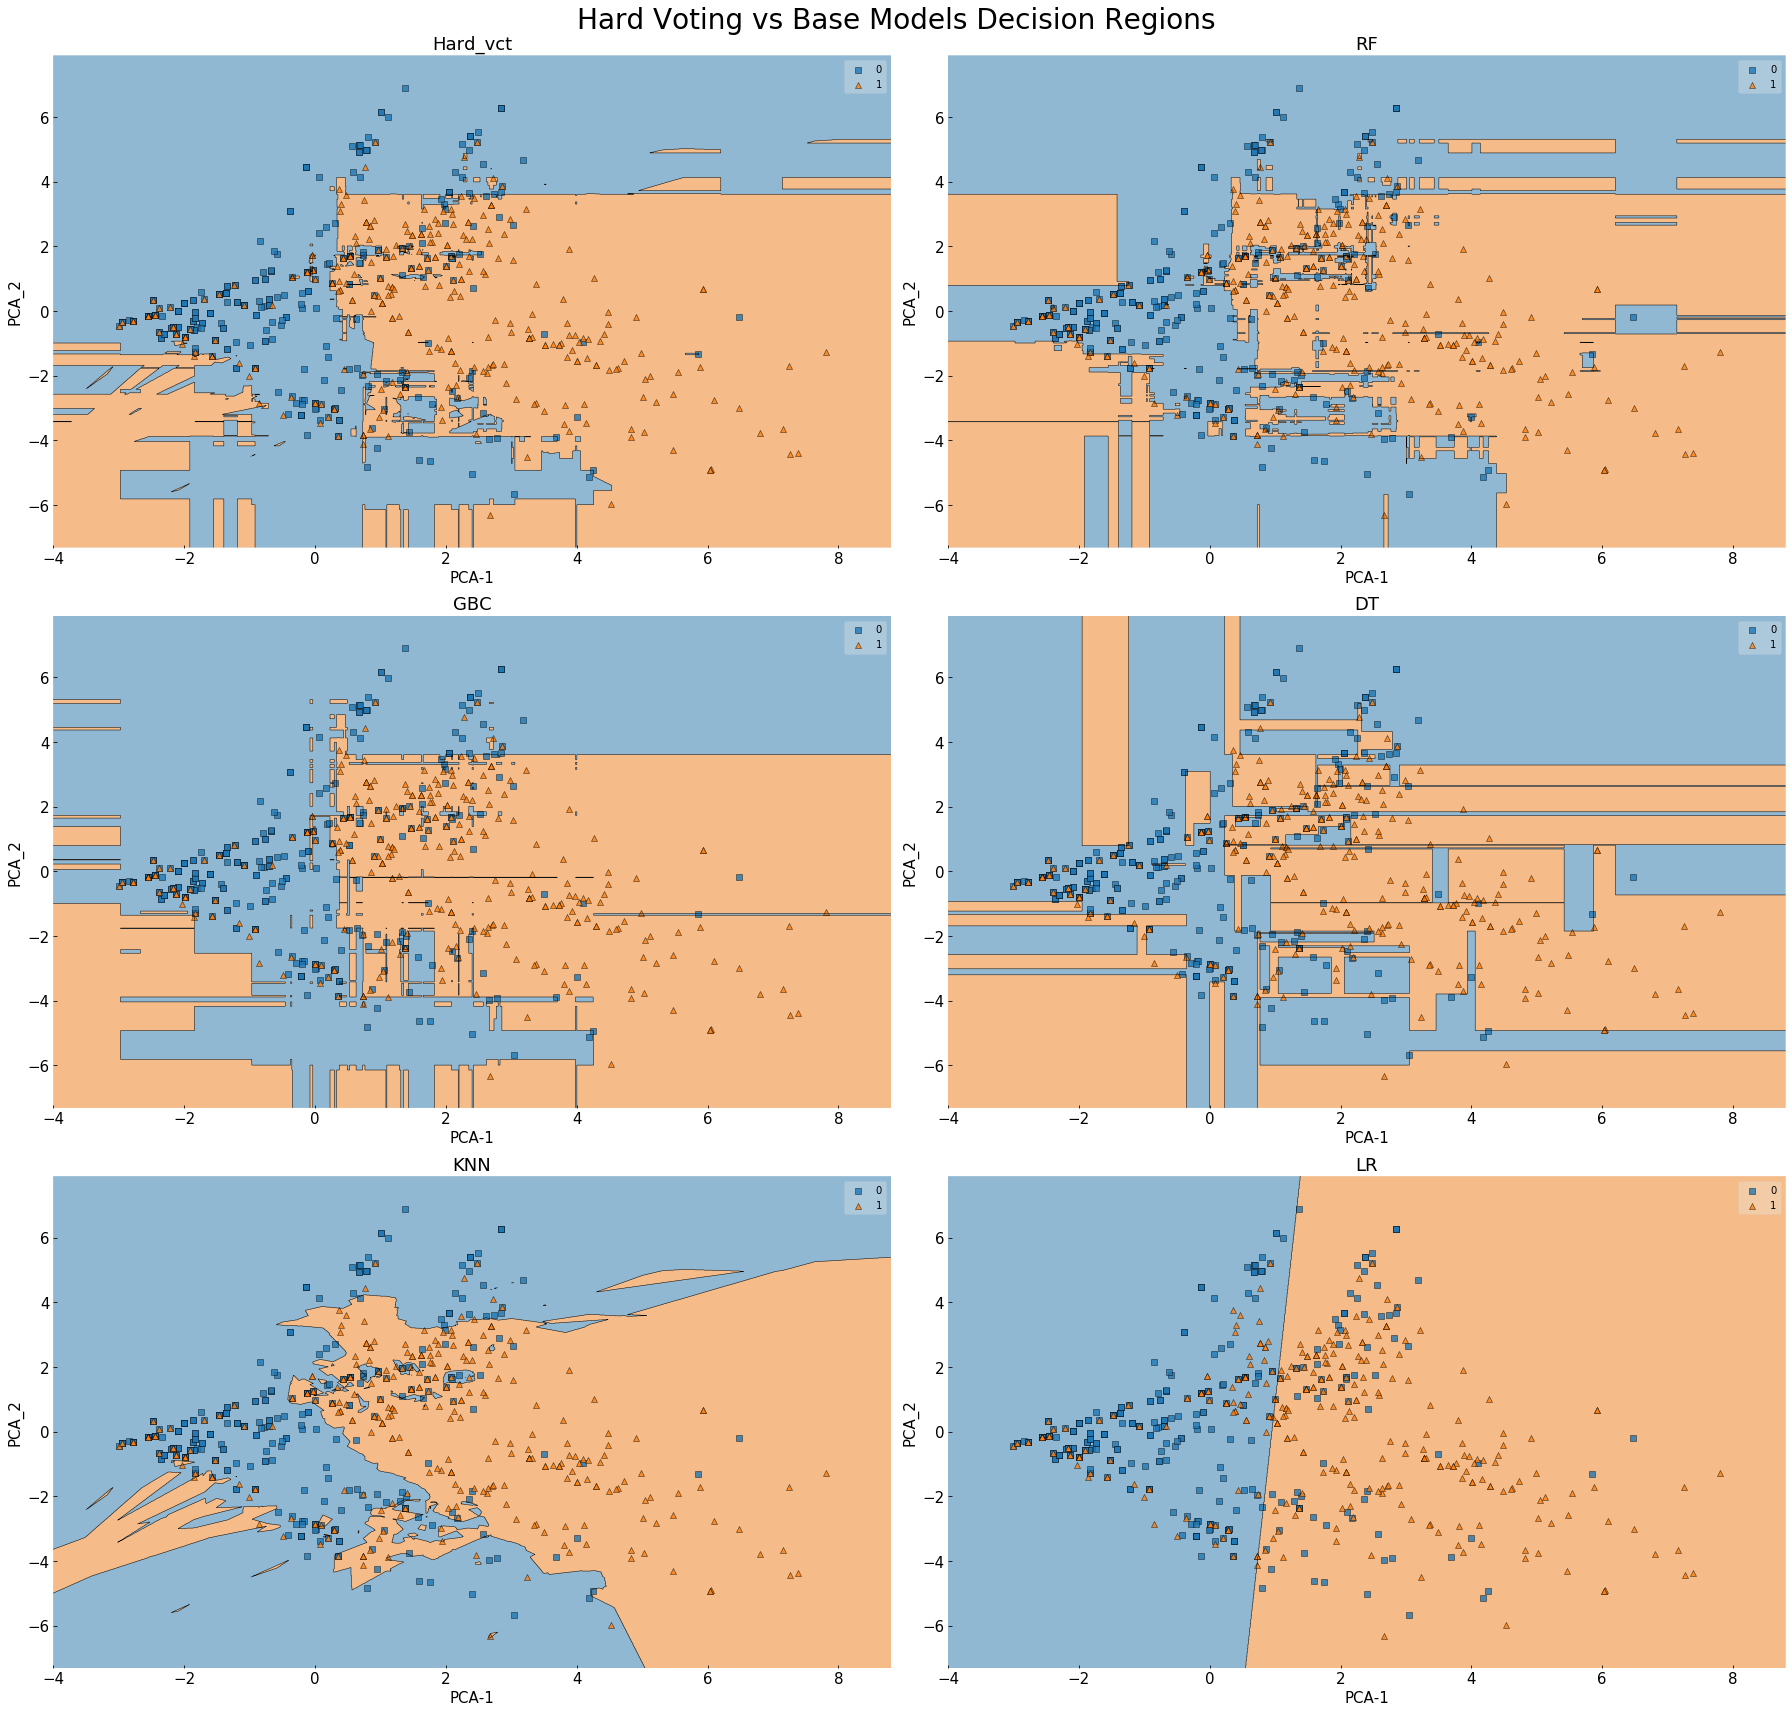

In [143]:
"""We will use mlxtend for plotting decision regions of base and ensemble models. Initialize base models and hard voting ensemble."""
rfPca = RandomForestClassifier(random_state = seed)
gbcPca = GradientBoostingClassifier(random_state = seed)
dtPca = DecisionTreeClassifier(random_state = seed)
knnPca = KNeighborsClassifier()
lrPca = LogisticRegression(random_state = seed)
baseModelPca = [rfPca, gbcPca, dtPca, knnPca, lrPca]
hardVctPca = EnsembleVoteClassifier(clfs = baseModelPca, voting="hard")

"""Function to plot decision region."""
def plotDecisionRegion(model):
    """Returns a model's decision region."""
    
    """Train models with data pca returned. Get the train data."""
    X = trainPca.values # Must be converted into numpy array.
    y = yTrain.values
    model.fit(X, y) 
    decisionRegion = plot_decision_regions(X = X, y = y.astype(np.integer), clf=model)
    plt.xlabel("PCA-1", fontsize = 15)
    plt.ylabel("PCA_2", fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    return decisionRegion

"""Now plot decison regions for hard voting ensemble vs base models in subplots."""
plt.figure(figsize = (25,25))
enModels = [hardVctPca, rfPca, gbcPca, dtPca, knnPca, lrPca]
enLabels = ["Hard_vct", "RF", "GBC", "DT", "KNN", "LR"]
for ax, model, label in zip(range(1,7), enModels, enLabels):
    plt.subplot(3,2,ax)
    plotDecisionRegion(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Hard Voting vs Base Models Decision Regions", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

**Findings:** There seems to be lesser misclassifications made by hard voting decision region compared to both rf and gbc's decision regions. Let's see how and where hard voting ensemble corrects base learners prediction in a data frame together.

In [144]:
"""Create a data frame consisting of base models and hard voting ensemble predictions. Revised base models are now rf, gbc, dt, knn, lr without svc and etc."""
basePrediction = basePrediction.drop(columns = ["ABC", "SVC", "ETC"], axis = 1)

"""See base models prediction with hard voting prediction."""
hardBase = pd.concat([basePrediction, yPredHardVct], sort = False, axis = 1)
display(hardBase.head(7))

,RF,GBC,DT,KNN,LR,hardVct
0,0,0,0,0,0,0
1,0,1,0,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,0,1,1
5,0,0,0,0,0,0
6,1,1,0,1,1,1


**Great! We can see hard voting ensemble is considering majority of the models vote(prediction) to label a particular class. Thus it can reduce prediction errors when predicted by a single base learners.**

##### 14.1.1.1.2 Soft Voting <a id="14.3"></a>
On the other hand, When an ensembles averages based on probabilities  we refer to it as soft voting. In an ensemble model, all classifiers (algorithms) are able to estimate class probabilities (i.e., they all have predict_proba() method), then we can specify Scikit-Learn to predict the class with the highest probability, averaged over all the individual classifiers. In a voting classifier setting the voting parameter to 'soft' enables the models to calculate their probability(also known as confidence score) individually and present it to the voting classifier, then the voting classifier averages them and outputs the class with the highest probability. If average probablity of class-1 is greater than class-0, it outputs predicted class is 1 otherwise 0. 

**Note:** This soft-voting classifier often work better than hard-voting as it gives more weight to highly confident votes. We Need to specify voting=”soft” and ensure that all classifiers can estimate class probabilities. One algorithm where we need to be careful is SVC, by default SVC will not give probabilities, we have to specify 'probability' hyperparameter to True.
See the table below to understand how soft voting ensemble works.

In [145]:
bold("How soft voting works:")
data = [[0.49, 0.99, 0.49, 0.66, 1], 
        [0.51, 0.01, 0.51, 0.34, 0]]
display(pd.DataFrame(data, columns= ["RF", "LR", "KNN", "Average", "Soft_voting"]))

**How soft voting works:**

,RF,LR,KNN,Average,Soft_voting
0,0.49,0.99,0.49,0.66,1
1,0.51,0.01,0.51,0.34,0


**Let's implement soft voting ensemble in mlxtend.**

In [146]:
"""Base models for soft voting is the base models of hard voting."""
"""Initialize soft voting ensemble."""
baseModels = [rf, gbc, dt, knn, lr]
softVct = EnsembleVoteClassifier(clfs = baseModels, voting = "soft")
print("Fitting Soft Voting Ensemble...")
display(softVct.fit(xTrain, yTrain))
print("Done.")

"""Predict with soft voting ensemble."""
yPredSoftVct = pd.DataFrame(softVct.predict(xTest), columns = ["Soft_vct"])

"""Hard voting cross validation score."""
print("\nComputing Soft Voting X Val Score...")
softXValScore = cross_val_score(softVct, xTrain, yTrain, cv = 10, scoring = "accuracy")
softXValScore = round(softXValScore.mean()*100, 2)
print("Done.")

"""Compare hard voting score with best base models scores."""
softVsBaseScore = pd.DataFrame({"Soft_vs_base_score(%)": [softXValScore,
                                                          tunedScore["RF"],
                                                          tunedScore["GBC"], 
                                                          tunedScore["DT"],
                                                          tunedScore["KNN"], 
                                                          tunedScore["LR"]]
                               })
"""So basically we"re comparing soft voting x_val_score with base models"s tunned score."""
softVsBaseScore.index = ["Soft_vct", "RF", "GBC", "DT", "KNN", "LR"]
bold("Soft Voting vs Base Models Scores:")
display(softVsBaseScore)

Fitting Soft Voting Ensemble...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



EnsembleVoteClassifier(clfs=[RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=6,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=15,
                                                    n_jobs=None,
                                                    oob_s

Done.

Computing Soft Voting X Val Score...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

Done.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



**Soft Voting vs Base Models Scores:**

,Soft_vs_base_score(%)
Soft_vct,83.39
RF,84.40
GBC,83.95
DT,81.37
KNN,82.94
LR,82.94


**Findings:** Soft voting ensemble fails to beat our two best models (rf and gbc). In fact, it produces way to inferior results compared to hard voting ensemble (83.95 vs 84.18). So hard voting ensemble, for this problem, seems to be superior to soft voting ensemble method. WE can visualize soft voting ensemble decision region along with base models decision regions.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



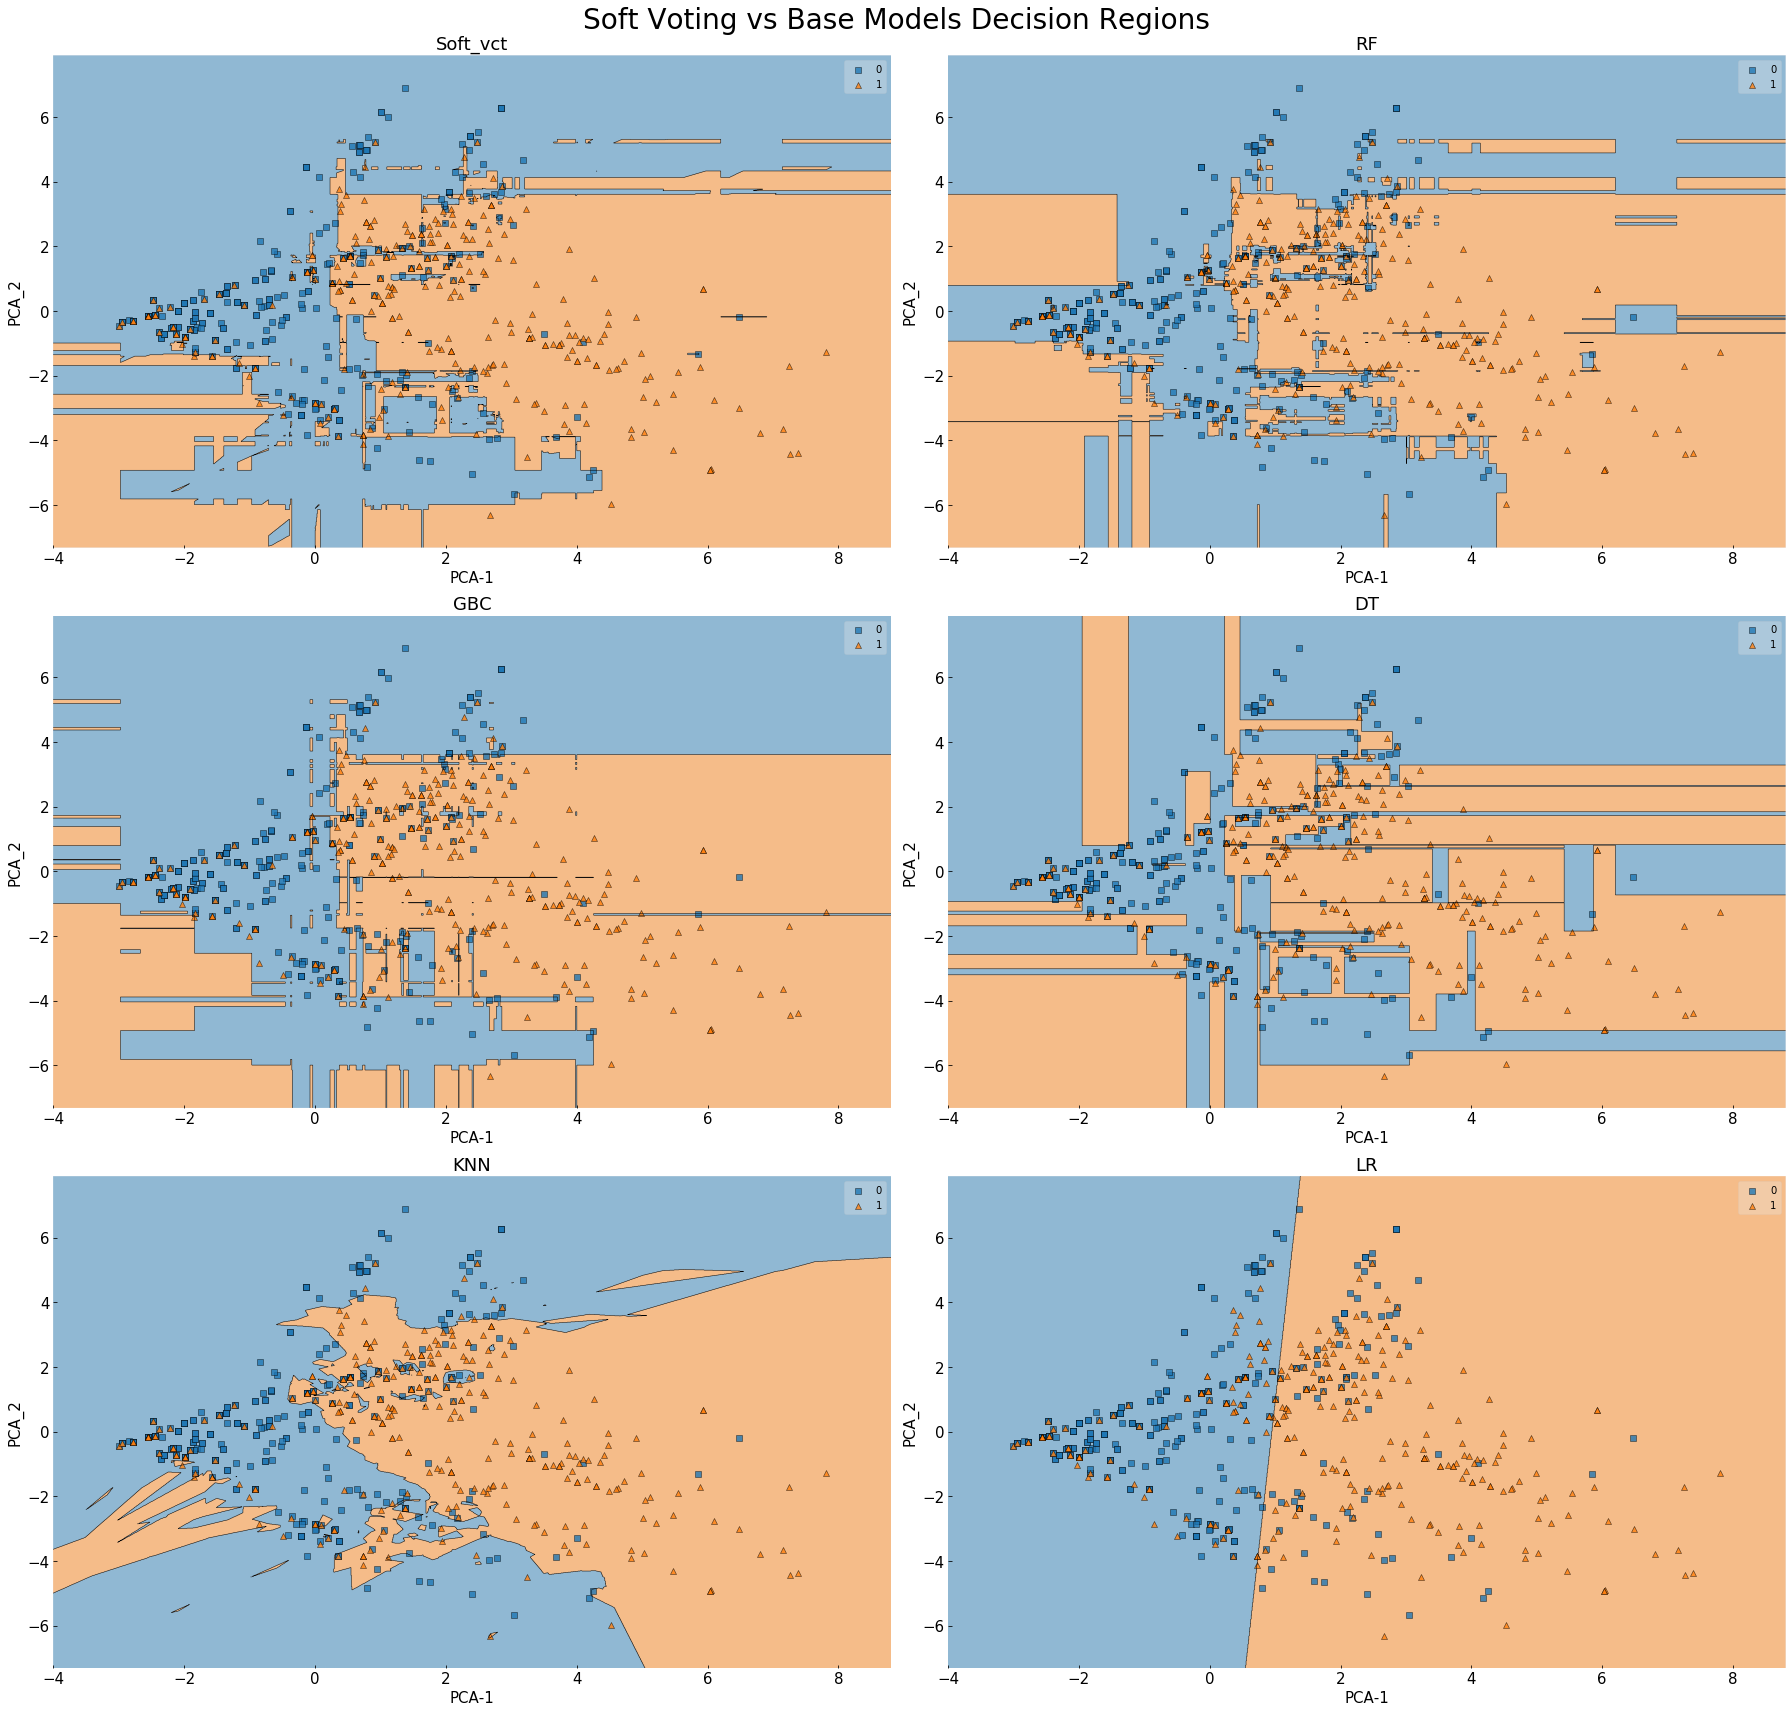

In [147]:
"""We would use the same data to plot decision region we got analysing PCA."""
softVctPca = EnsembleVoteClassifier(clfs = baseModelPca, voting = "soft")

"""Plot decision regions for soft voting ensemble vs base models in subplots."""
plt.figure(figsize = (25,25))
enModels = [softVctPca, rfPca, gbcPca, dtPca, knnPca, lrPca]
enLabels = ["Soft_vct", "RF", "GBC", "DT", "KNN", "LR"]
for ax, model, label in zip(range(1,7), enModels, enLabels):
    plt.subplot(3,2,ax)
    plotDecisionRegion(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Soft Voting vs Base Models Decision Regions", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

**Findings:** Soft voting decision region just seems to be creating more misclassification than rf and gbc.

In [148]:
"""See base models prediction with soft voting prediction."""
softBase = pd.concat([basePrediction,yPredSoftVct], sort = False, axis = 1)
display(softBase.head())

,RF,GBC,DT,KNN,LR,Soft_vct
0,0,0,0,0,0,0
1,0,1,0,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,0,1,1


### 14.1.2 Advanced Ensemble Methods
Advanced ensemble methods can further be classified into 
1. Bagging
2. Boostoing
3. Stacking
4. Blending

#### 14.1.2.1 Bagging  <a id="14.4"></a>
Bagging, is shorthand for the combination of bootstrapping and aggregating. Bootstrapping is a method to help decrease the variance of the classifier and thus reduce overfitting. So the model created should be less overfitted than a single individual model. Bagging is more suitable for high variance low bias models (complex models). Random forest itself is an ensemble machine learning algorithm that follows the bagging technique. We would use rf as the base estimator for bagging instead of default dt. Let's try to implement bagging in sklearn:

In [149]:
"""Initialize bagging classifier."""
bagg = BaggingClassifier(base_estimator = rf, verbose = 0, n_jobs = -1, random_state = seed)
"""We use rf as the base estimator for bagging technique."""
print("Fitting Bagging Ensemble...")
display(bagg.fit(xTrain, yTrain))
print("Done.")

"""Bagging cross validation score."""
print("\nComputing Bagging X Val Score..")
baggXValScore = cross_val_score(bagg, xTrain, yTrain, cv = 10, scoring = "accuracy")
baggXValScore = np.round(baggXValScore.mean()*100, 2)
print("Done.")

"""Compare bagging ensemble score with best base models scores."""
baggVsBaseScore = pd.DataFrame({"Bagging_vs_base_score(%)": [baggXValScore,
                                                          tunedScore["RF"],
                                                          tunedScore["GBC"], 
                                                          tunedScore["DT"],
                                                          tunedScore["KNN"], 
                                                          tunedScore["LR"]]
                               })

"""So basically we"re comparing bagging x_val_score with base models"s tunned score."""
baggVsBaseScore.index = ["Bagg", "RF", "GBC", "DT", "KNN", "LR"]
bold("Bagging vs Base Models Scores:")
display(baggVsBaseScore)

Fitting Bagging Ensemble...


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=6,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=15,
                                                        n_jobs=None,
     

Done.

Computing Bagging X Val Score..
Done.


**Bagging vs Base Models Scores:**

,Bagging_vs_base_score(%)
Bagg,82.83
RF,84.40
GBC,83.95
DT,81.37
KNN,82.94
LR,82.94


**Findings:** Bagging can't beat our best base learners.

#### 14.1.2.2 Boosting  <a id="14.5"></a>
Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. It does this through a weighted majority vote (classification) or a weighted sum (regression). Ada boost and Gradient boost, and Extreme gradient boost are popular models that uses boosting technique. Boosting is particularly suitable for low variance high bias models (less complex models). Unlike bagging, its a sequential ensemble technique. We will perform a simple voting ensemble of boosting classifiers rather performing boosting ensemble using only a single classifer with a base estimator (for ada boost). I found this method to give higher accuracy than adaboost(with a base estimator), gradient boosting, or extreme gradient boosting for this problem. Let's perform boosting ensemble(infact voting of boosting classifiers) in mlxtend.

In [150]:
"""We will use adaptive boosting, gradient boosting and extreme gradient boosting classifiers for boosting ensemble method."""
"""Initialize boosting classifier. Base models for boosting:"""
boostModels = [abc, gbc, xgbc] # Unoptimized xgbc
boost = EnsembleVoteClassifier(clfs = boostModels, voting="hard")

"""Fitting boosting."""
print("Fitting Boosting Ensemble...")
display(boost.fit(xTrain, yTrain))
print("Done.")

"""Boosting cross validation score."""
print("\nCalculating Boosting X Val Score...")
boosXValScore = cross_val_score(boost, xTrain, yTrain, cv = 10, scoring = "accuracy")
boosXValScore = round(boosXValScore.mean()*100, 2)
print("Done.")

"""Compare boosting ensemble score with best base models scores."""
xgbcXValScore = 82.27  # xgbc"s x_val_score.
boostVsBaseScore = pd.DataFrame({"Boosting_vs_base_score(%)": [boosXValScore,
                                                                  tunedScore["ABC"],
                                                                  tunedScore["GBC"], 
                                                                  xgbcXValScore]})
"""So basically we"re comparing boosting x_val_score with base models"s tunned score except xgbc."""
boostVsBaseScore.index = ["Boost", "ABC", "GBC", "XGBC"]
bold("Boosting vs Base Models Scores:")
display(boostVsBaseScore)

Fitting Boosting Ensemble...


EnsembleVoteClassifier(clfs=[AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=0.1,
                                                n_estimators=250,
                                                random_state=43),
                             GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.05,
                                                        loss='deviance',
                                                        max_depth=4,
                                                        max_features=0.1,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_im

Done.

Calculating Boosting X Val Score...
Done.


**Boosting vs Base Models Scores:**

,Boosting_vs_base_score(%)
Boost,83.73
ABC,83.39
GBC,83.95
XGBC,82.27


**Findings:** Boosting method can't beat best boosting base learner gbc. Though it could beat, if we would have optimized xgbc. If you have time and infrastructure, you can tune xgbc's hyperparameters. Then compare boosting accuracy with its base models accuracy.

#### 14.1.2.3 Blending  <a id="14.6"></a>
In blending, full training data is split into training and prediction sets. The base models (also called level 0 models) are trained on this train set and then predictions are made on this prediction set. These predictions made by base learers are then fed as an input to the meta learner (also called level 1 model). That is meta learner are trained with the output (predictions) of base learners. Blending ensemble uses only a subset of data to train base learners and another subset of data to make predictions. By only fitting every base learner once on a subset of the full training data, Blend ensemble is a fast ensemble that can handle very large datasets simply by only using portion of it at each stage. The cost of this approach is that information is thrown out at each stage, as one layer will not see the training data used by the previous layer. **We will use BlendEnsemble method from mlens.ensemble module to perform blending.**

In [151]:
"""Perform blending in mlens."""
"""Initialize blend ensembler."""
blend = BlendEnsemble(n_jobs = -1, test_size = 0.5, random_state = seed)
"""Base models for blending."""
baseModels = [gbc, rf, dt, knn, abc]
blend.add(baseModels)
"""Meta learner for blending. We will use lr."""
blend.add_meta(lr)
"""Train the blend ensemble."""
print("Fitting Blending...")
display(blend.fit(xTrain, yTrain))
print("Done.")

Fitting Blending...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



BlendEnsemble(array_check=None, backend=None,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=3392, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=BlendIndex(X=None, raise_on_exception=...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=43, sample_size=20, scorer=None, shuffle=False,
       test_size=0.5, verbose=False)

Done.


#### 14.1.2.4 Stacking (Or Stacked Generalization)  <a id="14.7"></a>
In blending, we trained the base learners and the meta learner on only half the data, so a lot of information is lost. To prevent this, we need to use a cross-validation strategy. Fitting an ensemble with cross-validation is often referred to as stacking, while the ensemble itself is known as the Super Learner. So basically in stacking, the individual classification models (or base models) are trained on the complete training set; then, the meta-classifier is fitted on the outputs (predictions) of those base learners. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

**The basic difference between blending and stacking is therefore that stacking allows both base learners and the meta learner to train on the full data set.The outcome of stacking is improved accuracy which is typical for small and medium-sized data sets, where the effect of blending can be severe. As the data set size increases, blending and stacking performs similarly and hence for large data sets blending is preferred over stacking since stacking takes significant amount of time to train the ensemble. We will use package vecstack to perform stacking that can save you from writing a lot of codes if you implement stacking from scratch.**

In [152]:
"""Initialize base models. We will use the same base models as blending."""
baseModels = [rf, dt, gbc, abc, knn]
"""Perform stacking."""
sTrain, sTest = stacking(baseModels,                # list of base models
                           xTrain, yTrain, xTest,   # data
                           regression = False,         # classification task (if you need 
                                                       # regression - set to True)
                           mode = "oof_pred_bag",      # mode: oof for train set, predict test 
                                                       # set in each fold and vote
                           needs_proba = False,        # predict class labels (if you need 
                                                       # probabilities - set to True) 
                           save_dir = None,            # do not save result and log (to save 
                                                       # in current dir - set to ".")
                           metric = accuracy_score,    # metric: callable
                           n_folds = 10,               # number of folds
                           stratified = True,          # stratified split for folds
                           shuffle = True,             # shuffle the data
                           random_state= seed,         # ensure reproducibility
                           verbose = 1)                # print progress

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    ----
    MEAN:     [0.81598712] + [0.05415289]
    FULL:     [0.81593715]

model  1:     [DecisionTreeClassifier]
    ----
    MEAN:     [0.80251674] + [0.04118991]
    FULL:     [0.80246914]

model  2:     [GradientBoostingClassifier]
    ----
    MEAN:     [0.83622517] + [0.04595903]
    FULL:     [0.83613917]

model  3:     [AdaBoostClassifier]
    ----
    MEAN:     [0.82719754] + [0.04885911]
    FULL:     [0.82716049]

model  4:     [KNeighborsClassifier]
    ----
    MEAN:     [0.82381568] + [0.03815719]
    FULL:     [0.82379349]



**So now we have OOF from base (or 0 level models) models and we can build level 1 model. We have 5 base models (level 0 models), so we expect to get 5 columns in sTrain and sTest. sTrain will be our input feature to train our meta learner and then prediction will be made on sTest after we train our meta learner. And this prediction on sTest is actually the prediction for our test set (xTest). Before we train our meta learner we can investigate sTrain and sTest.**

In [153]:
"""Input features for meta learner."""
display(sTrain[:5])
display(sTrain.shape)

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]])

(891, 5)

In [154]:
'''Test (prediction) set for meta learner.'''
display(sTest[:5].shape)
display(sTest.shape)

(5, 5)

(418, 5)

In [155]:
"""Initialize 1st level model that is our meta learner. We will use lr."""
superLearner = lr 
    
"""Fit meta learner on the output of base learners."""
print("Fitting Stacking...")
superLearner.fit(sTrain, yTrain)
print("Done.")
"""Finally predict using super learner."""
yPredSuper = superLearner.predict(sTest)

Fitting Stacking...
Done.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



## 14.2  Evaluating Different Ensembles <a id="14.8"></a>
I've tried to demonstrate various ensemble methods. Let's make predictions with them to see how they perform on our test set on kaggle submission.

In [156]:
"""Predicting with different ensembles."""

"""Hard voting."""
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": hardVct.predict(xTest)})
submission.to_csv("hardVctSubmission.csv", index = False)

"""Soft voting."""
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": softVct.predict(xTest)})
submission.to_csv("softVctSubmission.csv", index = False)

"""Bagging."""
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": bagg.predict(xTest)})
submission.to_csv("baggSubmission.csv", index = False)

"""Boosting."""
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": boost.predict(xTest)})
submission.to_csv("boostSubmission.csv", index = False)

"""Blending."""
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": blend.predict(xTest).astype(int)})
submission.to_csv("blendSubmission.csv", index = False)

"""Stacking."""
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": yPredSuper.astype(int)})
submission.to_csv("stackingSubmission.csv", index = False)

**We've made our submissions using different ensembles. Let's now compare their submission scores with our best base models'  submission scores.**

In [157]:
"""Create a df of different ensemble submission scores and base models."""
submissionScore = pd.DataFrame({"models":["bagging(en)", "boosting(en)", "blending(en)", "stacking(en)", 
                                          "hardVoting(en)", "softVoting(en)", "rf(base)", "gbc(base)"],
             "scoredOnSubmission":[0.81339, 0.78947, 0.79425, 0.79904, 0.79904, 0.79904, 0.80382, 0.78947]})
submissionScore = submissionScore.set_index("models").sort_values(by="scoredOnSubmission", ascending = False)
bold("Ensemble vs Base Models Scores on Submission:")
display(submissionScore)

**Ensemble vs Base Models Scores on Submission:**

,scoredOnSubmission
models,
bagging(en),0.81339
rf(base),0.80382
stacking(en),0.79904
hardVoting(en),0.79904
softVoting(en),0.79904
blending(en),0.79425
boosting(en),0.78947
gbc(base),0.78947


In [158]:
"""Let's plot models' submission score for the last time."""
def plotSubmissionScore():
    """Returns a bar chart of different models scored on submission."""
    
    # Create a subplot of bar chart
    fig=make_subplots(
        rows=1, 
        cols=1,
        vertical_spacing=0.3,
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for bar chart
    fig.add_trace(go.Bar(x=submissionScore.index,
                             y=submissionScore.T.squeeze(), # Converts df to series
                             text=submissionScore.T.squeeze(),
                             hoverinfo="x+y",
                             textposition="auto",
                             marker = dict(color=submissionScore.T.squeeze(), colorscale="Rainbow"),
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )

        
    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=950,
        hovermode="closest",
        title_text = "Models Score on Submission",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis titles in bold
    fig.layout.yaxis1.update(title="<b>Submission score</b>")
    
    # Set x-axis title in bold
    fig.layout.xaxis1.update(title="<b>Models</b>")
    return fig.show()

"""Call the function to plot the scores."""
plotSubmissionScore()

**Findings:**So there you have it! Surprisingly its bagging that comes out on top with a score of *0.81339* that can take you to the top *4%* on the leaderboard! Random forest (base model) comes second with score 0.80382. Hard voting, stacking and soft voting perform identical and can't beat best base rf. Since bagging performs well for high variance model, we have a feeling that we might have overfitted the training data because cross validation score for bagging is 82.61% and it still scores over 81% on kaggle leaderboard. So its possible to overfit though your cross validation score is high since some models with higher cross validation score perform poorly on kaggle leaderboard compared to bagging ensemble.

# 15.End Note <a id="15"></a>
**If you're still with me, I congratulate you because you've learned all those things that I learned after months of study, practice and of course patience. Of course, there is always room for improvement. I'm still learning. I've tried to explain everything I could possibly know. Any suggestion is cordially welcomed. May be trying out different base learners and meta learner to improve ensemble further or may be by tunning xgbc. And if you find my kernel useful, some upvotes will be appreciated.  I have also another kernel for advanced house price regression problem that you might find useful as well.**

**Finally I provide some links that I've found useful in creating this notebook.**

**Recommended Readings:**
1. Mlxtend package for voting ensemble and decision region: https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/ and
https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
2. Mlens package for blending ensemble: https://github.com/flennerhag/mlens/blob/master/mlens/ensemble/blend.py
3. Vecstack package for stacking ensemble: https://github.com/vecxoz/vecstack
4. Introduction to Python Ensembles by Dataquest: https://www.dataquest.io/blog/introduction-to-ensembles/
5. Kaggle ensemble guide by MLWave: https://mlwave.com/kaggle-ensembling-guide/